<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/TM_GE19_Annotation_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from functools import reduce


### Predictions 

In [ ]:
train_ge19_pred_ge18 = pd.read_excel('/content/TrainGE19PredGE18.xlsx')


In [ ]:
train_ge19_pred_ge19 = pd.read_excel('/content/TrainGE19PredGE19.xlsx')


In [ ]:
train_ge19_pred_h19 = pd.read_excel('/content/TrainGE19PredH19.xlsx')


In [ ]:
train_ge19_pred_h20 = pd.read_excel('/content/TrainGE19PredH20.xlsx')


### Testdaten

In [ ]:
ge18_test_raw = pd.read_csv('/content/germeval2018test.txt', sep='\t', 
                              encoding='UTF-8', quoting=csv.QUOTE_NONE, names=('TWEET', 'OFF', 'CAT'))

In [ ]:
ge19_test_raw = pd.read_csv('germeval2019GoldLabelsSubtask1_2.txt', sep='\t', 
                                        encoding='UTF-8', names=['TWEET', 'OFF', 'CAT'])

In [ ]:
h19_test_raw = pd.read_csv('hasoc_de_test_gold.tsv', sep='\t', encoding='UTF-8')


In [ ]:
h20_test_raw = pd.read_csv('hasoc20test_improved.csv', sep=',', encoding='UTF-8')


### kurzer Check

In [ ]:
train_ge19_pred_ge18

index  0
0         0 -1
1         1  8
2         2 -1
3         3 -1
4         4  1
...     ... ..
3527   3527 -1
3528   3528 -1
3529   3529  0
3530   3530 -1
3531   3531 -1

[3532 rows x 2 columns]

In [ ]:
train_ge19_pred_ge19

index   0
0         0  -1
1         1  -1
2         2  22
3         3  -1
4         4  -1
...     ...  ..
3026   3026  21
3027   3027  -1
3028   3028  -1
3029   3029  -1
3030   3030   0

[3031 rows x 2 columns]

In [ ]:
train_ge19_pred_h19

index   0
0        0  -1
1        1   1
2        2   0
3        3  -1
4        4  -1
..     ...  ..
845    845  -1
846    846  11
847    847  -1
848    848  -1
849    849   0

[850 rows x 2 columns]

In [ ]:
train_ge19_pred_h20

index   0
0        0  10
1        1   0
2        2  -1
3        3  -1
4        4  -1
..     ...  ..
521    521  -1
522    522  17
523    523  -1
524    524  -1
525    525  17

[526 rows x 2 columns]

### Model-Topics

In [ ]:
train_ge19_model_topics = pd.read_excel('/content/Train GE19 Model Topics.xlsx')
train_ge19_model_topics

index  Topic  Count                                               Name
0       0     -1   1612                           -1_heute_geht_immer_gibt
1       1      0    907                            0_uhr_danke_woche_heute
2       2      1    242            1_deutschland_deutsche_deutschen_berlin
3       3      2    118                    2_nazis_nazi_neonazis_holocaust
4       4      3    108                   3_tweet_twitter_twittern_stegner
5       5      4     92  4_politik_sozialistische_sozialistischen_demok...
6       6      5     71                             5_geld_bezahlt_job_gut
7       7      6     68                      6_wolf_binsenwombats_hund_rum
8       8      7     53      7_medien_journalisten_propaganda_journalismus
9       9      8     42                     8_islam_muslime_afd_islamismus
10     10      9     40                        9_kamera_blog_photo_kameras
11     11     10     40                 10_aktivist_innen_solidarität_demo
12     12     11     39         11_kartoffeln_essen_lebensmittel_kartoffel
13     13     12     38     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     14     13     36                     13_niemand_niemanden_bunt_null
15     15     14     34        14_klimawandel_co²_klimaschutz_klimawandels
16     16     15     33          15_polizei_pfefferspray_massiv_repression
17     17     16     30                      16_rassisten_ffe_rassist_hust
18     18     17     29                17_grünen_grüne_entsorgung_ökostrom
19     19     18     28               18_geblockt_bauknecht_techniker_here
20     20     19     27                     19_schnee_winter_liegt_draußen
21     21     20     26                   20_lustig_sarkasmus_clown_satire
22     22     21     26              21_türkei_kurdischen_türken_türkische
23     23     22     25                     22_religion_kirche_leben_jesus
24     24     23     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     25     24     23                      24_russland_russen_putin_nato
26     26     25     22                 25_autobahn_berge_radfahrer_fahren
27     27     26     22               26_migraene_apuleius_wahrheit_ratten
28     28     27     21            27_medikamente_krankheiten_kommen_markt
29     29     28     20                         28_handball_gamer_team_obm
30     30     29     19        29_frage_rhetorische_debattencamp_diskutier
31     31     30     18             30_israel_googlem_google_palästinenser
32     32     31     17                      31_ffd_fef_offensichtlich_ffe
33     33     32     16                32_wählen_wahlkreis_mitglieder_wahl
34     34     33     16               33_terminal_airport_bullen_flughafen
35     35     34     14         34_brasilien_venezuela_imperialisten_monat

### GE18_Test: Predictions an Testdaten-DataFrame

In [ ]:
ge18_test_raw['pred'] = train_ge19_pred_ge18[0]
ge18_test_raw

TWEET      OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER    -1
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     8
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER    -1
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE     1
...                                                 ...      ...    ...   ...
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER    -1
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1

[3532 rows x 4 columns]

### GE18_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_other = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OTHER']
ge18_test_other


TWEET    OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER    -1
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     8
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER    -1
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1
...                                                 ...    ...    ...   ...
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER     0
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER    -1
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1

[2330 rows x 4 columns]

In [ ]:
ge18_test_other_pred_values = pd.DataFrame(ge18_test_other['pred'].value_counts())
ge18_test_other_pred_values['percent'] = (ge18_test_other_pred_values['pred'] / ge18_test_other_pred_values['pred'].sum()) * 100
ge18_test_other_pred_values

pred    percent
-1   1258  53.991416
 0    373  16.008584
 1    165   7.081545
 22    78   3.347639
 3     47   2.017167
 8     41   1.759657
 12    41   1.759657
 5     37   1.587983
 4     28   1.201717
 6     27   1.158798
 13    22   0.944206
 16    21   0.901288
 17    19   0.815451
 2     18   0.772532
 7     16   0.686695
 21    16   0.686695
 30    14   0.600858
 9     13   0.557940
 25    12   0.515021
 20    12   0.515021
 14    10   0.429185
 29     9   0.386266
 32     7   0.300429
 10     7   0.300429
 15     7   0.300429
 11     6   0.257511
 27     5   0.214592
 26     5   0.214592
 18     4   0.171674
 24     4   0.171674
 31     2   0.085837
 28     2   0.085837
 23     2   0.085837
 33     1   0.042918
 19     1   0.042918

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
df2 = ge18_test_other_pred_values
data_frames = [df1, df2]
df_GE18_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OTHER_merged['percent'] = df_GE18_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE18_OTHER_merged['pred'] = df_GE18_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE18_OTHER_sorted = df_GE18_OTHER_merged.sort_values('pred', ascending=False)
df_GE18_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt  1258  53.991416
1       0                            0_uhr_danke_woche_heute   373  16.008584
2       1            1_deutschland_deutsche_deutschen_berlin   165   7.081545
23     22                     22_religion_kirche_leben_jesus    78   3.347639
4       3                   3_tweet_twitter_twittern_stegner    47   2.017167
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    41   1.759657
9       8                     8_islam_muslime_afd_islamismus    41   1.759657
6       5                             5_geld_bezahlt_job_gut    37   1.587983
5       4  4_politik_sozialistische_sozialistischen_demok...    28   1.201717
7       6                      6_wolf_binsenwombats_hund_rum    27   1.158798
14     13                     13_niemand_niemanden_bunt_null    22   0.944206
17     16                      16_rassisten_ffe_rassist_hust    21   0.901288
18     17                17_grünen_grüne_entsorgung_ökostrom    19   0.815451
3       2                    2_nazis_nazi_neonazis_holocaust    18   0.772532
22     21              21_türkei_kurdischen_türken_türkische    16   0.686695
8       7      7_medien_journalisten_propaganda_journalismus    16   0.686695
31     30             30_israel_googlem_google_palästinenser    14   0.600858
10      9                        9_kamera_blog_photo_kameras    13   0.557940
21     20                   20_lustig_sarkasmus_clown_satire    12   0.515021
26     25                 25_autobahn_berge_radfahrer_fahren    12   0.515021
15     14        14_klimawandel_co²_klimaschutz_klimawandels    10   0.429185
30     29        29_frage_rhetorische_debattencamp_diskutier     9   0.386266
33     32                32_wählen_wahlkreis_mitglieder_wahl     7   0.300429
11     10                 10_aktivist_innen_solidarität_demo     7   0.300429
16     15          15_polizei_pfefferspray_massiv_repression     7   0.300429
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     6   0.257511
27     26               26_migraene_apuleius_wahrheit_ratten     5   0.214592
28     27            27_medikamente_krankheiten_kommen_markt     5   0.214592
19     18               18_geblockt_bauknecht_techniker_here     4   0.171674
25     24                      24_russland_russen_putin_nato     4   0.171674
32     31                      31_ffd_fef_offensichtlich_ffe     2   0.085837
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     2   0.085837
29     28                         28_handball_gamer_team_obm     2   0.085837
20     19                     19_schnee_winter_liegt_draußen     1   0.042918
34     33               33_terminal_airport_bullen_flughafen     1   0.042918
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_GE18_OTHER_merged_plt = df_GE18_OTHER_merged.set_index('Topic')


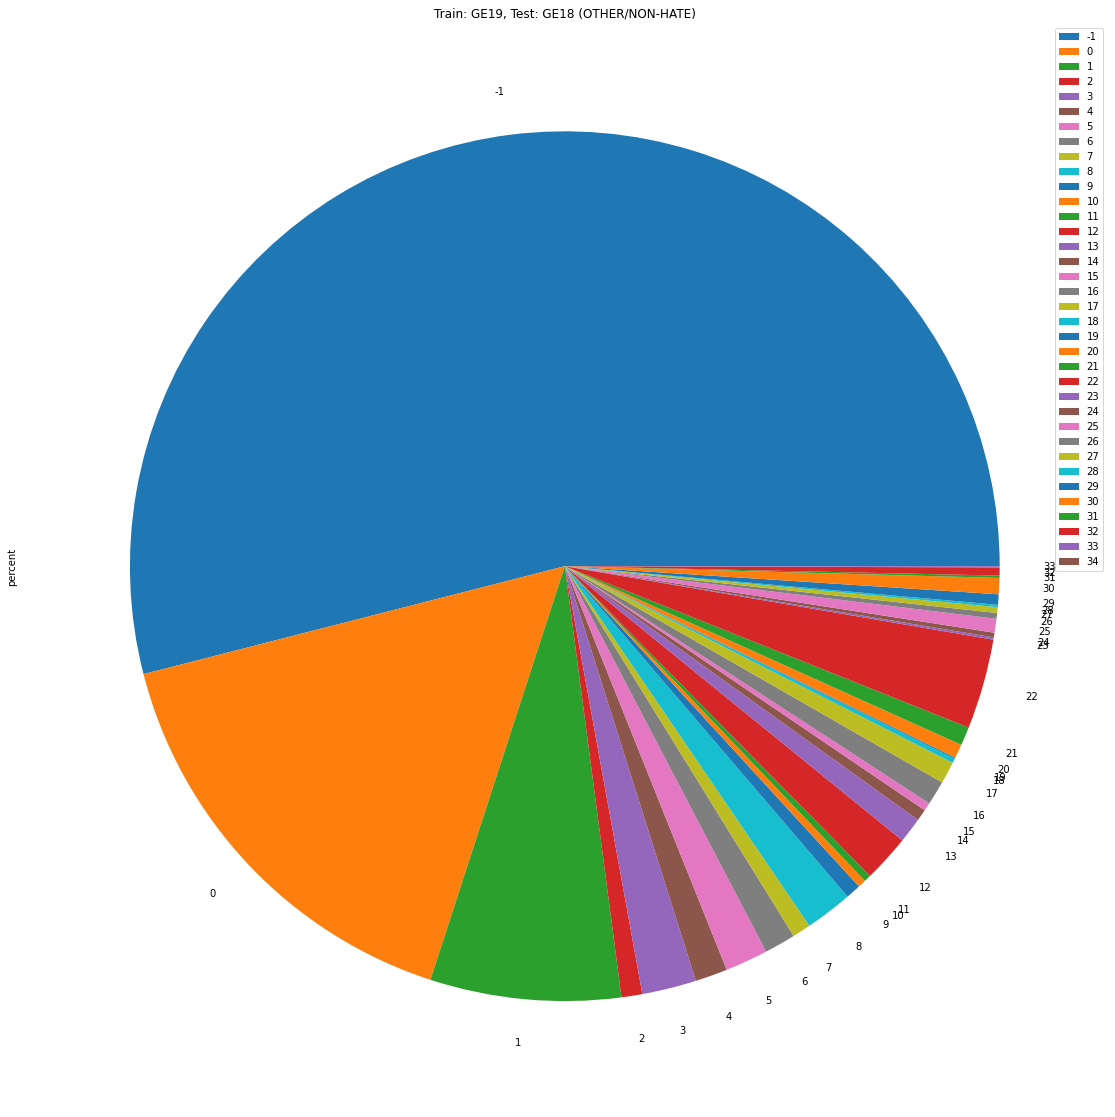

In [ ]:
plot = df_GE18_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: GE18 (OTHER/NON-HATE)')


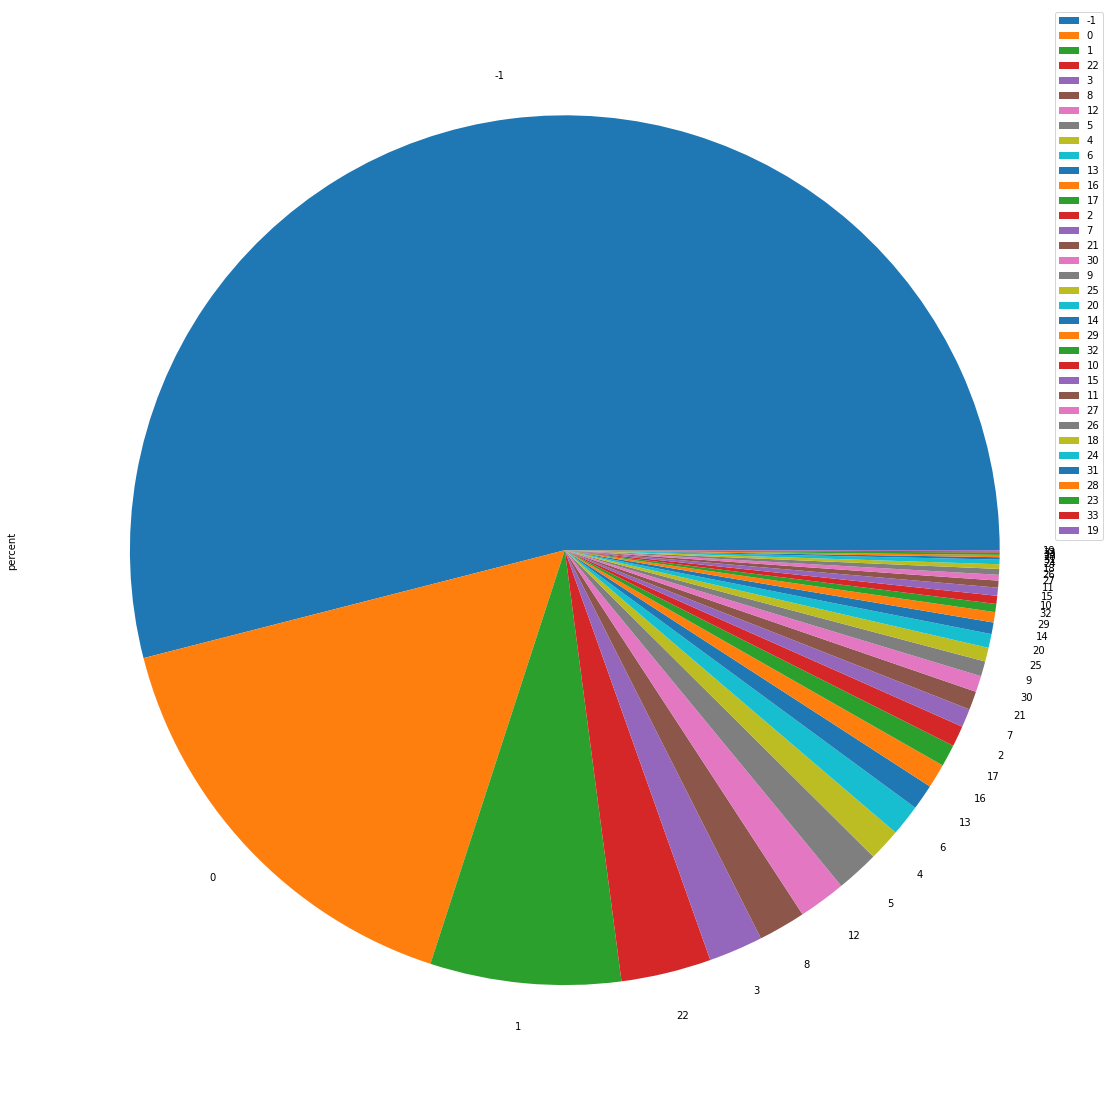

In [ ]:
plot = ge18_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE18_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_offense = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OFFENSE']
ge18_test_offense


TWEET      OFF     CAT  pred
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE     1
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE    -1
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE     0
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE    -1
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT    -1
...                                                 ...      ...     ...   ...
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE     1
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE    -1
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT    11
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE     0

[1202 rows x 4 columns]

In [ ]:
ge18_test_offense_pred_values = pd.DataFrame(ge18_test_offense['pred'].value_counts())
ge18_test_offense_pred_values['percent'] = (ge18_test_offense_pred_values['pred'] / ge18_test_offense_pred_values['pred'].sum()) * 100
ge18_test_offense_pred_values

pred    percent
-1    662  55.074875
 0    147  12.229617
 1    102   8.485857
 8     74   6.156406
 12    34   2.828619
 6     27   2.246256
 17    25   2.079867
 16    23   1.913478
 22    18   1.497504
 5     16   1.331115
 2     12   0.998336
 7     12   0.998336
 4      8   0.665557
 21     7   0.582363
 30     7   0.582363
 20     5   0.415973
 9      3   0.249584
 13     3   0.249584
 25     3   0.249584
 11     3   0.249584
 26     3   0.249584
 15     2   0.166389
 3      2   0.166389
 32     2   0.166389
 29     1   0.083195
 18     1   0.083195

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
df2 = ge18_test_offense_pred_values
data_frames = [df1, df2]
df_GE18_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OFFENSE_merged['percent'] = df_GE18_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE18_OFFENSE_merged['pred'] = df_GE18_OFFENSE_merged['pred'].astype(int)
df_GE18_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt   662  55.074875
1       0                            0_uhr_danke_woche_heute   147  12.229617
2       1            1_deutschland_deutsche_deutschen_berlin   102   8.485857
3       2                    2_nazis_nazi_neonazis_holocaust    12   0.998336
4       3                   3_tweet_twitter_twittern_stegner     2   0.166389
5       4  4_politik_sozialistische_sozialistischen_demok...     8   0.665557
6       5                             5_geld_bezahlt_job_gut    16   1.331115
7       6                      6_wolf_binsenwombats_hund_rum    27   2.246256
8       7      7_medien_journalisten_propaganda_journalismus    12   0.998336
9       8                     8_islam_muslime_afd_islamismus    74   6.156406
10      9                        9_kamera_blog_photo_kameras     3   0.249584
11     10                 10_aktivist_innen_solidarität_demo     0   0.000000
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     3   0.249584
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    34   2.828619
14     13                     13_niemand_niemanden_bunt_null     3   0.249584
15     14        14_klimawandel_co²_klimaschutz_klimawandels     0   0.000000
16     15          15_polizei_pfefferspray_massiv_repression     2   0.166389
17     16                      16_rassisten_ffe_rassist_hust    23   1.913478
18     17                17_grünen_grüne_entsorgung_ökostrom    25   2.079867
19     18               18_geblockt_bauknecht_techniker_here     1   0.083195
20     19                     19_schnee_winter_liegt_draußen     0   0.000000
21     20                   20_lustig_sarkasmus_clown_satire     5   0.415973
22     21              21_türkei_kurdischen_türken_türkische     7   0.582363
23     22                     22_religion_kirche_leben_jesus    18   1.497504
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
25     24                      24_russland_russen_putin_nato     0   0.000000
26     25                 25_autobahn_berge_radfahrer_fahren     3   0.249584
27     26               26_migraene_apuleius_wahrheit_ratten     3   0.249584
28     27            27_medikamente_krankheiten_kommen_markt     0   0.000000
29     28                         28_handball_gamer_team_obm     0   0.000000
30     29        29_frage_rhetorische_debattencamp_diskutier     1   0.083195
31     30             30_israel_googlem_google_palästinenser     7   0.582363
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     2   0.166389
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_GE18_OFFENSE_sorted = df_GE18_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE18_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt   662  55.074875
1       0                            0_uhr_danke_woche_heute   147  12.229617
2       1            1_deutschland_deutsche_deutschen_berlin   102   8.485857
9       8                     8_islam_muslime_afd_islamismus    74   6.156406
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    34   2.828619
7       6                      6_wolf_binsenwombats_hund_rum    27   2.246256
18     17                17_grünen_grüne_entsorgung_ökostrom    25   2.079867
17     16                      16_rassisten_ffe_rassist_hust    23   1.913478
23     22                     22_religion_kirche_leben_jesus    18   1.497504
6       5                             5_geld_bezahlt_job_gut    16   1.331115
8       7      7_medien_journalisten_propaganda_journalismus    12   0.998336
3       2                    2_nazis_nazi_neonazis_holocaust    12   0.998336
5       4  4_politik_sozialistische_sozialistischen_demok...     8   0.665557
31     30             30_israel_googlem_google_palästinenser     7   0.582363
22     21              21_türkei_kurdischen_türken_türkische     7   0.582363
21     20                   20_lustig_sarkasmus_clown_satire     5   0.415973
26     25                 25_autobahn_berge_radfahrer_fahren     3   0.249584
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     3   0.249584
14     13                     13_niemand_niemanden_bunt_null     3   0.249584
10      9                        9_kamera_blog_photo_kameras     3   0.249584
27     26               26_migraene_apuleius_wahrheit_ratten     3   0.249584
33     32                32_wählen_wahlkreis_mitglieder_wahl     2   0.166389
16     15          15_polizei_pfefferspray_massiv_repression     2   0.166389
4       3                   3_tweet_twitter_twittern_stegner     2   0.166389
30     29        29_frage_rhetorische_debattencamp_diskutier     1   0.083195
19     18               18_geblockt_bauknecht_techniker_here     1   0.083195
11     10                 10_aktivist_innen_solidarität_demo     0   0.000000
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
25     24                      24_russland_russen_putin_nato     0   0.000000
15     14        14_klimawandel_co²_klimaschutz_klimawandels     0   0.000000
28     27            27_medikamente_krankheiten_kommen_markt     0   0.000000
29     28                         28_handball_gamer_team_obm     0   0.000000
20     19                     19_schnee_winter_liegt_draußen     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_GE18_OFFENSE_merged_plt = df_GE18_OFFENSE_merged.set_index('Topic')


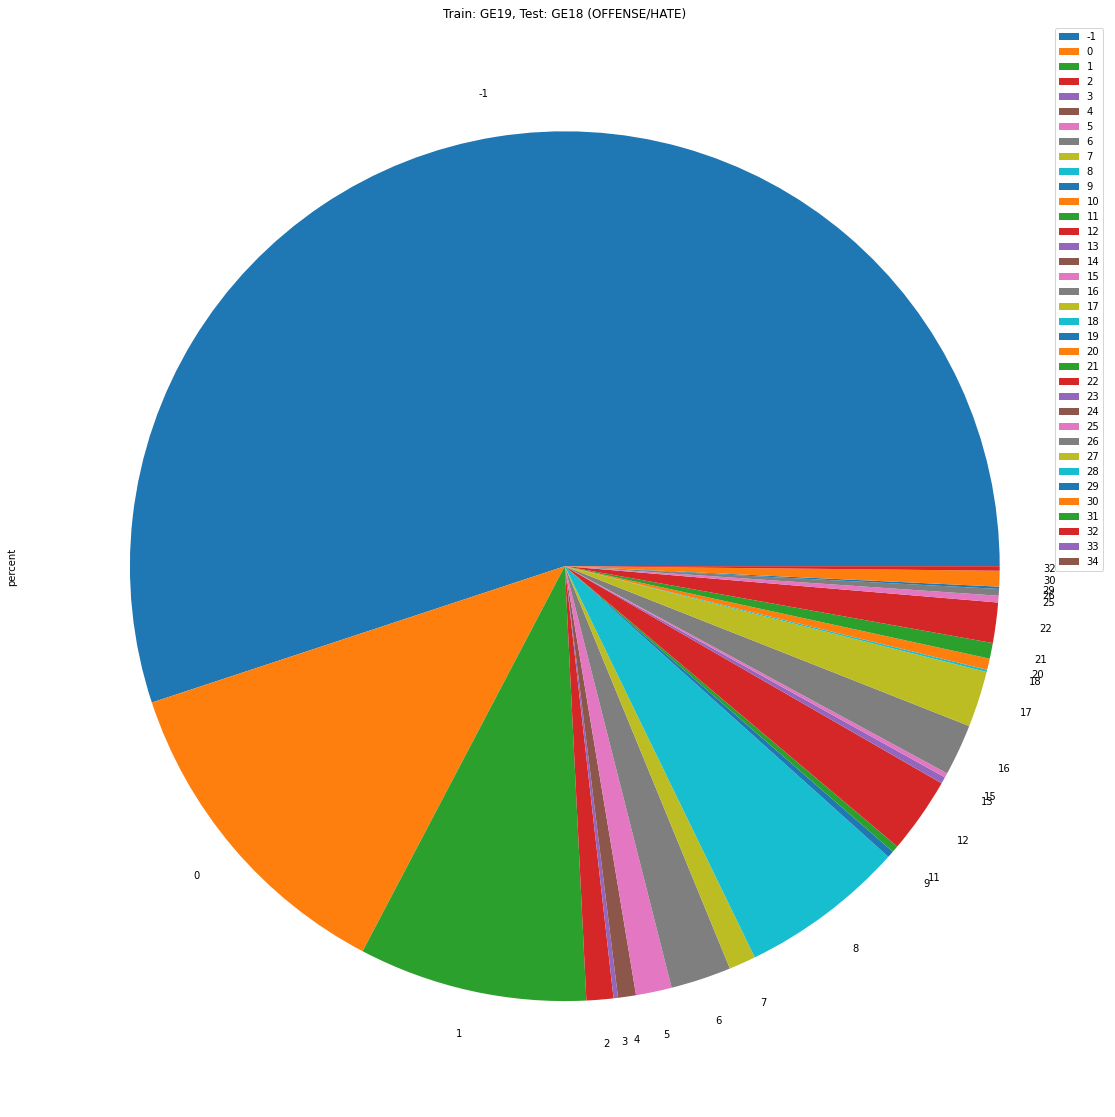

In [ ]:
plot = df_GE18_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: GE18 (OFFENSE/HATE)')


In [ ]:
#plot = ge18_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test

In [ ]:
ge19_test_raw['pred'] = train_ge19_pred_ge19[0]
ge19_test_raw

TWEET      OFF     CAT  pred
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT    -1
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE    -1
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER    22
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE    -1
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE    -1
...                                                 ...      ...     ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER    21
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER    -1
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER    -1
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER     0

[3031 rows x 4 columns]

### GE19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_other = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OTHER']
ge19_test_other


TWEET    OFF    CAT  pred
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER    22
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    -1
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    25
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER    -1
...                                                 ...    ...    ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER    21
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER     0

[2061 rows x 4 columns]

In [ ]:
ge19_test_other_pred_values = pd.DataFrame(ge19_test_other['pred'].value_counts())
ge19_test_other_pred_values['percent'] = (ge19_test_other_pred_values['pred'] / ge19_test_other_pred_values['pred'].sum()) * 100
ge19_test_other_pred_values

pred    percent
-1   1105  53.614750
 0    353  17.127608
 1    125   6.065017
 3     69   3.347889
 5     41   1.989326
 4     27   1.310044
 14    26   1.261524
 30    24   1.164483
 8     23   1.115963
 16    22   1.067443
 2     21   1.018923
 12    19   0.921883
 11    16   0.776322
 20    16   0.776322
 25    16   0.776322
 23    15   0.727802
 10    14   0.679282
 13    13   0.630762
 21    12   0.582242
 15    11   0.533721
 22    11   0.533721
 9     11   0.533721
 7     11   0.533721
 18     9   0.436681
 6      8   0.388161
 31     7   0.339641
 19     6   0.291121
 29     6   0.291121
 27     6   0.291121
 32     5   0.242601
 17     4   0.194081
 24     3   0.145560
 28     2   0.097040
 34     2   0.097040
 33     1   0.048520
 26     1   0.048520

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
df2 = ge19_test_other_pred_values
data_frames = [df1, df2]
df_GE19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OTHER_merged['percent'] = df_GE19_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE19_OTHER_merged['pred'] = df_GE19_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE19_OTHER_sorted = df_GE19_OTHER_merged.sort_values('pred', ascending=False)
df_GE19_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt  1105  53.614750
1       0                            0_uhr_danke_woche_heute   353  17.127608
2       1            1_deutschland_deutsche_deutschen_berlin   125   6.065017
4       3                   3_tweet_twitter_twittern_stegner    69   3.347889
6       5                             5_geld_bezahlt_job_gut    41   1.989326
5       4  4_politik_sozialistische_sozialistischen_demok...    27   1.310044
15     14        14_klimawandel_co²_klimaschutz_klimawandels    26   1.261524
31     30             30_israel_googlem_google_palästinenser    24   1.164483
9       8                     8_islam_muslime_afd_islamismus    23   1.115963
17     16                      16_rassisten_ffe_rassist_hust    22   1.067443
3       2                    2_nazis_nazi_neonazis_holocaust    21   1.018923
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    19   0.921883
26     25                 25_autobahn_berge_radfahrer_fahren    16   0.776322
12     11         11_kartoffeln_essen_lebensmittel_kartoffel    16   0.776322
21     20                   20_lustig_sarkasmus_clown_satire    16   0.776322
24     23  23_kommunistische_kommunisten_kommunismus_feuc...    15   0.727802
11     10                 10_aktivist_innen_solidarität_demo    14   0.679282
14     13                     13_niemand_niemanden_bunt_null    13   0.630762
22     21              21_türkei_kurdischen_türken_türkische    12   0.582242
16     15          15_polizei_pfefferspray_massiv_repression    11   0.533721
10      9                        9_kamera_blog_photo_kameras    11   0.533721
8       7      7_medien_journalisten_propaganda_journalismus    11   0.533721
23     22                     22_religion_kirche_leben_jesus    11   0.533721
19     18               18_geblockt_bauknecht_techniker_here     9   0.436681
7       6                      6_wolf_binsenwombats_hund_rum     8   0.388161
32     31                      31_ffd_fef_offensichtlich_ffe     7   0.339641
30     29        29_frage_rhetorische_debattencamp_diskutier     6   0.291121
28     27            27_medikamente_krankheiten_kommen_markt     6   0.291121
20     19                     19_schnee_winter_liegt_draußen     6   0.291121
33     32                32_wählen_wahlkreis_mitglieder_wahl     5   0.242601
18     17                17_grünen_grüne_entsorgung_ökostrom     4   0.194081
25     24                      24_russland_russen_putin_nato     3   0.145560
29     28                         28_handball_gamer_team_obm     2   0.097040
35     34         34_brasilien_venezuela_imperialisten_monat     2   0.097040
27     26               26_migraene_apuleius_wahrheit_ratten     1   0.048520
34     33               33_terminal_airport_bullen_flughafen     1   0.048520

In [ ]:
df_GE19_OTHER_merged_plt = df_GE19_OTHER_merged.set_index('Topic')


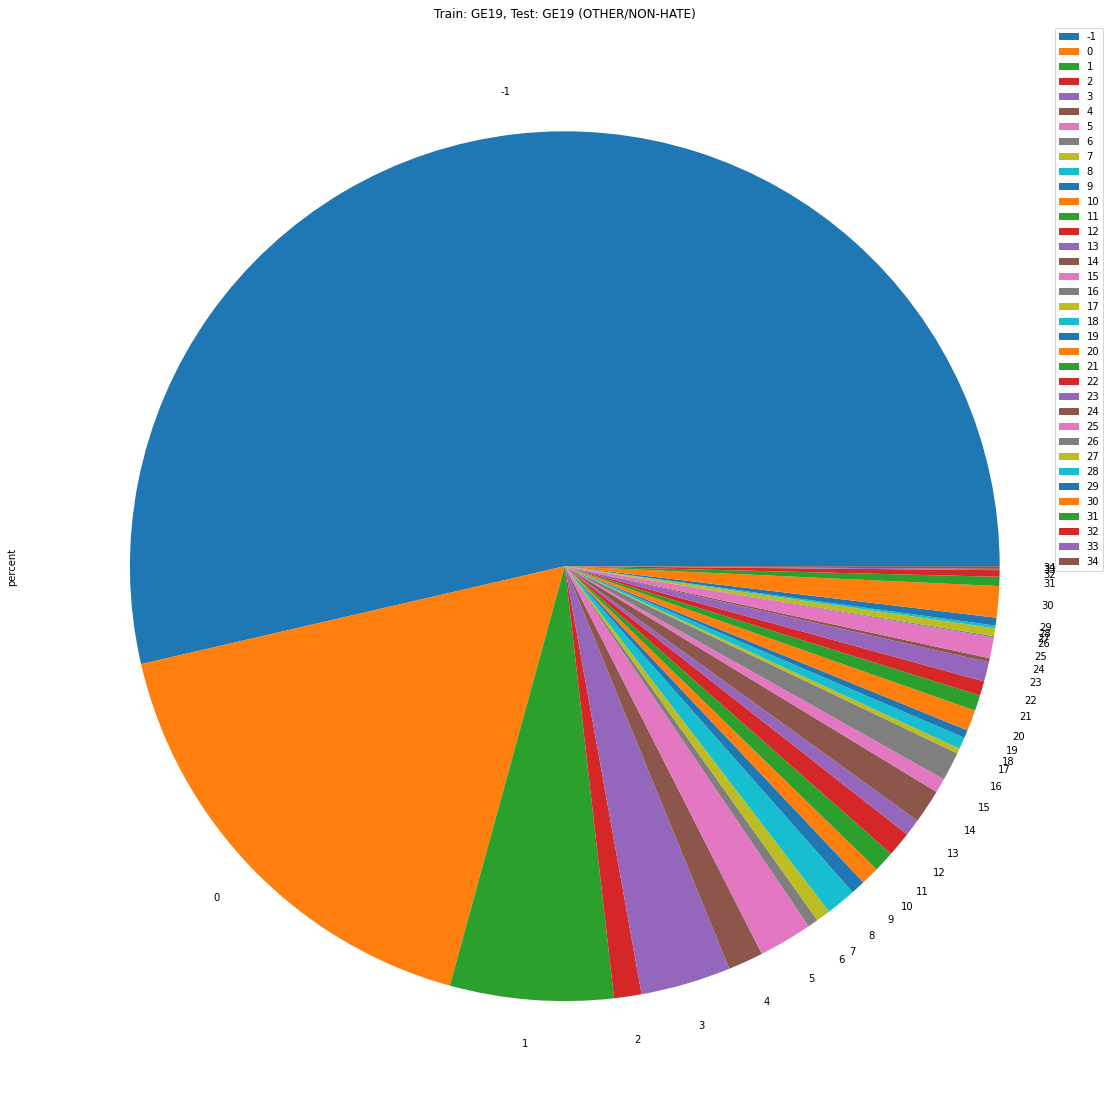

In [ ]:
plot = df_GE19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: GE19 (OTHER/NON-HATE)')


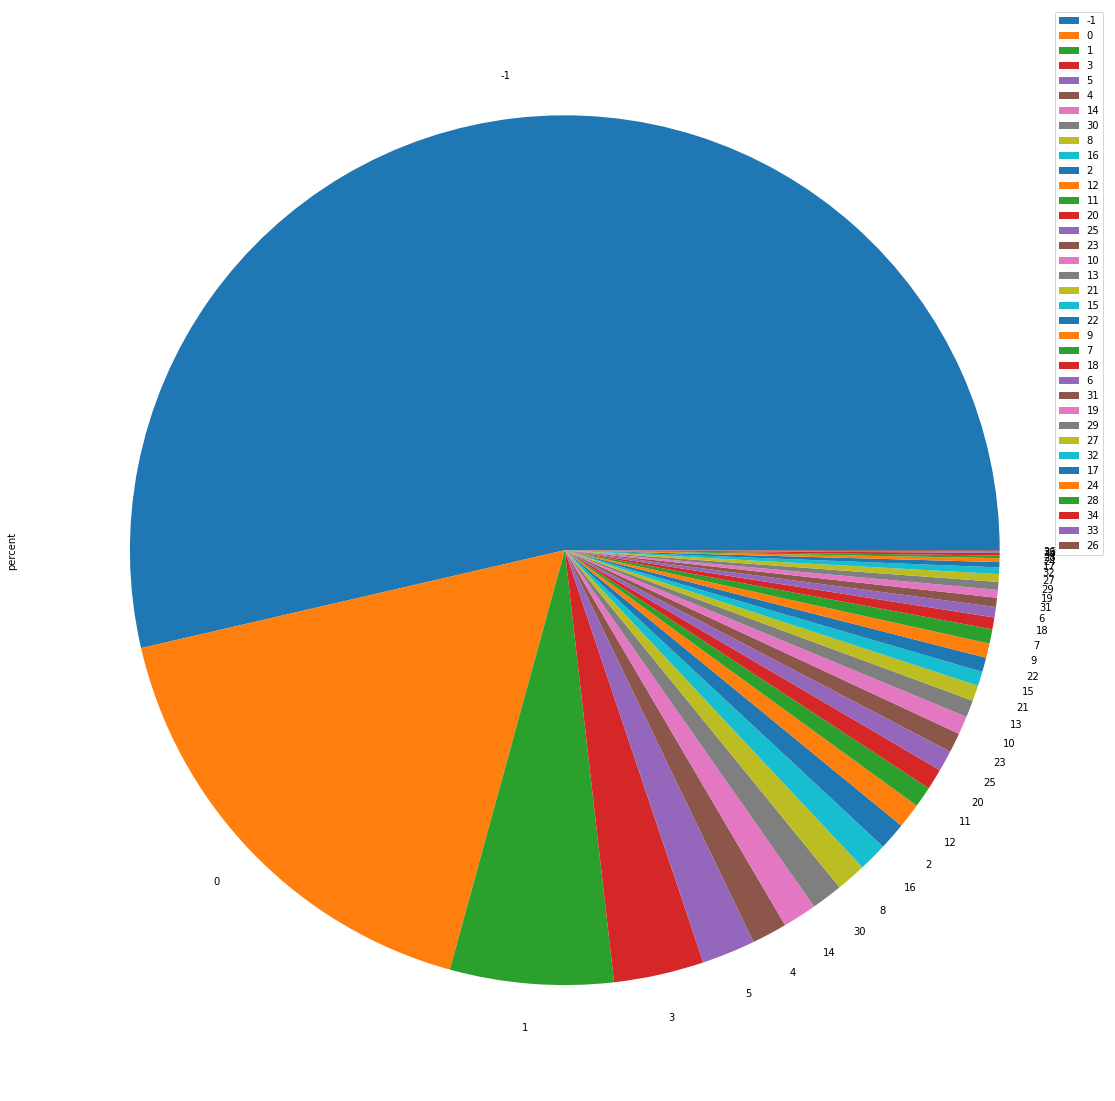

In [ ]:
plot = ge19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_offense = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OFFENSE']
ge19_test_offense


TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  
0       -1  
1       -1  
3       -1  
4       -1  
7       -1  
...    ...  
2889    -1  
2949    21  
2976    -1  
2978    -1  
2988     8  

[970 rows x 4 columns]

In [ ]:
ge19_test_offense_pred_values = pd.DataFrame(ge19_test_offense['pred'].value_counts())
ge19_test_offense_pred_values['percent'] = (ge19_test_offense_pred_values['pred'] / ge19_test_offense_pred_values['pred'].sum()) * 100
ge19_test_offense_pred_values

pred    percent
-1    560  57.731959
 0    116  11.958763
 1     65   6.701031
 2     26   2.680412
 12    18   1.855670
 16    16   1.649485
 30    15   1.546392
 5     15   1.546392
 8     15   1.546392
 7     14   1.443299
 3     13   1.340206
 6     12   1.237113
 4     11   1.134021
 17     9   0.927835
 15     8   0.824742
 23     6   0.618557
 11     6   0.618557
 31     6   0.618557
 20     6   0.618557
 10     4   0.412371
 9      4   0.412371
 22     4   0.412371
 14     3   0.309278
 13     3   0.309278
 32     3   0.309278
 19     3   0.309278
 25     3   0.309278
 24     1   0.103093
 18     1   0.103093
 27     1   0.103093
 28     1   0.103093
 29     1   0.103093
 21     1   0.103093

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
df2 = ge19_test_offense_pred_values
data_frames = [df1, df2]
df_GE19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OFFENSE_merged['percent'] = df_GE19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE19_OFFENSE_merged['pred'] = df_GE19_OFFENSE_merged['pred'].astype(int)
df_GE19_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt   560  57.731959
1       0                            0_uhr_danke_woche_heute   116  11.958763
2       1            1_deutschland_deutsche_deutschen_berlin    65   6.701031
3       2                    2_nazis_nazi_neonazis_holocaust    26   2.680412
4       3                   3_tweet_twitter_twittern_stegner    13   1.340206
5       4  4_politik_sozialistische_sozialistischen_demok...    11   1.134021
6       5                             5_geld_bezahlt_job_gut    15   1.546392
7       6                      6_wolf_binsenwombats_hund_rum    12   1.237113
8       7      7_medien_journalisten_propaganda_journalismus    14   1.443299
9       8                     8_islam_muslime_afd_islamismus    15   1.546392
10      9                        9_kamera_blog_photo_kameras     4   0.412371
11     10                 10_aktivist_innen_solidarität_demo     4   0.412371
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     6   0.618557
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    18   1.855670
14     13                     13_niemand_niemanden_bunt_null     3   0.309278
15     14        14_klimawandel_co²_klimaschutz_klimawandels     3   0.309278
16     15          15_polizei_pfefferspray_massiv_repression     8   0.824742
17     16                      16_rassisten_ffe_rassist_hust    16   1.649485
18     17                17_grünen_grüne_entsorgung_ökostrom     9   0.927835
19     18               18_geblockt_bauknecht_techniker_here     1   0.103093
20     19                     19_schnee_winter_liegt_draußen     3   0.309278
21     20                   20_lustig_sarkasmus_clown_satire     6   0.618557
22     21              21_türkei_kurdischen_türken_türkische     1   0.103093
23     22                     22_religion_kirche_leben_jesus     4   0.412371
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     6   0.618557
25     24                      24_russland_russen_putin_nato     1   0.103093
26     25                 25_autobahn_berge_radfahrer_fahren     3   0.309278
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
28     27            27_medikamente_krankheiten_kommen_markt     1   0.103093
29     28                         28_handball_gamer_team_obm     1   0.103093
30     29        29_frage_rhetorische_debattencamp_diskutier     1   0.103093
31     30             30_israel_googlem_google_palästinenser    15   1.546392
32     31                      31_ffd_fef_offensichtlich_ffe     6   0.618557
33     32                32_wählen_wahlkreis_mitglieder_wahl     3   0.309278
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_GE19_OFFENSE_sorted = df_GE19_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE19_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt   560  57.731959
1       0                            0_uhr_danke_woche_heute   116  11.958763
2       1            1_deutschland_deutsche_deutschen_berlin    65   6.701031
3       2                    2_nazis_nazi_neonazis_holocaust    26   2.680412
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    18   1.855670
17     16                      16_rassisten_ffe_rassist_hust    16   1.649485
6       5                             5_geld_bezahlt_job_gut    15   1.546392
9       8                     8_islam_muslime_afd_islamismus    15   1.546392
31     30             30_israel_googlem_google_palästinenser    15   1.546392
8       7      7_medien_journalisten_propaganda_journalismus    14   1.443299
4       3                   3_tweet_twitter_twittern_stegner    13   1.340206
7       6                      6_wolf_binsenwombats_hund_rum    12   1.237113
5       4  4_politik_sozialistische_sozialistischen_demok...    11   1.134021
18     17                17_grünen_grüne_entsorgung_ökostrom     9   0.927835
16     15          15_polizei_pfefferspray_massiv_repression     8   0.824742
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     6   0.618557
21     20                   20_lustig_sarkasmus_clown_satire     6   0.618557
32     31                      31_ffd_fef_offensichtlich_ffe     6   0.618557
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     6   0.618557
11     10                 10_aktivist_innen_solidarität_demo     4   0.412371
23     22                     22_religion_kirche_leben_jesus     4   0.412371
10      9                        9_kamera_blog_photo_kameras     4   0.412371
14     13                     13_niemand_niemanden_bunt_null     3   0.309278
33     32                32_wählen_wahlkreis_mitglieder_wahl     3   0.309278
20     19                     19_schnee_winter_liegt_draußen     3   0.309278
15     14        14_klimawandel_co²_klimaschutz_klimawandels     3   0.309278
26     25                 25_autobahn_berge_radfahrer_fahren     3   0.309278
29     28                         28_handball_gamer_team_obm     1   0.103093
30     29        29_frage_rhetorische_debattencamp_diskutier     1   0.103093
25     24                      24_russland_russen_putin_nato     1   0.103093
28     27            27_medikamente_krankheiten_kommen_markt     1   0.103093
22     21              21_türkei_kurdischen_türken_türkische     1   0.103093
19     18               18_geblockt_bauknecht_techniker_here     1   0.103093
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_GE19_OFFENSE_merged_plt = df_GE19_OFFENSE_merged.set_index('Topic')


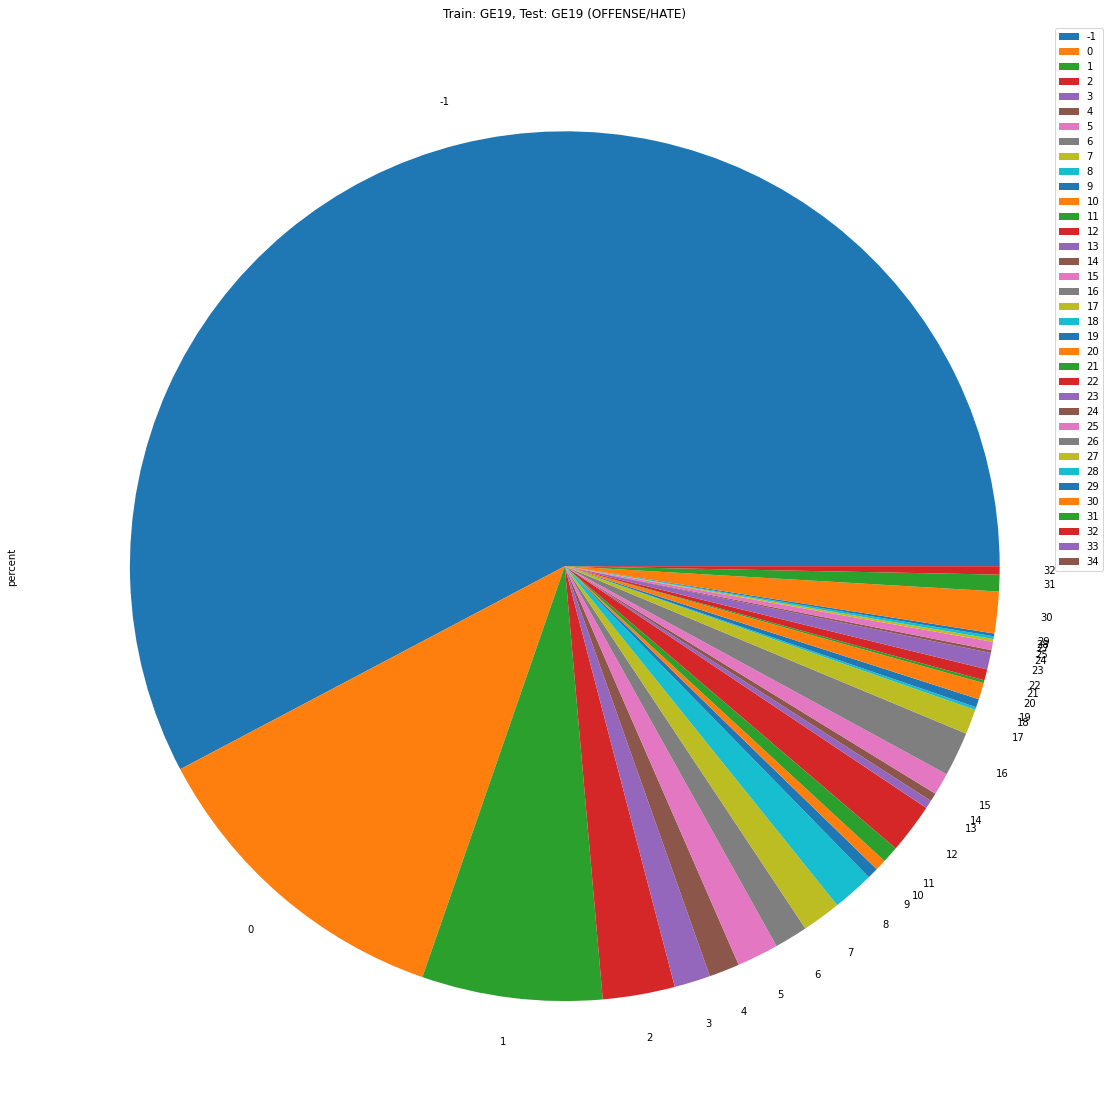

In [ ]:
plot = df_GE19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: GE19 (OFFENSE/HATE)')


In [ ]:
#plot = ge19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test

In [ ]:
h19_test_raw['pred'] = train_ge19_pred_h19[0]
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
0     HATE    -1  
1     NONE     1  
2     NONE     0  
3     OFFN    -1  
4     OFFN    -1  
..     ...   ...  
845   OFFN    -1  
846   OFFN    11  
847   OFFN    -1  
848   OFFN    -1  
849   NONE     0  

[850 rows x 5 columns]

### H19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_other = h19_test_raw.loc[h19_test_raw['task_1'] == 'NOT']
h19_test_other


text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
1     NONE     1  
2     NONE     0  
7     NONE     0  
8     NONE    -1  
9     NONE     0  
..     ...   ...  
837   NONE    -1  
838   NONE     8  
839   NONE    -1  
840   NONE     0  
849   NONE     0  

[714 rows x 5 columns]

In [ ]:
h19_test_other_pred_values = pd.DataFrame(h19_test_other['pred'].value_counts())
h19_test_other_pred_values['percent'] = (h19_test_other_pred_values['pred'] / h19_test_other_pred_values['pred'].sum()) * 100
h19_test_other_pred_values

pred    percent
-1    329  46.078431
 0    138  19.327731
 1     92  12.885154
 12    26   3.641457
 5     22   3.081232
 4     16   2.240896
 3     10   1.400560
 8     10   1.400560
 24     8   1.120448
 7      7   0.980392
 2      7   0.980392
 17     6   0.840336
 14     5   0.700280
 6      5   0.700280
 9      4   0.560224
 25     3   0.420168
 16     3   0.420168
 15     3   0.420168
 11     3   0.420168
 21     2   0.280112
 19     2   0.280112
 10     2   0.280112
 13     2   0.280112
 27     2   0.280112
 22     2   0.280112
 29     1   0.140056
 33     1   0.140056
 30     1   0.140056
 34     1   0.140056
 23     1   0.140056

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
df2 = h19_test_other_pred_values
data_frames = [df1, df2]
df_H19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OTHER_merged['percent'] = df_H19_OTHER_merged['percent'].astype(float)

In [ ]:
df_H19_OTHER_merged['pred'] = df_H19_OTHER_merged['pred'].astype(int)

In [ ]:
df_H19_OTHER_sorted = df_H19_OTHER_merged.sort_values('pred', ascending=False)
df_H19_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt   329  46.078431
1       0                            0_uhr_danke_woche_heute   138  19.327731
2       1            1_deutschland_deutsche_deutschen_berlin    92  12.885154
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose    26   3.641457
6       5                             5_geld_bezahlt_job_gut    22   3.081232
5       4  4_politik_sozialistische_sozialistischen_demok...    16   2.240896
4       3                   3_tweet_twitter_twittern_stegner    10   1.400560
9       8                     8_islam_muslime_afd_islamismus    10   1.400560
25     24                      24_russland_russen_putin_nato     8   1.120448
3       2                    2_nazis_nazi_neonazis_holocaust     7   0.980392
8       7      7_medien_journalisten_propaganda_journalismus     7   0.980392
18     17                17_grünen_grüne_entsorgung_ökostrom     6   0.840336
15     14        14_klimawandel_co²_klimaschutz_klimawandels     5   0.700280
7       6                      6_wolf_binsenwombats_hund_rum     5   0.700280
10      9                        9_kamera_blog_photo_kameras     4   0.560224
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     3   0.420168
16     15          15_polizei_pfefferspray_massiv_repression     3   0.420168
17     16                      16_rassisten_ffe_rassist_hust     3   0.420168
26     25                 25_autobahn_berge_radfahrer_fahren     3   0.420168
28     27            27_medikamente_krankheiten_kommen_markt     2   0.280112
14     13                     13_niemand_niemanden_bunt_null     2   0.280112
20     19                     19_schnee_winter_liegt_draußen     2   0.280112
22     21              21_türkei_kurdischen_türken_türkische     2   0.280112
23     22                     22_religion_kirche_leben_jesus     2   0.280112
11     10                 10_aktivist_innen_solidarität_demo     2   0.280112
34     33               33_terminal_airport_bullen_flughafen     1   0.140056
31     30             30_israel_googlem_google_palästinenser     1   0.140056
30     29        29_frage_rhetorische_debattencamp_diskutier     1   0.140056
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     1   0.140056
35     34         34_brasilien_venezuela_imperialisten_monat     1   0.140056
29     28                         28_handball_gamer_team_obm     0   0.000000
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
21     20                   20_lustig_sarkasmus_clown_satire     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     0   0.000000
19     18               18_geblockt_bauknecht_techniker_here     0   0.000000

In [ ]:
df_H19_OTHER_merged_plt = df_H19_OTHER_merged.set_index('Topic')


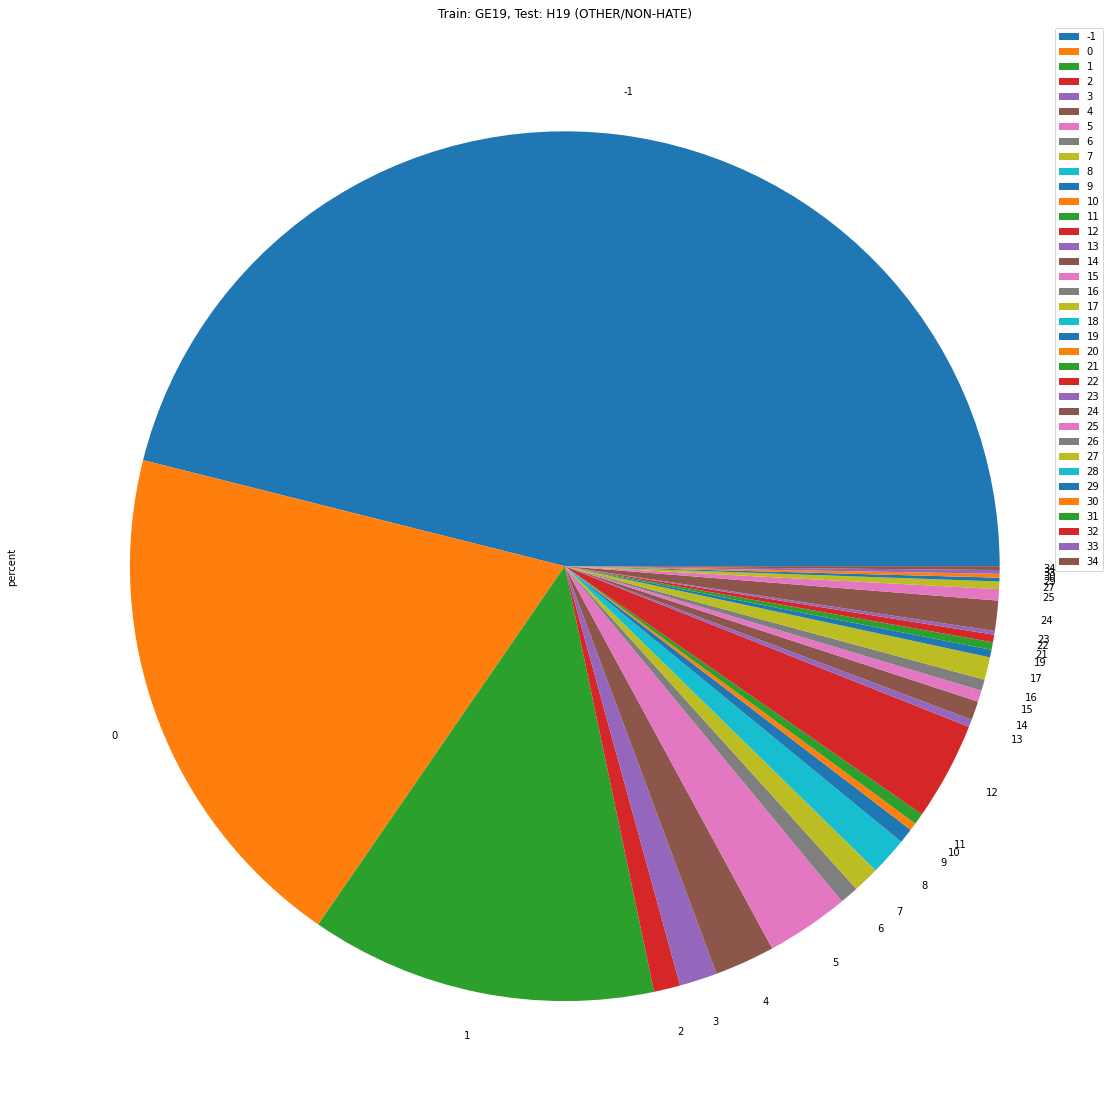

In [ ]:
plot = df_H19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: H19 (OTHER/NON-HATE)')


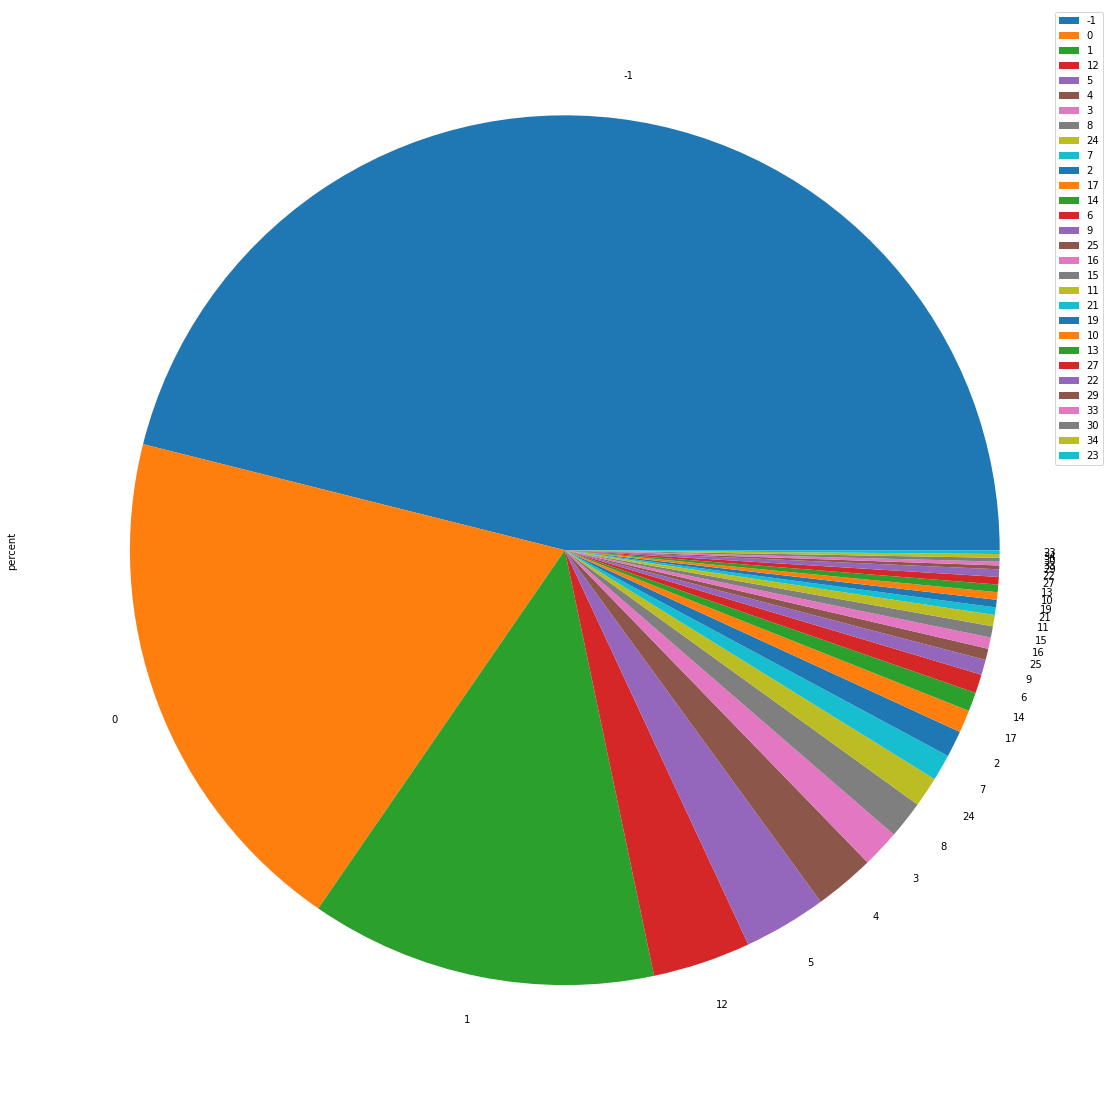

In [ ]:
plot = h19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_offense = h19_test_raw.loc[h19_test_raw['task_1'] == 'HOF']
h19_test_offense


text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  
0     HATE    -1  
3     OFFN    -1  
4     OFFN    -1  
5     HATE    -1  
6     OFFN    16  
..     ...   ...  
844   OFFN    -1  
845   OFFN    -1  
846   OFFN    11  
847   OFFN    -1  
848   OFFN    -1  

[136 rows x 5 columns]

In [ ]:
h19_test_offense_pred_values = pd.DataFrame(h19_test_offense['pred'].value_counts())
h19_test_offense_pred_values['percent'] = (h19_test_offense_pred_values['pred'] / h19_test_offense_pred_values['pred'].sum()) * 100
h19_test_offense_pred_values

pred    percent
-1     77  56.617647
 1     17  12.500000
 8      7   5.147059
 0      5   3.676471
 16     4   2.941176
 2      4   2.941176
 24     3   2.205882
 12     3   2.205882
 22     2   1.470588
 7      2   1.470588
 4      2   1.470588
 6      2   1.470588
 3      1   0.735294
 20     1   0.735294
 17     1   0.735294
 21     1   0.735294
 5      1   0.735294
 14     1   0.735294
 15     1   0.735294
 11     1   0.735294

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
df2 = h19_test_offense_pred_values
data_frames = [df1, df2]
df_H19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OFFENSE_merged['percent'] = df_H19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H19_OFFENSE_merged['pred'] = df_H19_OFFENSE_merged['pred'].astype(int)
df_H19_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt    77  56.617647
1       0                            0_uhr_danke_woche_heute     5   3.676471
2       1            1_deutschland_deutsche_deutschen_berlin    17  12.500000
3       2                    2_nazis_nazi_neonazis_holocaust     4   2.941176
4       3                   3_tweet_twitter_twittern_stegner     1   0.735294
5       4  4_politik_sozialistische_sozialistischen_demok...     2   1.470588
6       5                             5_geld_bezahlt_job_gut     1   0.735294
7       6                      6_wolf_binsenwombats_hund_rum     2   1.470588
8       7      7_medien_journalisten_propaganda_journalismus     2   1.470588
9       8                     8_islam_muslime_afd_islamismus     7   5.147059
10      9                        9_kamera_blog_photo_kameras     0   0.000000
11     10                 10_aktivist_innen_solidarität_demo     0   0.000000
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     1   0.735294
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     3   2.205882
14     13                     13_niemand_niemanden_bunt_null     0   0.000000
15     14        14_klimawandel_co²_klimaschutz_klimawandels     1   0.735294
16     15          15_polizei_pfefferspray_massiv_repression     1   0.735294
17     16                      16_rassisten_ffe_rassist_hust     4   2.941176
18     17                17_grünen_grüne_entsorgung_ökostrom     1   0.735294
19     18               18_geblockt_bauknecht_techniker_here     0   0.000000
20     19                     19_schnee_winter_liegt_draußen     0   0.000000
21     20                   20_lustig_sarkasmus_clown_satire     1   0.735294
22     21              21_türkei_kurdischen_türken_türkische     1   0.735294
23     22                     22_religion_kirche_leben_jesus     2   1.470588
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
25     24                      24_russland_russen_putin_nato     3   2.205882
26     25                 25_autobahn_berge_radfahrer_fahren     0   0.000000
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
28     27            27_medikamente_krankheiten_kommen_markt     0   0.000000
29     28                         28_handball_gamer_team_obm     0   0.000000
30     29        29_frage_rhetorische_debattencamp_diskutier     0   0.000000
31     30             30_israel_googlem_google_palästinenser     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_H19_OFFENSE_sorted = df_H19_OFFENSE_merged.sort_values('pred', ascending=False)
df_H19_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt    77  56.617647
2       1            1_deutschland_deutsche_deutschen_berlin    17  12.500000
9       8                     8_islam_muslime_afd_islamismus     7   5.147059
1       0                            0_uhr_danke_woche_heute     5   3.676471
3       2                    2_nazis_nazi_neonazis_holocaust     4   2.941176
17     16                      16_rassisten_ffe_rassist_hust     4   2.941176
25     24                      24_russland_russen_putin_nato     3   2.205882
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     3   2.205882
5       4  4_politik_sozialistische_sozialistischen_demok...     2   1.470588
23     22                     22_religion_kirche_leben_jesus     2   1.470588
7       6                      6_wolf_binsenwombats_hund_rum     2   1.470588
8       7      7_medien_journalisten_propaganda_journalismus     2   1.470588
16     15          15_polizei_pfefferspray_massiv_repression     1   0.735294
22     21              21_türkei_kurdischen_türken_türkische     1   0.735294
21     20                   20_lustig_sarkasmus_clown_satire     1   0.735294
18     17                17_grünen_grüne_entsorgung_ökostrom     1   0.735294
15     14        14_klimawandel_co²_klimaschutz_klimawandels     1   0.735294
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     1   0.735294
6       5                             5_geld_bezahlt_job_gut     1   0.735294
4       3                   3_tweet_twitter_twittern_stegner     1   0.735294
28     27            27_medikamente_krankheiten_kommen_markt     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
31     30             30_israel_googlem_google_palästinenser     0   0.000000
30     29        29_frage_rhetorische_debattencamp_diskutier     0   0.000000
29     28                         28_handball_gamer_team_obm     0   0.000000
26     25                 25_autobahn_berge_radfahrer_fahren     0   0.000000
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
14     13                     13_niemand_niemanden_bunt_null     0   0.000000
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
10      9                        9_kamera_blog_photo_kameras     0   0.000000
11     10                 10_aktivist_innen_solidarität_demo     0   0.000000
20     19                     19_schnee_winter_liegt_draußen     0   0.000000
19     18               18_geblockt_bauknecht_techniker_here     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_H19_OFFENSE_merged_plt = df_H19_OFFENSE_merged.set_index('Topic')


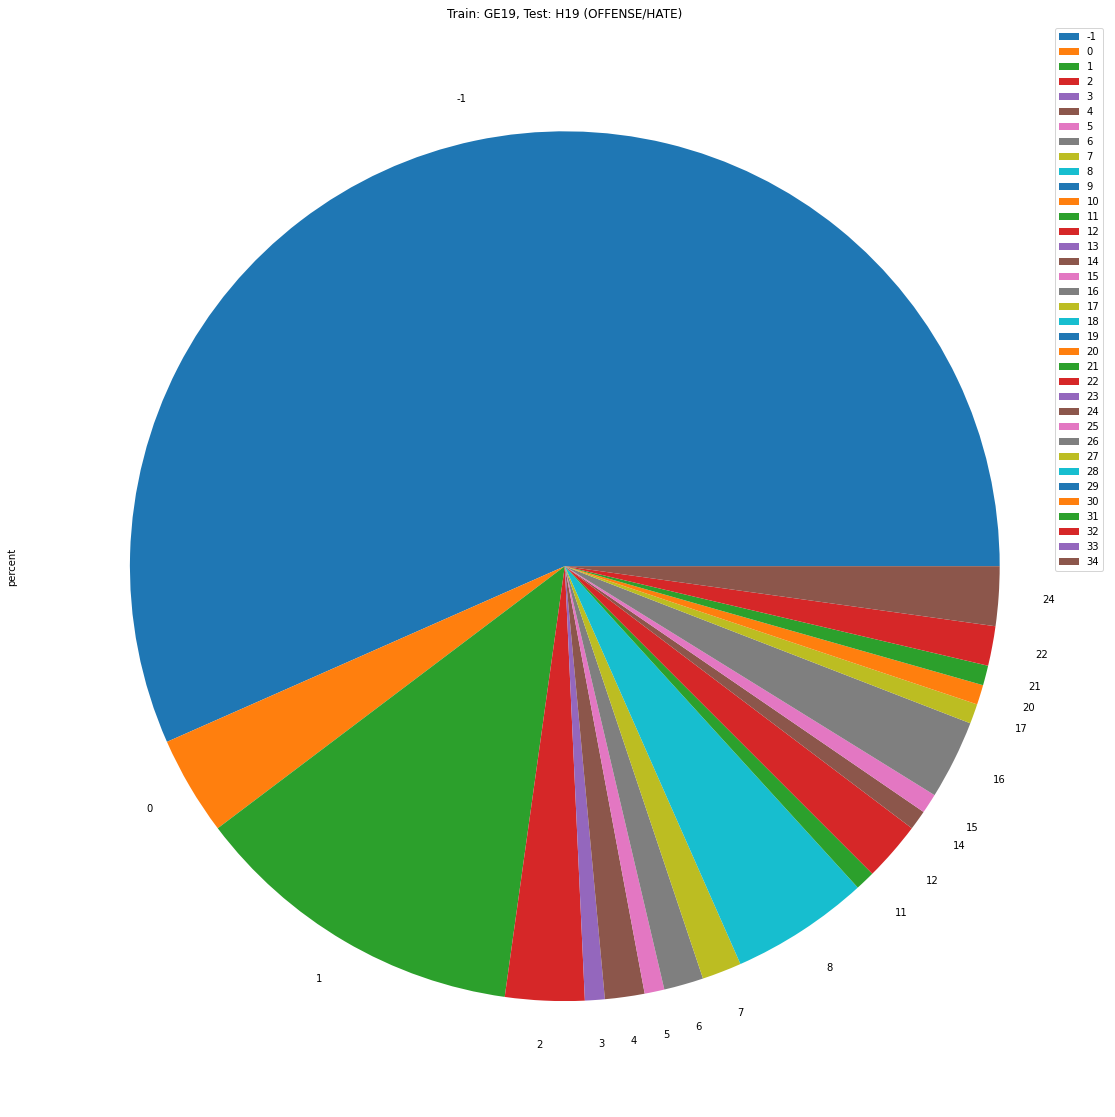

In [ ]:
plot = df_H19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: H19 (OFFENSE/HATE)')


In [ ]:
#plot = h19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test

In [ ]:
h20_test_raw['pred'] = train_ge19_pred_h20[0]
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    10  
1     hasoc_2020_de_671     0  
2    hasoc_2020_de_2977    -1  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416    -1  
..                  ...   ...  
521   hasoc_2020_de_486    -1  
522  hasoc_2020_de_3388    17  
523  hasoc_2020_de_2745    -1  
524   hasoc_2020_de_236    -1  
525  hasoc_2020_de_2850    17  

[526 rows x 7 columns]

### H20_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_other = h20_test_raw.loc[h20_test_raw['task1'] == 'NOT']
h20_test_other


Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    10  
1     hasoc_2020_de_671     0  
2    hasoc_2020_de_2977    -1  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416    -1  
..                  ...   ...  
521   hasoc_2020_de_486    -1  
522  hasoc_2020_de_3388    17  
523  hasoc_2020_de_2745    -1  
524   hasoc_2020_de_236    -1  
525  hasoc_2020_de_2850    17  

[365 rows x 7 columns]

In [ ]:
h20_test_other_pred_values = pd.DataFrame(h20_test_other['pred'].value_counts())
h20_test_other_pred_values['percent'] = (h20_test_other_pred_values['pred'] / h20_test_other_pred_values['pred'].sum()) * 100
h20_test_other_pred_values

pred    percent
-1    174  47.671233
 0     82  22.465753
 1     37  10.136986
 17    22   6.027397
 2     12   3.287671
 8     10   2.739726
 5      6   1.643836
 11     4   1.095890
 21     3   0.821918
 20     2   0.547945
 13     1   0.273973
 25     1   0.273973
 34     1   0.273973
 22     1   0.273973
 12     1   0.273973
 18     1   0.273973
 10     1   0.273973
 6      1   0.273973
 16     1   0.273973
 4      1   0.273973
 14     1   0.273973
 3      1   0.273973
 7      1   0.273973

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
df2 = h20_test_other_pred_values
data_frames = [df1, df2]
df_H20_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OTHER_merged['percent'] = df_H20_OTHER_merged['percent'].astype(float)

In [ ]:
df_H20_OTHER_merged['pred'] = df_H20_OTHER_merged['pred'].astype(int)

In [ ]:
df_H20_OTHER_sorted = df_H20_OTHER_merged.sort_values('pred', ascending=False)
df_H20_OTHER_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt   174  47.671233
1       0                            0_uhr_danke_woche_heute    82  22.465753
2       1            1_deutschland_deutsche_deutschen_berlin    37  10.136986
18     17                17_grünen_grüne_entsorgung_ökostrom    22   6.027397
3       2                    2_nazis_nazi_neonazis_holocaust    12   3.287671
9       8                     8_islam_muslime_afd_islamismus    10   2.739726
6       5                             5_geld_bezahlt_job_gut     6   1.643836
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     4   1.095890
22     21              21_türkei_kurdischen_türken_türkische     3   0.821918
21     20                   20_lustig_sarkasmus_clown_satire     2   0.547945
4       3                   3_tweet_twitter_twittern_stegner     1   0.273973
17     16                      16_rassisten_ffe_rassist_hust     1   0.273973
26     25                 25_autobahn_berge_radfahrer_fahren     1   0.273973
23     22                     22_religion_kirche_leben_jesus     1   0.273973
5       4  4_politik_sozialistische_sozialistischen_demok...     1   0.273973
19     18               18_geblockt_bauknecht_techniker_here     1   0.273973
35     34         34_brasilien_venezuela_imperialisten_monat     1   0.273973
7       6                      6_wolf_binsenwombats_hund_rum     1   0.273973
14     13                     13_niemand_niemanden_bunt_null     1   0.273973
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     1   0.273973
11     10                 10_aktivist_innen_solidarität_demo     1   0.273973
8       7      7_medien_journalisten_propaganda_journalismus     1   0.273973
15     14        14_klimawandel_co²_klimaschutz_klimawandels     1   0.273973
29     28                         28_handball_gamer_team_obm     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
31     30             30_israel_googlem_google_palästinenser     0   0.000000
30     29        29_frage_rhetorische_debattencamp_diskutier     0   0.000000
16     15          15_polizei_pfefferspray_massiv_repression     0   0.000000
28     27            27_medikamente_krankheiten_kommen_markt     0   0.000000
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
25     24                      24_russland_russen_putin_nato     0   0.000000
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
10      9                        9_kamera_blog_photo_kameras     0   0.000000
20     19                     19_schnee_winter_liegt_draußen     0   0.000000

In [ ]:
df_H20_OTHER_merged_plt = df_H20_OTHER_merged.set_index('Topic')


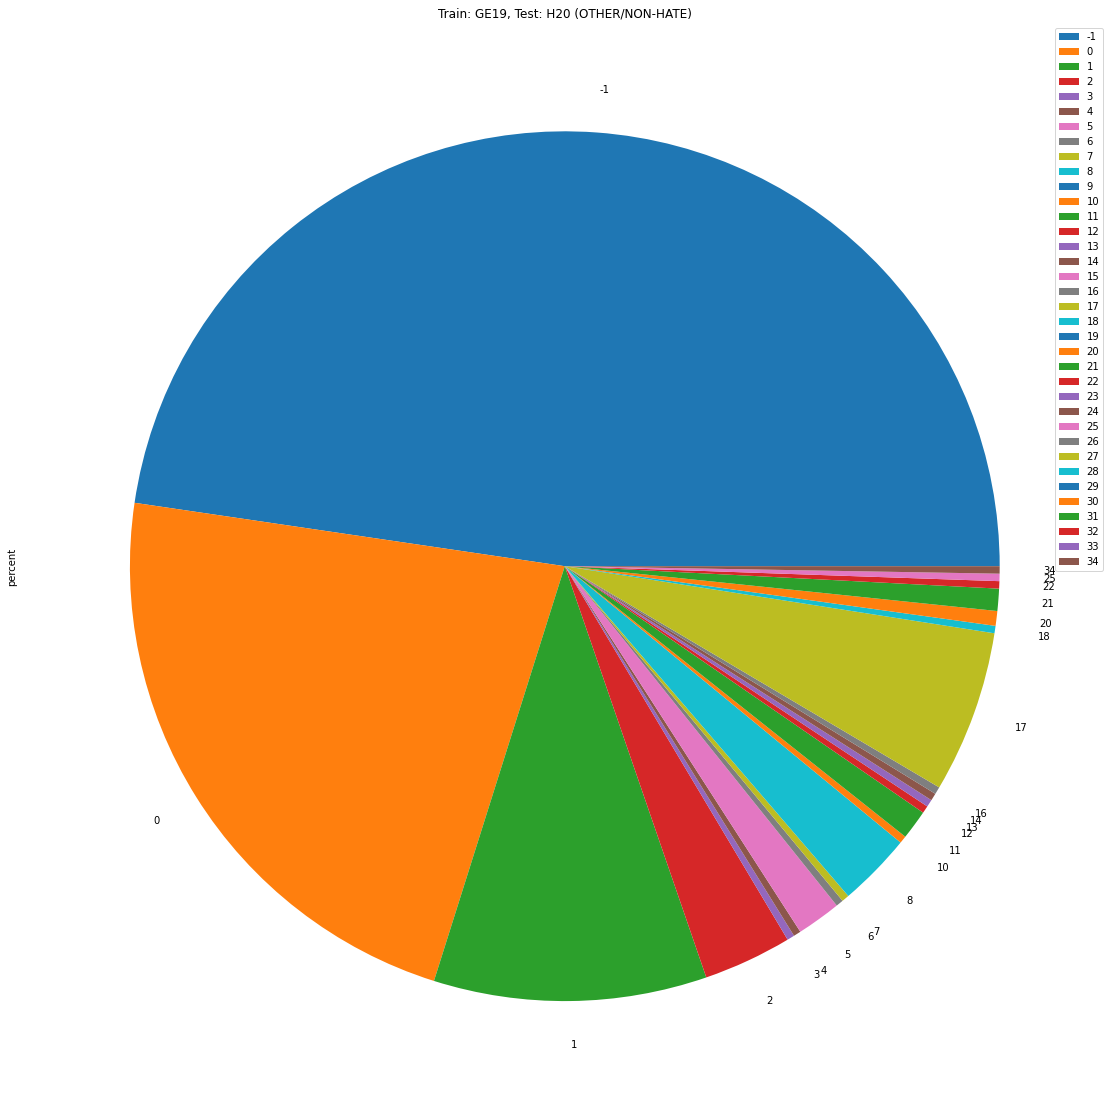

In [ ]:
plot = df_H20_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: H20 (OTHER/NON-HATE)')


In [ ]:
#plot = h20_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_offense = h20_test_raw.loc[h20_test_raw['task1'] == 'HOF']
h20_test_offense


Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  
5    hasoc_2020_de_1112    -1  
6    hasoc_2020_de_2938    -1  
17   hasoc_2020_de_2545    -1  
21   hasoc_2020_de_1235    -1  
22   hasoc_2020_de_2487    -1  
..                  ...   ...  
500  hasoc_2020_de_1958     0  
508  hasoc_2020_de_2465    -1  
511   hasoc_2020_de_958    -1  
512  hasoc_2020_de_2470    -1  
517   hasoc_2020_de_986    -1  

[161 rows x 7 columns]

In [ ]:
h20_test_offense_pred_values = pd.DataFrame(h20_test_offense['pred'].value_counts())
h20_test_offense_pred_values['percent'] = (h20_test_offense_pred_values['pred'] / h20_test_offense_pred_values['pred'].sum()) * 100
h20_test_offense_pred_values

pred    percent
-1     87  54.037267
 0     25  15.527950
 1     14   8.695652
 6      7   4.347826
 11     6   3.726708
 17     5   3.105590
 5      3   1.863354
 12     3   1.863354
 24     2   1.242236
 8      2   1.242236
 2      2   1.242236
 9      1   0.621118
 3      1   0.621118
 27     1   0.621118
 4      1   0.621118
 21     1   0.621118

In [ ]:
df1 =  train_ge19_model_topics[['Topic','Name']]
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
df2 = h20_test_offense_pred_values
data_frames = [df1, df2]
df_H20_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OFFENSE_merged['percent'] = df_H20_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H20_OFFENSE_merged['pred'] = df_H20_OFFENSE_merged['pred'].astype(int)
df_H20_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt    87  54.037267
1       0                            0_uhr_danke_woche_heute    25  15.527950
2       1            1_deutschland_deutsche_deutschen_berlin    14   8.695652
3       2                    2_nazis_nazi_neonazis_holocaust     2   1.242236
4       3                   3_tweet_twitter_twittern_stegner     1   0.621118
5       4  4_politik_sozialistische_sozialistischen_demok...     1   0.621118
6       5                             5_geld_bezahlt_job_gut     3   1.863354
7       6                      6_wolf_binsenwombats_hund_rum     7   4.347826
8       7      7_medien_journalisten_propaganda_journalismus     0   0.000000
9       8                     8_islam_muslime_afd_islamismus     2   1.242236
10      9                        9_kamera_blog_photo_kameras     1   0.621118
11     10                 10_aktivist_innen_solidarität_demo     0   0.000000
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     6   3.726708
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     3   1.863354
14     13                     13_niemand_niemanden_bunt_null     0   0.000000
15     14        14_klimawandel_co²_klimaschutz_klimawandels     0   0.000000
16     15          15_polizei_pfefferspray_massiv_repression     0   0.000000
17     16                      16_rassisten_ffe_rassist_hust     0   0.000000
18     17                17_grünen_grüne_entsorgung_ökostrom     5   3.105590
19     18               18_geblockt_bauknecht_techniker_here     0   0.000000
20     19                     19_schnee_winter_liegt_draußen     0   0.000000
21     20                   20_lustig_sarkasmus_clown_satire     0   0.000000
22     21              21_türkei_kurdischen_türken_türkische     1   0.621118
23     22                     22_religion_kirche_leben_jesus     0   0.000000
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
25     24                      24_russland_russen_putin_nato     2   1.242236
26     25                 25_autobahn_berge_radfahrer_fahren     0   0.000000
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
28     27            27_medikamente_krankheiten_kommen_markt     1   0.621118
29     28                         28_handball_gamer_team_obm     0   0.000000
30     29        29_frage_rhetorische_debattencamp_diskutier     0   0.000000
31     30             30_israel_googlem_google_palästinenser     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_H20_OFFENSE_sorted = df_H20_OFFENSE_merged.sort_values('pred', ascending=False)
df_H20_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1                           -1_heute_geht_immer_gibt    87  54.037267
1       0                            0_uhr_danke_woche_heute    25  15.527950
2       1            1_deutschland_deutsche_deutschen_berlin    14   8.695652
7       6                      6_wolf_binsenwombats_hund_rum     7   4.347826
12     11         11_kartoffeln_essen_lebensmittel_kartoffel     6   3.726708
18     17                17_grünen_grüne_entsorgung_ökostrom     5   3.105590
6       5                             5_geld_bezahlt_job_gut     3   1.863354
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     3   1.863354
3       2                    2_nazis_nazi_neonazis_holocaust     2   1.242236
9       8                     8_islam_muslime_afd_islamismus     2   1.242236
25     24                      24_russland_russen_putin_nato     2   1.242236
22     21              21_türkei_kurdischen_türken_türkische     1   0.621118
10      9                        9_kamera_blog_photo_kameras     1   0.621118
5       4  4_politik_sozialistische_sozialistischen_demok...     1   0.621118
4       3                   3_tweet_twitter_twittern_stegner     1   0.621118
28     27            27_medikamente_krankheiten_kommen_markt     1   0.621118
27     26               26_migraene_apuleius_wahrheit_ratten     0   0.000000
31     30             30_israel_googlem_google_palästinenser     0   0.000000
29     28                         28_handball_gamer_team_obm     0   0.000000
30     29        29_frage_rhetorische_debattencamp_diskutier     0   0.000000
32     31                      31_ffd_fef_offensichtlich_ffe     0   0.000000
33     32                32_wählen_wahlkreis_mitglieder_wahl     0   0.000000
34     33               33_terminal_airport_bullen_flughafen     0   0.000000
26     25                 25_autobahn_berge_radfahrer_fahren     0   0.000000
21     20                   20_lustig_sarkasmus_clown_satire     0   0.000000
24     23  23_kommunistische_kommunisten_kommunismus_feuc...     0   0.000000
23     22                     22_religion_kirche_leben_jesus     0   0.000000
20     19                     19_schnee_winter_liegt_draußen     0   0.000000
19     18               18_geblockt_bauknecht_techniker_here     0   0.000000
17     16                      16_rassisten_ffe_rassist_hust     0   0.000000
16     15          15_polizei_pfefferspray_massiv_repression     0   0.000000
15     14        14_klimawandel_co²_klimaschutz_klimawandels     0   0.000000
14     13                     13_niemand_niemanden_bunt_null     0   0.000000
11     10                 10_aktivist_innen_solidarität_demo     0   0.000000
8       7      7_medien_journalisten_propaganda_journalismus     0   0.000000
35     34         34_brasilien_venezuela_imperialisten_monat     0   0.000000

In [ ]:
df_H20_OFFENSE_merged_plt = df_H20_OFFENSE_merged.set_index('Topic')


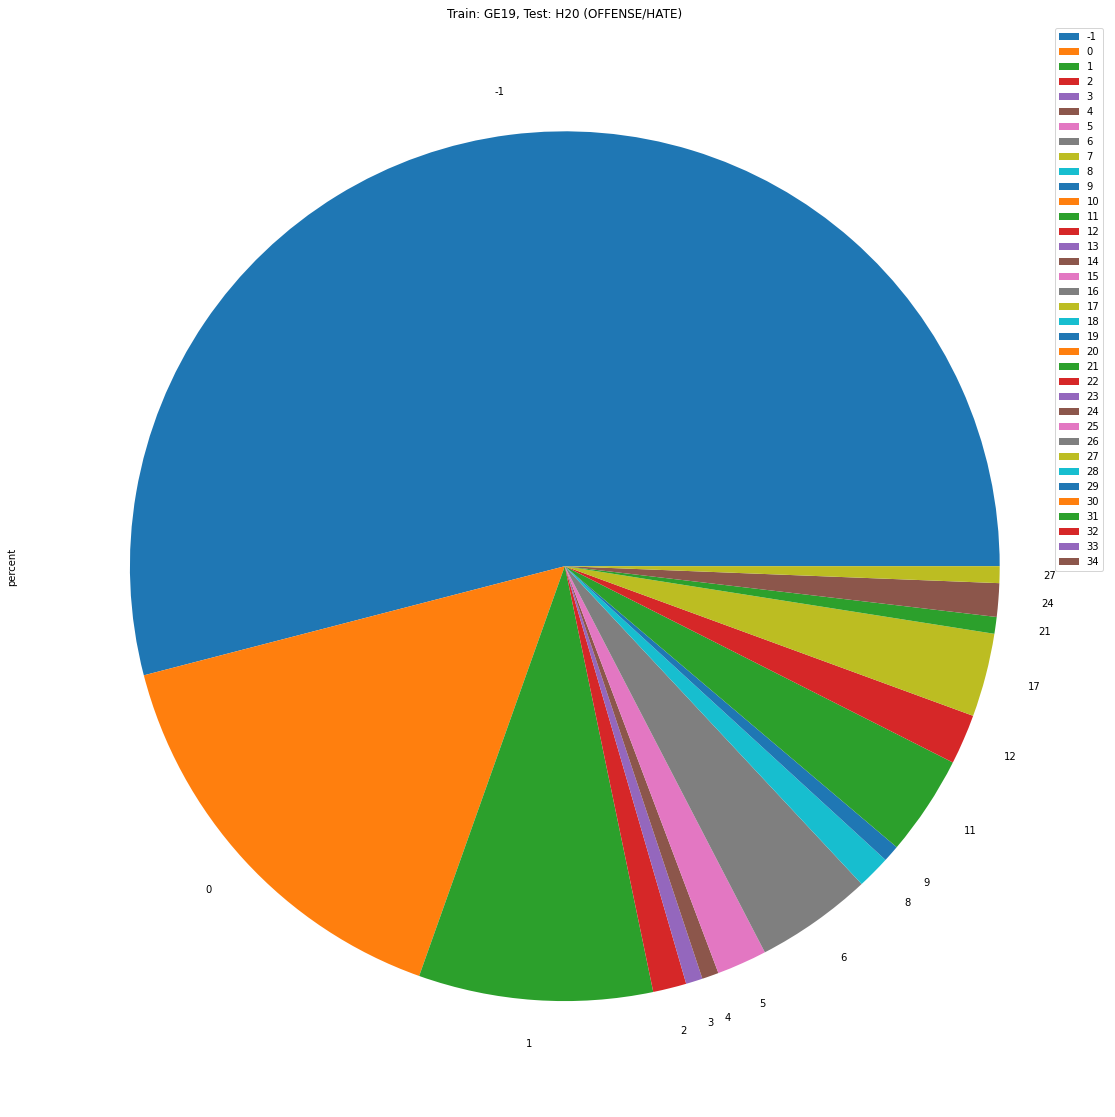

In [ ]:
plot = df_H20_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE19, Test: H20 (OFFENSE/HATE)')


### Index richtig setzen: Kategorie OTHER bzw. NOT

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
ge18_test_other_pred_values

pred    percent  Topic
-1   1258  53.991416     -1
 0    373  16.008584      0
 1    165   7.081545      1
 22    78   3.347639     22
 3     47   2.017167      3
 8     41   1.759657      8
 12    41   1.759657     12
 5     37   1.587983      5
 4     28   1.201717      4
 6     27   1.158798      6
 13    22   0.944206     13
 16    21   0.901288     16
 17    19   0.815451     17
 2     18   0.772532      2
 7     16   0.686695      7
 21    16   0.686695     21
 30    14   0.600858     30
 9     13   0.557940      9
 25    12   0.515021     25
 20    12   0.515021     20
 14    10   0.429185     14
 29     9   0.386266     29
 32     7   0.300429     32
 10     7   0.300429     10
 15     7   0.300429     15
 11     6   0.257511     11
 27     5   0.214592     27
 26     5   0.214592     26
 18     4   0.171674     18
 24     4   0.171674     24
 31     2   0.085837     31
 28     2   0.085837     28
 23     2   0.085837     23
 33     1   0.042918     33
 19     1   0.042918     19

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_other_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
ge19_test_other_pred_values

pred    percent  Topic
-1   1105  53.614750     -1
 0    353  17.127608      0
 1    125   6.065017      1
 3     69   3.347889      3
 5     41   1.989326      5
 4     27   1.310044      4
 14    26   1.261524     14
 30    24   1.164483     30
 8     23   1.115963      8
 16    22   1.067443     16
 2     21   1.018923      2
 12    19   0.921883     12
 11    16   0.776322     11
 20    16   0.776322     20
 25    16   0.776322     25
 23    15   0.727802     23
 10    14   0.679282     10
 13    13   0.630762     13
 21    12   0.582242     21
 15    11   0.533721     15
 22    11   0.533721     22
 9     11   0.533721      9
 7     11   0.533721      7
 18     9   0.436681     18
 6      8   0.388161      6
 31     7   0.339641     31
 19     6   0.291121     19
 29     6   0.291121     29
 27     6   0.291121     27
 32     5   0.242601     32
 17     4   0.194081     17
 24     3   0.145560     24
 28     2   0.097040     28
 34     2   0.097040     34
 33     1   0.048520     33
 26     1   0.048520     26

In [ ]:
df3 = ge19_test_other_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
h19_test_other_pred_values

pred    percent  Topic
-1    329  46.078431     -1
 0    138  19.327731      0
 1     92  12.885154      1
 12    26   3.641457     12
 5     22   3.081232      5
 4     16   2.240896      4
 3     10   1.400560      3
 8     10   1.400560      8
 24     8   1.120448     24
 7      7   0.980392      7
 2      7   0.980392      2
 17     6   0.840336     17
 14     5   0.700280     14
 6      5   0.700280      6
 9      4   0.560224      9
 25     3   0.420168     25
 16     3   0.420168     16
 15     3   0.420168     15
 11     3   0.420168     11
 21     2   0.280112     21
 19     2   0.280112     19
 10     2   0.280112     10
 13     2   0.280112     13
 27     2   0.280112     27
 22     2   0.280112     22
 29     1   0.140056     29
 33     1   0.140056     33
 30     1   0.140056     30
 34     1   0.140056     34
 23     1   0.140056     23

In [ ]:
df4 = h19_test_other_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
h20_test_other_pred_values

pred    percent  Topic
-1    174  47.671233     -1
 0     82  22.465753      0
 1     37  10.136986      1
 17    22   6.027397     17
 2     12   3.287671      2
 8     10   2.739726      8
 5      6   1.643836      5
 11     4   1.095890     11
 21     3   0.821918     21
 20     2   0.547945     20
 13     1   0.273973     13
 25     1   0.273973     25
 34     1   0.273973     34
 22     1   0.273973     22
 12     1   0.273973     12
 18     1   0.273973     18
 10     1   0.273973     10
 6      1   0.273973      6
 16     1   0.273973     16
 4      1   0.273973      4
 14     1   0.273973     14
 3      1   0.273973      3
 7      1   0.273973      7

In [ ]:
df5 = h20_test_other_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OTHER_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18  %GE18  \
0      -1                           -1_heute_geht_immer_gibt   1258.0  53.99   
1       0                            0_uhr_danke_woche_heute    373.0  16.01   
2       1            1_deutschland_deutsche_deutschen_berlin    165.0   7.08   
3       2                    2_nazis_nazi_neonazis_holocaust     18.0   0.77   
4       3                   3_tweet_twitter_twittern_stegner     47.0   2.02   
5       4  4_politik_sozialistische_sozialistischen_demok...     28.0   1.20   
6       5                             5_geld_bezahlt_job_gut     37.0   1.59   
7       6                      6_wolf_binsenwombats_hund_rum     27.0   1.16   
8       7      7_medien_journalisten_propaganda_journalismus     16.0   0.69   
9       8                     8_islam_muslime_afd_islamismus     41.0   1.76   
10      9                        9_kamera_blog_photo_kameras     13.0   0.56   
11     10                 10_aktivist_innen_solidarität_demo      7.0   0.30   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel      6.0   0.26   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     41.0   1.76   
14     13                     13_niemand_niemanden_bunt_null     22.0   0.94   
15     14        14_klimawandel_co²_klimaschutz_klimawandels     10.0   0.43   
16     15          15_polizei_pfefferspray_massiv_repression      7.0   0.30   
17     16                      16_rassisten_ffe_rassist_hust     21.0   0.90   
18     17                17_grünen_grüne_entsorgung_ökostrom     19.0   0.82   
19     18               18_geblockt_bauknecht_techniker_here      4.0   0.17   
20     19                     19_schnee_winter_liegt_draußen      1.0   0.04   
21     20                   20_lustig_sarkasmus_clown_satire     12.0   0.52   
22     21              21_türkei_kurdischen_türken_türkische     16.0   0.69   
23     22                     22_religion_kirche_leben_jesus     78.0   3.35   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...      2.0   0.09   
25     24                      24_russland_russen_putin_nato      4.0   0.17   
26     25                 25_autobahn_berge_radfahrer_fahren     12.0   0.52   
27     26               26_migraene_apuleius_wahrheit_ratten      5.0   0.21   
28     27            27_medikamente_krankheiten_kommen_markt      5.0   0.21   
29     28                         28_handball_gamer_team_obm      2.0   0.09   
30     29        29_frage_rhetorische_debattencamp_diskutier      9.0   0.39   
31     30             30_israel_googlem_google_palästinenser     14.0   0.60   
32     31                      31_ffd_fef_offensichtlich_ffe      2.0   0.09   
33     32                32_wählen_wahlkreis_mitglieder_wahl      7.0   0.30   
34     33               33_terminal_airport_bullen_flughafen      1.0   0.04   
35     34         34_brasilien_venezuela_imperialisten_monat        0   0.00   

    predGE19  %GE19 predH19   %H19 predH20   %H20  
0       1105  53.61   329.0  46.08   174.0  47.67  
1        353  17.13   138.0  19.33    82.0  22.47  
2        125   6.07    92.0  12.89    37.0  10.14  
3         21   1.02     7.0   0.98    12.0   3.29  
4         69   3.35    10.0   1.40     1.0   0.27  
5         27   1.31    16.0   2.24     1.0   0.27  
6         41   1.99    22.0   3.08     6.0   1.64  
7          8   0.39     5.0   0.70     1.0   0.27  
8         11   0.53     7.0   0.98     1.0   0.27  
9         23   1.12    10.0   1.40    10.0   2.74  
10        11   0.53     4.0   0.56       0   0.00  
11        14   0.68     2.0   0.28     1.0   0.27  
12        16   0.78     3.0   0.42     4.0   1.10  
13        19   0.92    26.0   3.64     1.0   0.27  
14        13   0.63     2.0   0.28     1.0   0.27  
15        26   1.26     5.0   0.70     1.0   0.27  
16        11   0.53     3.0   0.42       0   0.00  
17        22   1.07     3.0   0.42     1.0   0.27  
18         4   0.19     6.0   0.84    22.0   6.03  
19 

In [ ]:
df_OTHER_merged

Topic                                               Name predGE18  %GE18  \
0      -1                           -1_heute_geht_immer_gibt   1258.0  53.99   
1       0                            0_uhr_danke_woche_heute    373.0  16.01   
2       1            1_deutschland_deutsche_deutschen_berlin    165.0   7.08   
3       2                    2_nazis_nazi_neonazis_holocaust     18.0   0.77   
4       3                   3_tweet_twitter_twittern_stegner     47.0   2.02   
5       4  4_politik_sozialistische_sozialistischen_demok...     28.0   1.20   
6       5                             5_geld_bezahlt_job_gut     37.0   1.59   
7       6                      6_wolf_binsenwombats_hund_rum     27.0   1.16   
8       7      7_medien_journalisten_propaganda_journalismus     16.0   0.69   
9       8                     8_islam_muslime_afd_islamismus     41.0   1.76   
10      9                        9_kamera_blog_photo_kameras     13.0   0.56   
11     10                 10_aktivist_innen_solidarität_demo      7.0   0.30   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel      6.0   0.26   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     41.0   1.76   
14     13                     13_niemand_niemanden_bunt_null     22.0   0.94   
15     14        14_klimawandel_co²_klimaschutz_klimawandels     10.0   0.43   
16     15          15_polizei_pfefferspray_massiv_repression      7.0   0.30   
17     16                      16_rassisten_ffe_rassist_hust     21.0   0.90   
18     17                17_grünen_grüne_entsorgung_ökostrom     19.0   0.82   
19     18               18_geblockt_bauknecht_techniker_here      4.0   0.17   
20     19                     19_schnee_winter_liegt_draußen      1.0   0.04   
21     20                   20_lustig_sarkasmus_clown_satire     12.0   0.52   
22     21              21_türkei_kurdischen_türken_türkische     16.0   0.69   
23     22                     22_religion_kirche_leben_jesus     78.0   3.35   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...      2.0   0.09   
25     24                      24_russland_russen_putin_nato      4.0   0.17   
26     25                 25_autobahn_berge_radfahrer_fahren     12.0   0.52   
27     26               26_migraene_apuleius_wahrheit_ratten      5.0   0.21   
28     27            27_medikamente_krankheiten_kommen_markt      5.0   0.21   
29     28                         28_handball_gamer_team_obm      2.0   0.09   
30     29        29_frage_rhetorische_debattencamp_diskutier      9.0   0.39   
31     30             30_israel_googlem_google_palästinenser     14.0   0.60   
32     31                      31_ffd_fef_offensichtlich_ffe      2.0   0.09   
33     32                32_wählen_wahlkreis_mitglieder_wahl      7.0   0.30   
34     33               33_terminal_airport_bullen_flughafen      1.0   0.04   
35     34         34_brasilien_venezuela_imperialisten_monat        0   0.00   

    predGE19  %GE19 predH19   %H19 predH20   %H20  
0       1105  53.61   329.0  46.08   174.0  47.67  
1        353  17.13   138.0  19.33    82.0  22.47  
2        125   6.07    92.0  12.89    37.0  10.14  
3         21   1.02     7.0   0.98    12.0   3.29  
4         69   3.35    10.0   1.40     1.0   0.27  
5         27   1.31    16.0   2.24     1.0   0.27  
6         41   1.99    22.0   3.08     6.0   1.64  
7          8   0.39     5.0   0.70     1.0   0.27  
8         11   0.53     7.0   0.98     1.0   0.27  
9         23   1.12    10.0   1.40    10.0   2.74  
10        11   0.53     4.0   0.56       0   0.00  
11        14   0.68     2.0   0.28     1.0   0.27  
12        16   0.78     3.0   0.42     4.0   1.10  
13        19   0.92    26.0   3.64     1.0   0.27  
14        13   0.63     2.0   0.28     1.0   0.27  
15        26   1.26     5.0   0.70     1.0   0.27  
16        11   0.53     3.0   0.42       0   0.00  
17        22   1.07     3.0   0.42     1.0   0.27  
18         4   0.19     6.0   0.84    22.0   6.03  
19 

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OTHER_merged = df_OTHER_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OTHER_merged

Topic                                               Name  predGE18  %GE18  \
0      -1                           -1_heute_geht_immer_gibt      1258  53.99   
1       0                            0_uhr_danke_woche_heute       373  16.01   
2       1            1_deutschland_deutsche_deutschen_berlin       165   7.08   
3       2                    2_nazis_nazi_neonazis_holocaust        18   0.77   
4       3                   3_tweet_twitter_twittern_stegner        47   2.02   
5       4  4_politik_sozialistische_sozialistischen_demok...        28   1.20   
6       5                             5_geld_bezahlt_job_gut        37   1.59   
7       6                      6_wolf_binsenwombats_hund_rum        27   1.16   
8       7      7_medien_journalisten_propaganda_journalismus        16   0.69   
9       8                     8_islam_muslime_afd_islamismus        41   1.76   
10      9                        9_kamera_blog_photo_kameras        13   0.56   
11     10                 10_aktivist_innen_solidarität_demo         7   0.30   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel         6   0.26   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose        41   1.76   
14     13                     13_niemand_niemanden_bunt_null        22   0.94   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        10   0.43   
16     15          15_polizei_pfefferspray_massiv_repression         7   0.30   
17     16                      16_rassisten_ffe_rassist_hust        21   0.90   
18     17                17_grünen_grüne_entsorgung_ökostrom        19   0.82   
19     18               18_geblockt_bauknecht_techniker_here         4   0.17   
20     19                     19_schnee_winter_liegt_draußen         1   0.04   
21     20                   20_lustig_sarkasmus_clown_satire        12   0.52   
22     21              21_türkei_kurdischen_türken_türkische        16   0.69   
23     22                     22_religion_kirche_leben_jesus        78   3.35   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         2   0.09   
25     24                      24_russland_russen_putin_nato         4   0.17   
26     25                 25_autobahn_berge_radfahrer_fahren        12   0.52   
27     26               26_migraene_apuleius_wahrheit_ratten         5   0.21   
28     27            27_medikamente_krankheiten_kommen_markt         5   0.21   
29     28                         28_handball_gamer_team_obm         2   0.09   
30     29        29_frage_rhetorische_debattencamp_diskutier         9   0.39   
31     30             30_israel_googlem_google_palästinenser        14   0.60   
32     31                      31_ffd_fef_offensichtlich_ffe         2   0.09   
33     32                32_wählen_wahlkreis_mitglieder_wahl         7   0.30   
34     33               33_terminal_airport_bullen_flughafen         1   0.04   
35     34         34_brasilien_venezuela_imperialisten_monat         0   0.00   

    predGE19  %GE19  predH19   %H19  predH20   %H20  
0       1105  53.61      329  46.08      174  47.67  
1        353  17.13      138  19.33       82  22.47  
2        125   6.07       92  12.89       37  10.14  
3         21   1.02        7   0.98       12   3.29  
4         69   3.35       10   1.40        1   0.27  
5         27   1.31       16   2.24        1   0.27  
6         41   1.99       22   3.08        6   1.64  
7          8   0.39        5   0.70        1   0.27  
8         11   0.53        7   0.98        1   0.27  
9         23   1.12       10   1.40       10   2.74  
10        11   0.53        4   0.56        0   0.00  
11        14   0.68        2   0.28        1   0.27  
12        16   0.78        3   0.42        4   1.10  
13        19   0.92       26   3.64        1   0.27  
14        13   0.63        2   0.28        1   0.27  
15        26   1.26        5   0.70        1   0.27  
16        11   0.53        3   0.42        0   0.00  
17        22   1.07        3   0.4

In [ ]:
df_OTHER_percent = df_OTHER_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  53.99  53.61  46.08  47.67   
1       0  16.01  17.13  19.33  22.47   
2       1   7.08   6.07  12.89  10.14   
3       2   0.77   1.02   0.98   3.29   
4       3   2.02   3.35   1.40   0.27   
5       4   1.20   1.31   2.24   0.27   
6       5   1.59   1.99   3.08   1.64   
7       6   1.16   0.39   0.70   0.27   
8       7   0.69   0.53   0.98   0.27   
9       8   1.76   1.12   1.40   2.74   
10      9   0.56   0.53   0.56   0.00   
11     10   0.30   0.68   0.28   0.27   
12     11   0.26   0.78   0.42   1.10   
13     12   1.76   0.92   3.64   0.27   
14     13   0.94   0.63   0.28   0.27   
15     14   0.43   1.26   0.70   0.27   
16     15   0.30   0.53   0.42   0.00   
17     16   0.90   1.07   0.42   0.27   
18     17   0.82   0.19   0.84   6.03   
19     18   0.17   0.44   0.00   0.27   
20     19   0.04   0.29   0.28   0.00   
21     20   0.52   0.78   0.00   0.55   
22     21   0.69   0.58   0.28   0.82   
23     22   3.35   0.53   0.28   0.27   
24     23   0.09   0.73   0.14   0.00   
25     24   0.17   0.15   1.12   0.00   
26     25   0.52   0.78   0.42   0.27   
27     26   0.21   0.05   0.00   0.00   
28     27   0.21   0.29   0.28   0.00   
29     28   0.09   0.10   0.00   0.00   
30     29   0.39   0.29   0.14   0.00   
31     30   0.60   1.16   0.14   0.00   
32     31   0.09   0.34   0.00   0.00   
33     32   0.30   0.24   0.00   0.00   
34     33   0.04   0.05   0.14   0.00   
35     34   0.00   0.10   0.14   0.27   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

### Index richtig setzen: Kategorie HATE bzw. OFFENSE

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
ge18_test_offense_pred_values

pred    percent  Topic
-1    662  55.074875     -1
 0    147  12.229617      0
 1    102   8.485857      1
 8     74   6.156406      8
 12    34   2.828619     12
 6     27   2.246256      6
 17    25   2.079867     17
 16    23   1.913478     16
 22    18   1.497504     22
 5     16   1.331115      5
 2     12   0.998336      2
 7     12   0.998336      7
 4      8   0.665557      4
 21     7   0.582363     21
 30     7   0.582363     30
 20     5   0.415973     20
 9      3   0.249584      9
 13     3   0.249584     13
 25     3   0.249584     25
 11     3   0.249584     11
 26     3   0.249584     26
 15     2   0.166389     15
 3      2   0.166389      3
 32     2   0.166389     32
 29     1   0.083195     29
 18     1   0.083195     18

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_offense_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
ge19_test_offense_pred_values

pred    percent  Topic
-1    560  57.731959     -1
 0    116  11.958763      0
 1     65   6.701031      1
 2     26   2.680412      2
 12    18   1.855670     12
 16    16   1.649485     16
 30    15   1.546392     30
 5     15   1.546392      5
 8     15   1.546392      8
 7     14   1.443299      7
 3     13   1.340206      3
 6     12   1.237113      6
 4     11   1.134021      4
 17     9   0.927835     17
 15     8   0.824742     15
 23     6   0.618557     23
 11     6   0.618557     11
 31     6   0.618557     31
 20     6   0.618557     20
 10     4   0.412371     10
 9      4   0.412371      9
 22     4   0.412371     22
 14     3   0.309278     14
 13     3   0.309278     13
 32     3   0.309278     32
 19     3   0.309278     19
 25     3   0.309278     25
 24     1   0.103093     24
 18     1   0.103093     18
 27     1   0.103093     27
 28     1   0.103093     28
 29     1   0.103093     29
 21     1   0.103093     21

In [ ]:
df3 = ge19_test_offense_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
h19_test_offense_pred_values

pred    percent  Topic
-1     77  56.617647     -1
 1     17  12.500000      1
 8      7   5.147059      8
 0      5   3.676471      0
 16     4   2.941176     16
 2      4   2.941176      2
 24     3   2.205882     24
 12     3   2.205882     12
 22     2   1.470588     22
 7      2   1.470588      7
 4      2   1.470588      4
 6      2   1.470588      6
 3      1   0.735294      3
 20     1   0.735294     20
 17     1   0.735294     17
 21     1   0.735294     21
 5      1   0.735294      5
 14     1   0.735294     14
 15     1   0.735294     15
 11     1   0.735294     11

In [ ]:
df4 = h19_test_offense_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
h20_test_offense_pred_values

pred    percent  Topic
-1     87  54.037267     -1
 0     25  15.527950      0
 1     14   8.695652      1
 6      7   4.347826      6
 11     6   3.726708     11
 17     5   3.105590     17
 5      3   1.863354      5
 12     3   1.863354     12
 24     2   1.242236     24
 8      2   1.242236      8
 2      2   1.242236      2
 9      1   0.621118      9
 3      1   0.621118      3
 27     1   0.621118     27
 4      1   0.621118      4
 21     1   0.621118     21

In [ ]:
df5 = h20_test_offense_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OFFENSE_merged

Topic                                               Name predGE18  %GE18  \
0      -1                           -1_heute_geht_immer_gibt    662.0  55.07   
1       0                            0_uhr_danke_woche_heute    147.0  12.23   
2       1            1_deutschland_deutsche_deutschen_berlin    102.0   8.49   
3       2                    2_nazis_nazi_neonazis_holocaust     12.0   1.00   
4       3                   3_tweet_twitter_twittern_stegner      2.0   0.17   
5       4  4_politik_sozialistische_sozialistischen_demok...      8.0   0.67   
6       5                             5_geld_bezahlt_job_gut     16.0   1.33   
7       6                      6_wolf_binsenwombats_hund_rum     27.0   2.25   
8       7      7_medien_journalisten_propaganda_journalismus     12.0   1.00   
9       8                     8_islam_muslime_afd_islamismus     74.0   6.16   
10      9                        9_kamera_blog_photo_kameras      3.0   0.25   
11     10                 10_aktivist_innen_solidarität_demo        0   0.00   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel      3.0   0.25   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     34.0   2.83   
14     13                     13_niemand_niemanden_bunt_null      3.0   0.25   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        0   0.00   
16     15          15_polizei_pfefferspray_massiv_repression      2.0   0.17   
17     16                      16_rassisten_ffe_rassist_hust     23.0   1.91   
18     17                17_grünen_grüne_entsorgung_ökostrom     25.0   2.08   
19     18               18_geblockt_bauknecht_techniker_here      1.0   0.08   
20     19                     19_schnee_winter_liegt_draußen        0   0.00   
21     20                   20_lustig_sarkasmus_clown_satire      5.0   0.42   
22     21              21_türkei_kurdischen_türken_türkische      7.0   0.58   
23     22                     22_religion_kirche_leben_jesus     18.0   1.50   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...        0   0.00   
25     24                      24_russland_russen_putin_nato        0   0.00   
26     25                 25_autobahn_berge_radfahrer_fahren      3.0   0.25   
27     26               26_migraene_apuleius_wahrheit_ratten      3.0   0.25   
28     27            27_medikamente_krankheiten_kommen_markt        0   0.00   
29     28                         28_handball_gamer_team_obm        0   0.00   
30     29        29_frage_rhetorische_debattencamp_diskutier      1.0   0.08   
31     30             30_israel_googlem_google_palästinenser      7.0   0.58   
32     31                      31_ffd_fef_offensichtlich_ffe        0   0.00   
33     32                32_wählen_wahlkreis_mitglieder_wahl      2.0   0.17   
34     33               33_terminal_airport_bullen_flughafen        0   0.00   
35     34         34_brasilien_venezuela_imperialisten_monat        0   0.00   

   predGE19  %GE19 predH19   %H19 predH20   %H20  
0     560.0  57.73    77.0  56.62    87.0  54.04  
1     116.0  11.96     5.0   3.68    25.0  15.53  
2      65.0   6.70    17.0  12.50    14.0   8.70  
3      26.0   2.68     4.0   2.94     2.0   1.24  
4      13.0   1.34     1.0   0.74     1.0   0.62  
5      11.0   1.13     2.0   1.47     1.0   0.62  
6      15.0   1.55     1.0   0.74     3.0   1.86  
7      12.0   1.24     2.0   1.47     7.0   4.35  
8      14.0   1.44     2.0   1.47       0   0.00  
9      15.0   1.55     7.0   5.15     2.0   1.24  
10      4.0   0.41       0   0.00     1.0   0.62  
11      4.0   0.41       0   0.00       0   0.00  
12      6.0   0.62     1.0   0.74     6.0   3.73  
13     18.0   1.86     3.0   2.21     3.0   1.86  
14      3.0   0.31       0   0.00       0   0.00  
15      3.0   0.31     1.0   0.74       0   0.00  
16      8.0   0.82     1.0   0.74       0   0.00  
17     16.0   1.65     4.0   2.94       0   0.00  
18      9.0   0.93     1.0   0.74     5.0   3.11  
19      1.0   0.10     

In [ ]:
df_OFFENSE_merged

Topic                                               Name predGE18  %GE18  \
0      -1                           -1_heute_geht_immer_gibt    662.0  55.07   
1       0                            0_uhr_danke_woche_heute    147.0  12.23   
2       1            1_deutschland_deutsche_deutschen_berlin    102.0   8.49   
3       2                    2_nazis_nazi_neonazis_holocaust     12.0   1.00   
4       3                   3_tweet_twitter_twittern_stegner      2.0   0.17   
5       4  4_politik_sozialistische_sozialistischen_demok...      8.0   0.67   
6       5                             5_geld_bezahlt_job_gut     16.0   1.33   
7       6                      6_wolf_binsenwombats_hund_rum     27.0   2.25   
8       7      7_medien_journalisten_propaganda_journalismus     12.0   1.00   
9       8                     8_islam_muslime_afd_islamismus     74.0   6.16   
10      9                        9_kamera_blog_photo_kameras      3.0   0.25   
11     10                 10_aktivist_innen_solidarität_demo        0   0.00   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel      3.0   0.25   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose     34.0   2.83   
14     13                     13_niemand_niemanden_bunt_null      3.0   0.25   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        0   0.00   
16     15          15_polizei_pfefferspray_massiv_repression      2.0   0.17   
17     16                      16_rassisten_ffe_rassist_hust     23.0   1.91   
18     17                17_grünen_grüne_entsorgung_ökostrom     25.0   2.08   
19     18               18_geblockt_bauknecht_techniker_here      1.0   0.08   
20     19                     19_schnee_winter_liegt_draußen        0   0.00   
21     20                   20_lustig_sarkasmus_clown_satire      5.0   0.42   
22     21              21_türkei_kurdischen_türken_türkische      7.0   0.58   
23     22                     22_religion_kirche_leben_jesus     18.0   1.50   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...        0   0.00   
25     24                      24_russland_russen_putin_nato        0   0.00   
26     25                 25_autobahn_berge_radfahrer_fahren      3.0   0.25   
27     26               26_migraene_apuleius_wahrheit_ratten      3.0   0.25   
28     27            27_medikamente_krankheiten_kommen_markt        0   0.00   
29     28                         28_handball_gamer_team_obm        0   0.00   
30     29        29_frage_rhetorische_debattencamp_diskutier      1.0   0.08   
31     30             30_israel_googlem_google_palästinenser      7.0   0.58   
32     31                      31_ffd_fef_offensichtlich_ffe        0   0.00   
33     32                32_wählen_wahlkreis_mitglieder_wahl      2.0   0.17   
34     33               33_terminal_airport_bullen_flughafen        0   0.00   
35     34         34_brasilien_venezuela_imperialisten_monat        0   0.00   

   predGE19  %GE19 predH19   %H19 predH20   %H20  
0     560.0  57.73    77.0  56.62    87.0  54.04  
1     116.0  11.96     5.0   3.68    25.0  15.53  
2      65.0   6.70    17.0  12.50    14.0   8.70  
3      26.0   2.68     4.0   2.94     2.0   1.24  
4      13.0   1.34     1.0   0.74     1.0   0.62  
5      11.0   1.13     2.0   1.47     1.0   0.62  
6      15.0   1.55     1.0   0.74     3.0   1.86  
7      12.0   1.24     2.0   1.47     7.0   4.35  
8      14.0   1.44     2.0   1.47       0   0.00  
9      15.0   1.55     7.0   5.15     2.0   1.24  
10      4.0   0.41       0   0.00     1.0   0.62  
11      4.0   0.41       0   0.00       0   0.00  
12      6.0   0.62     1.0   0.74     6.0   3.73  
13     18.0   1.86     3.0   2.21     3.0   1.86  
14      3.0   0.31       0   0.00       0   0.00  
15      3.0   0.31     1.0   0.74       0   0.00  
16      8.0   0.82     1.0   0.74       0   0.00  
17     16.0   1.65     4.0   2.94       0   0.00  
18      9.0   0.93     1.0   0.74     5.0   3.11  
19      1.0   0.10     

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OFFENSE_merged = df_OFFENSE_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OFFENSE_merged

Topic                                               Name  predGE18  %GE18  \
0      -1                           -1_heute_geht_immer_gibt       662  55.07   
1       0                            0_uhr_danke_woche_heute       147  12.23   
2       1            1_deutschland_deutsche_deutschen_berlin       102   8.49   
3       2                    2_nazis_nazi_neonazis_holocaust        12   1.00   
4       3                   3_tweet_twitter_twittern_stegner         2   0.17   
5       4  4_politik_sozialistische_sozialistischen_demok...         8   0.67   
6       5                             5_geld_bezahlt_job_gut        16   1.33   
7       6                      6_wolf_binsenwombats_hund_rum        27   2.25   
8       7      7_medien_journalisten_propaganda_journalismus        12   1.00   
9       8                     8_islam_muslime_afd_islamismus        74   6.16   
10      9                        9_kamera_blog_photo_kameras         3   0.25   
11     10                 10_aktivist_innen_solidarität_demo         0   0.00   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel         3   0.25   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose        34   2.83   
14     13                     13_niemand_niemanden_bunt_null         3   0.25   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   0.00   
16     15          15_polizei_pfefferspray_massiv_repression         2   0.17   
17     16                      16_rassisten_ffe_rassist_hust        23   1.91   
18     17                17_grünen_grüne_entsorgung_ökostrom        25   2.08   
19     18               18_geblockt_bauknecht_techniker_here         1   0.08   
20     19                     19_schnee_winter_liegt_draußen         0   0.00   
21     20                   20_lustig_sarkasmus_clown_satire         5   0.42   
22     21              21_türkei_kurdischen_türken_türkische         7   0.58   
23     22                     22_religion_kirche_leben_jesus        18   1.50   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   0.00   
25     24                      24_russland_russen_putin_nato         0   0.00   
26     25                 25_autobahn_berge_radfahrer_fahren         3   0.25   
27     26               26_migraene_apuleius_wahrheit_ratten         3   0.25   
28     27            27_medikamente_krankheiten_kommen_markt         0   0.00   
29     28                         28_handball_gamer_team_obm         0   0.00   
30     29        29_frage_rhetorische_debattencamp_diskutier         1   0.08   
31     30             30_israel_googlem_google_palästinenser         7   0.58   
32     31                      31_ffd_fef_offensichtlich_ffe         0   0.00   
33     32                32_wählen_wahlkreis_mitglieder_wahl         2   0.17   
34     33               33_terminal_airport_bullen_flughafen         0   0.00   
35     34         34_brasilien_venezuela_imperialisten_monat         0   0.00   

    predGE19  %GE19  predH19   %H19  predH20   %H20  
0        560  57.73       77  56.62       87  54.04  
1        116  11.96        5   3.68       25  15.53  
2         65   6.70       17  12.50       14   8.70  
3         26   2.68        4   2.94        2   1.24  
4         13   1.34        1   0.74        1   0.62  
5         11   1.13        2   1.47        1   0.62  
6         15   1.55        1   0.74        3   1.86  
7         12   1.24        2   1.47        7   4.35  
8         14   1.44        2   1.47        0   0.00  
9         15   1.55        7   5.15        2   1.24  
10         4   0.41        0   0.00        1   0.62  
11         4   0.41        0   0.00        0   0.00  
12         6   0.62        1   0.74        6   3.73  
13        18   1.86        3   2.21        3   1.86  
14         3   0.31        0   0.00        0   0.00  
15         3   0.31        1   0.74        0   0.00  
16         8   0.82        1   0.74        0   0.00  
17        16   1.65        4   2.9

In [ ]:
df_OFFENSE_percent = df_OFFENSE_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  55.07  57.73  56.62  54.04   
1       0  12.23  11.96   3.68  15.53   
2       1   8.49   6.70  12.50   8.70   
3       2   1.00   2.68   2.94   1.24   
4       3   0.17   1.34   0.74   0.62   
5       4   0.67   1.13   1.47   0.62   
6       5   1.33   1.55   0.74   1.86   
7       6   2.25   1.24   1.47   4.35   
8       7   1.00   1.44   1.47   0.00   
9       8   6.16   1.55   5.15   1.24   
10      9   0.25   0.41   0.00   0.62   
11     10   0.00   0.41   0.00   0.00   
12     11   0.25   0.62   0.74   3.73   
13     12   2.83   1.86   2.21   1.86   
14     13   0.25   0.31   0.00   0.00   
15     14   0.00   0.31   0.74   0.00   
16     15   0.17   0.82   0.74   0.00   
17     16   1.91   1.65   2.94   0.00   
18     17   2.08   0.93   0.74   3.11   
19     18   0.08   0.10   0.00   0.00   
20     19   0.00   0.31   0.00   0.00   
21     20   0.42   0.62   0.74   0.00   
22     21   0.58   0.10   0.74   0.62   
23     22   1.50   0.41   1.47   0.00   
24     23   0.00   0.62   0.00   0.00   
25     24   0.00   0.10   2.21   1.24   
26     25   0.25   0.31   0.00   0.00   
27     26   0.25   0.00   0.00   0.00   
28     27   0.00   0.10   0.00   0.62   
29     28   0.00   0.10   0.00   0.00   
30     29   0.08   0.10   0.00   0.00   
31     30   0.58   1.55   0.00   0.00   
32     31   0.00   0.62   0.00   0.00   
33     32   0.17   0.31   0.00   0.00   
34     33   0.00   0.00   0.00   0.00   
35     34   0.00   0.00   0.00   0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

### Gegenüberstellung von OTHER- und HATE-Anteilen

In [ ]:
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  53.99  53.61  46.08  47.67   
1       0  16.01  17.13  19.33  22.47   
2       1   7.08   6.07  12.89  10.14   
3       2   0.77   1.02   0.98   3.29   
4       3   2.02   3.35   1.40   0.27   
5       4   1.20   1.31   2.24   0.27   
6       5   1.59   1.99   3.08   1.64   
7       6   1.16   0.39   0.70   0.27   
8       7   0.69   0.53   0.98   0.27   
9       8   1.76   1.12   1.40   2.74   
10      9   0.56   0.53   0.56   0.00   
11     10   0.30   0.68   0.28   0.27   
12     11   0.26   0.78   0.42   1.10   
13     12   1.76   0.92   3.64   0.27   
14     13   0.94   0.63   0.28   0.27   
15     14   0.43   1.26   0.70   0.27   
16     15   0.30   0.53   0.42   0.00   
17     16   0.90   1.07   0.42   0.27   
18     17   0.82   0.19   0.84   6.03   
19     18   0.17   0.44   0.00   0.27   
20     19   0.04   0.29   0.28   0.00   
21     20   0.52   0.78   0.00   0.55   
22     21   0.69   0.58   0.28   0.82   
23     22   3.35   0.53   0.28   0.27   
24     23   0.09   0.73   0.14   0.00   
25     24   0.17   0.15   1.12   0.00   
26     25   0.52   0.78   0.42   0.27   
27     26   0.21   0.05   0.00   0.00   
28     27   0.21   0.29   0.28   0.00   
29     28   0.09   0.10   0.00   0.00   
30     29   0.39   0.29   0.14   0.00   
31     30   0.60   1.16   0.14   0.00   
32     31   0.09   0.34   0.00   0.00   
33     32   0.30   0.24   0.00   0.00   
34     33   0.04   0.05   0.14   0.00   
35     34   0.00   0.10   0.14   0.27   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
train_ge19_df_OTHER_percent_plt = df_OTHER_percent.set_index('Name')

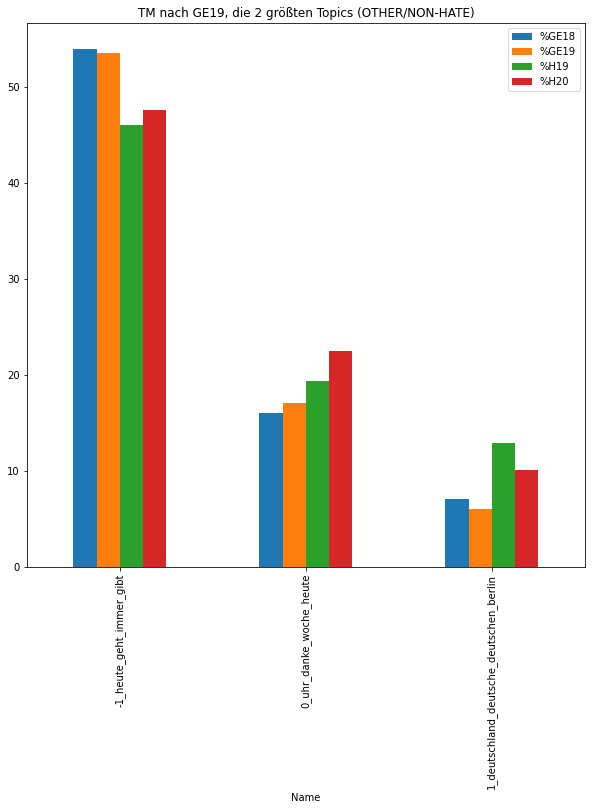

In [ ]:
train_ge19_df_OTHER_percent_plt[0:3].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE19, die 2 größten Topics (OTHER/NON-HATE)")

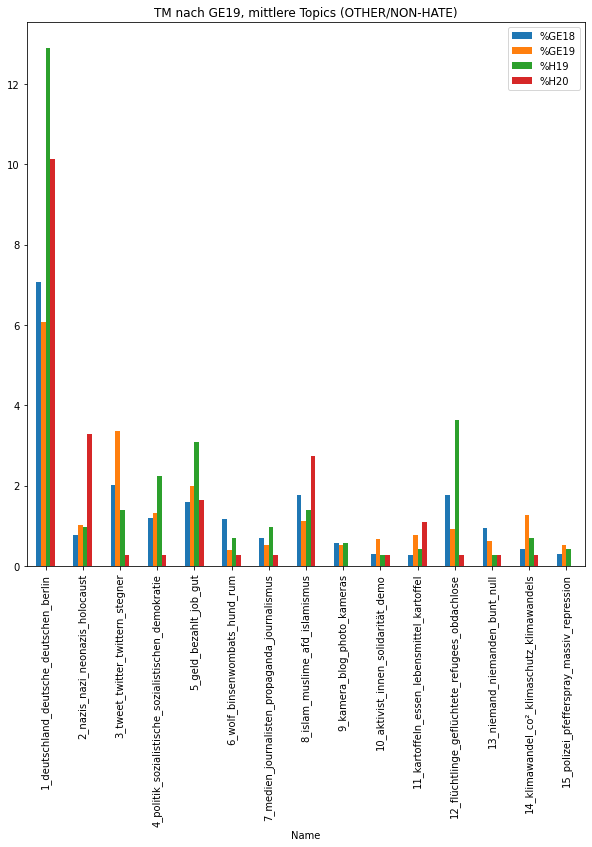

In [ ]:
train_ge19_df_OTHER_percent_plt[2:17].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE19, mittlere Topics (OTHER/NON-HATE)")

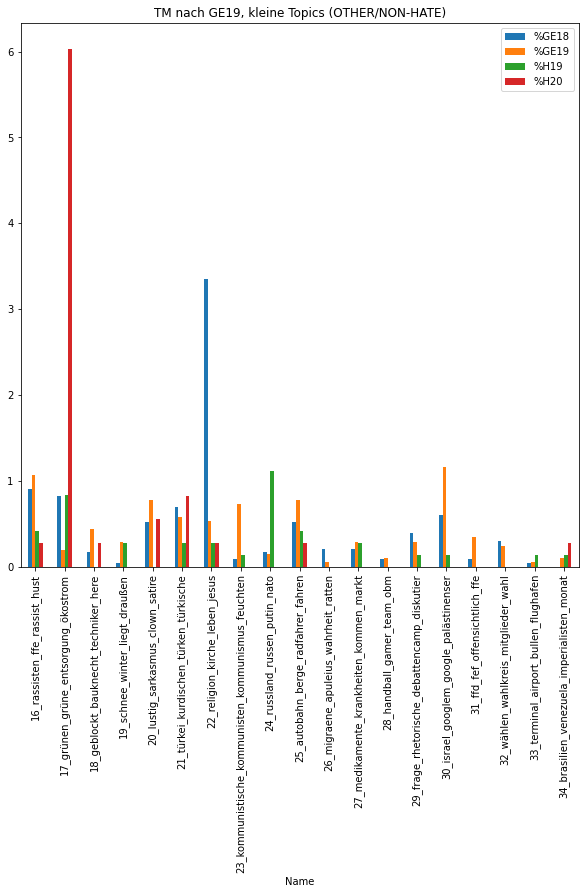

In [ ]:
train_ge19_df_OTHER_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE19, kleine Topics (OTHER/NON-HATE)")



In [ ]:
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  55.07  57.73  56.62  54.04   
1       0  12.23  11.96   3.68  15.53   
2       1   8.49   6.70  12.50   8.70   
3       2   1.00   2.68   2.94   1.24   
4       3   0.17   1.34   0.74   0.62   
5       4   0.67   1.13   1.47   0.62   
6       5   1.33   1.55   0.74   1.86   
7       6   2.25   1.24   1.47   4.35   
8       7   1.00   1.44   1.47   0.00   
9       8   6.16   1.55   5.15   1.24   
10      9   0.25   0.41   0.00   0.62   
11     10   0.00   0.41   0.00   0.00   
12     11   0.25   0.62   0.74   3.73   
13     12   2.83   1.86   2.21   1.86   
14     13   0.25   0.31   0.00   0.00   
15     14   0.00   0.31   0.74   0.00   
16     15   0.17   0.82   0.74   0.00   
17     16   1.91   1.65   2.94   0.00   
18     17   2.08   0.93   0.74   3.11   
19     18   0.08   0.10   0.00   0.00   
20     19   0.00   0.31   0.00   0.00   
21     20   0.42   0.62   0.74   0.00   
22     21   0.58   0.10   0.74   0.62   
23     22   1.50   0.41   1.47   0.00   
24     23   0.00   0.62   0.00   0.00   
25     24   0.00   0.10   2.21   1.24   
26     25   0.25   0.31   0.00   0.00   
27     26   0.25   0.00   0.00   0.00   
28     27   0.00   0.10   0.00   0.62   
29     28   0.00   0.10   0.00   0.00   
30     29   0.08   0.10   0.00   0.00   
31     30   0.58   1.55   0.00   0.00   
32     31   0.00   0.62   0.00   0.00   
33     32   0.17   0.31   0.00   0.00   
34     33   0.00   0.00   0.00   0.00   
35     34   0.00   0.00   0.00   0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
train_ge19_df_OFFENSE_percent_plt = df_OFFENSE_percent.set_index('Name')

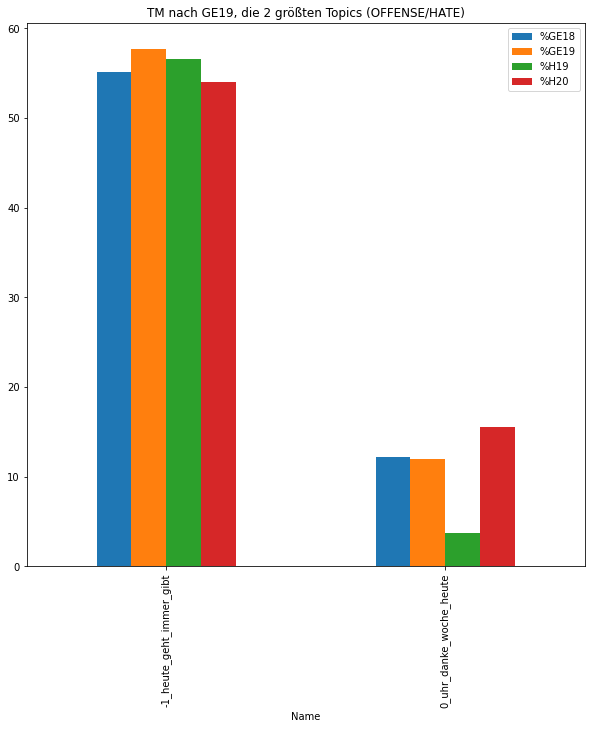

In [ ]:
train_ge19_df_OFFENSE_percent_plt[0:2].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE19, die 2 größten Topics (OFFENSE/HATE)")


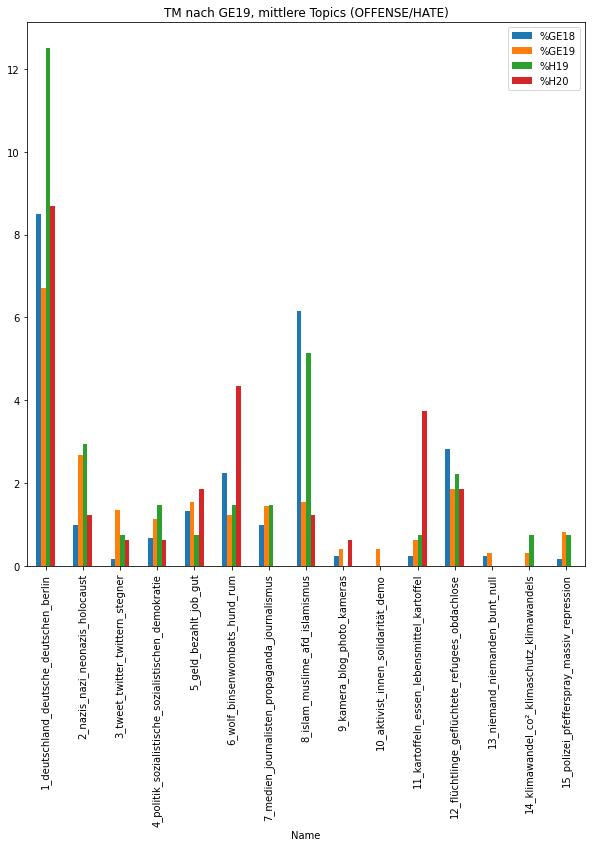

In [ ]:
train_ge19_df_OFFENSE_percent_plt[2:17].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE19, mittlere Topics (OFFENSE/HATE)")


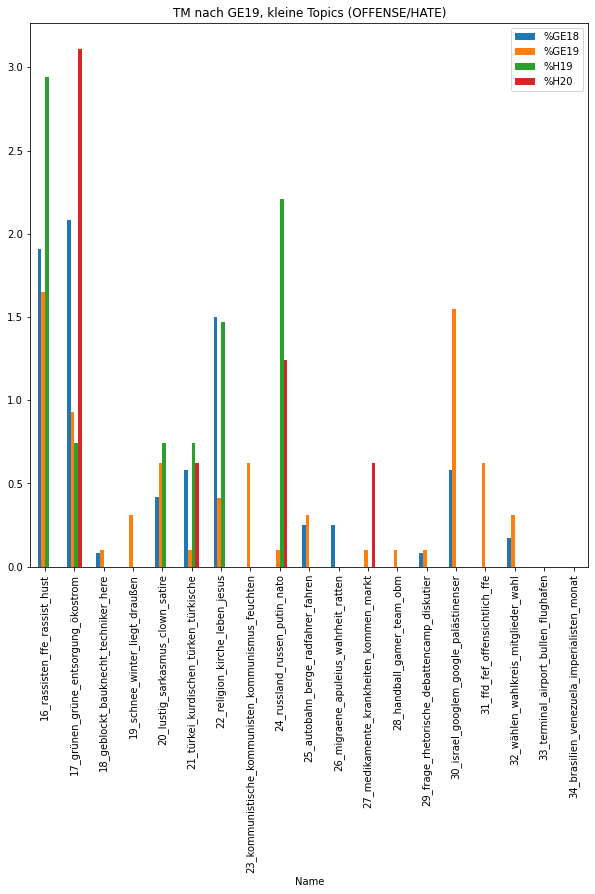

In [ ]:
train_ge19_df_OFFENSE_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE19, kleine Topics (OFFENSE/HATE)")

---------


## Klassifikation HASOCOne, trainiert auf GERMEVAL2019

### Test GE2018

In [ ]:
train_ge19_class_ge18 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2019_GermEval2018.csv.csv')
train_ge19_class_ge18

index_col    task1  index_col.1
0             0    OTHER            0
1             1    OTHER            1
2             2  OFFENSE            2
3             3    OTHER            3
4             4    OTHER            4
...         ...      ...          ...
3527       3527    OTHER         3527
3528       3528    OTHER         3528
3529       3529  OFFENSE         3529
3530       3530    OTHER         3530
3531       3531  OFFENSE         3531

[3532 rows x 3 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_ge19_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
OTHER     2591
OFFENSE    941

In [ ]:
ge18_test_class_values['task1']

OTHER      2591
OFFENSE     941
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_ge19_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER    -1   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     8   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER    -1   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE     1   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER    -1   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

        class  
0       OTHER  
1       OTHER  
2     OFFENSE  
3       OTHER  
4       OTHER  
...       ...  
3527    OTHER  
3528    OTHER  
3529  OFFENSE  
3530    OTHER  
3531  OFFENSE  

[3532 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'OFFENSE')]
ge18_test_true_pos

TWEET      OFF     CAT  \
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
15    @LWaff @UnzufriedenerB |LBR| Laßt doch endlich...  OFFENSE   ABUSE   
16    @heuteshow Besser einen schwarz arbeiten zu la...  OFFENSE   ABUSE   
30    @FobiMania @ManuelaSchwesig @MartinSchulz Ich ...  OFFENSE  INSULT   
35    der Dummschwätzer Herr #Dobrindt gehört nicht ...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3514  wie immer die Moderatorin der @AktuelleStunde ...  OFFENSE  INSULT   
3517  @Alltags_Kotze Dein Feminismus und Genderquats...  OFFENSE   ABUSE   
3519    Feminismus ist der Islamismus der Weiblichkeit.  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred    class  
11      -1  OFFENSE  
15       2  OFFENSE  
16      16  OFFENSE  
30       1  OFFENSE  
35      -1  OFFENSE  
...    ...      ...  
3514    -1  OFFENSE  
3517    -1  OFFENSE  
3519     8  OFFENSE  
3526    11  OFFENSE  
3529     0  OFFENSE  

[601 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1    342  56.905158
 0     76  12.645591
 1     59   9.816972
 8     24   3.993344
 6     18   2.995008
 17    15   2.495840
 12    15   2.495840
 16    10   1.663894
 22     8   1.331115
 2      6   0.998336
 5      5   0.831947
 4      4   0.665557
 21     4   0.665557
 7      3   0.499168
 25     2   0.332779
 20     2   0.332779
 11     2   0.332779
 26     1   0.166389
 32     1   0.166389
 3      1   0.166389
 13     1   0.166389
 29     1   0.166389
 15     1   0.166389

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'OFFENSE')]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
21    @Beatrix_vStorch @c_lindner @nicolabeerfdp Glä...  OTHER  OTHER    -1   
45    Ecken sind nix und Konter werden nicht zu Ende...  OTHER  OTHER    -1   
51    @WlerNr ich mache einen neuen Tweet auf, damit...  OTHER  OTHER     3   
55    @ChristophColla2 @peter_simone @65_jani @jusos...  OTHER  OTHER     1   
...                                                 ...    ...    ...   ...   
3488  @MarcusPretzell Darf @Joerg_Meuthen denn dann ...  OTHER  OTHER     0   
3509  Solange Rüstungslobbyisten wie #Kahrs &amp; #H...  OTHER  OTHER    -1   
3522  Heil dir im Siegerkranz,Herrscher des Vaterlan...  OTHER  OTHER    -1   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

        class  
2     OFFENSE  
21    OFFENSE  
45    OFFENSE  
51    OFFENSE  
55    OFFENSE  
...       ...  
3488  OFFENSE  
3509  OFFENSE  
3522  OFFENSE  
3523  OFFENSE  
3531  OFFENSE  

[340 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1    202  59.411765
 0     42  12.352941
 1     26   7.647059
 22    14   4.117647
 8      8   2.352941
 12     8   2.352941
 6      7   2.058824
 20     4   1.176471
 3      4   1.176471
 17     3   0.882353
 2      3   0.882353
 5      3   0.882353
 4      3   0.882353
 16     2   0.588235
 24     2   0.588235
 14     1   0.294118
 29     1   0.294118
 13     1   0.294118
 11     1   0.294118
 26     1   0.294118
 27     1   0.294118
 7      1   0.294118
 18     1   0.294118
 9      1   0.294118

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'OTHER')]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER    -1   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     8   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER    -1   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1   
6     @Thueringen_ @Miquwarchar @Pontifex_de Man mun...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3518  Wer nur in den Rückspiegel schaut, fährt den K...  OTHER  OTHER    -1   
3520           @gabonn Wer lacht denn da so dreckig ???  OTHER  OTHER    20   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER     0   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER    -1   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   

      class  
0     OTHER  
1     OTHER  
3     OTHER  
5     OTHER  
6     OTHER  
...     ...  
3518  OTHER  
3520  OTHER  
3524  OTHER  
3527  OTHER  
3530  OTHER  

[1990 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1   1056  53.065327
 0    331  16.633166
 1    139   6.984925
 22    64   3.216080
 3     43   2.160804
 5     34   1.708543
 8     33   1.658291
 12    33   1.658291
 4     25   1.256281
 13    21   1.055276
 6     20   1.005025
 16    19   0.954774
 17    16   0.804020
 21    16   0.804020
 7     15   0.753769
 2     15   0.753769
 30    14   0.703518
 25    12   0.603015
 9     12   0.603015
 14     9   0.452261
 20     8   0.402010
 29     8   0.402010
 10     7   0.351759
 15     7   0.351759
 32     7   0.351759
 11     5   0.251256
 27     4   0.201005
 26     4   0.201005
 18     3   0.150754
 28     2   0.100503
 31     2   0.100503
 24     2   0.100503
 23     2   0.100503
 33     1   0.050251
 19     1   0.050251

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'OTHER')]
ge18_test_false_neg

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
17    @elmo31226 @MartinSchulz @Ralf_Stegner Von mir...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3507  Merkel zerstört den bürgerlich-konservativen K...  OFFENSE   ABUSE   
3510  Geht zu jedem Infostand und lacht die Sklaven ...  OFFENSE   ABUSE   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   

      pred  class  
4        1  OTHER  
9       -1  OTHER  
10       0  OTHER  
13      -1  OTHER  
17       0  OTHER  
...    ...    ...  
3507    -1  OTHER  
3510    -1  OTHER  
3521     1  OTHER  
3525    -1  OTHER  
3528    -1  OTHER  

[601 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1    320  53.244592
 0     71  11.813644
 8     50   8.319468
 1     43   7.154742
 12    19   3.161398
 16    13   2.163062
 5     11   1.830283
 17    10   1.663894
 22    10   1.663894
 6      9   1.497504
 7      9   1.497504
 30     7   1.164725
 2      6   0.998336
 4      4   0.665557
 9      3   0.499168
 21     3   0.499168
 20     3   0.499168
 13     2   0.332779
 26     2   0.332779
 15     1   0.166389
 11     1   0.166389
 18     1   0.166389
 25     1   0.166389
 3      1   0.166389
 32     1   0.166389

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


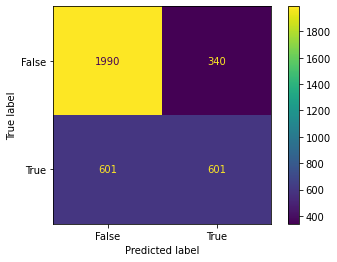

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7335787089467724

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.638682252922423

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.5

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8540772532188842

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.5608959402706486

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7335787089467724, 'Precision': 0.638682252922423, 'Sensitivity_recall': 0.5, 'Specificity': 0.8540772532188842, 'F1_score': 0.5608959402706486}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1    342  56.905158     -1
 0     76  12.645591      0
 1     59   9.816972      1
 8     24   3.993344      8
 6     18   2.995008      6
 17    15   2.495840     17
 12    15   2.495840     12
 16    10   1.663894     16
 22     8   1.331115     22
 2      6   0.998336      2
 5      5   0.831947      5
 4      4   0.665557      4
 21     4   0.665557     21
 7      3   0.499168      7
 25     2   0.332779     25
 20     2   0.332779     20
 11     2   0.332779     11
 26     1   0.166389     26
 32     1   0.166389     32
 3      1   0.166389      3
 13     1   0.166389     13
 29     1   0.166389     29
 15     1   0.166389     15

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1    202  59.411765     -1
 0     42  12.352941      0
 1     26   7.647059      1
 22    14   4.117647     22
 8      8   2.352941      8
 12     8   2.352941     12
 6      7   2.058824      6
 20     4   1.176471     20
 3      4   1.176471      3
 17     3   0.882353     17
 2      3   0.882353      2
 5      3   0.882353      5
 4      3   0.882353      4
 16     2   0.588235     16
 24     2   0.588235     24
 14     1   0.294118     14
 29     1   0.294118     29
 13     1   0.294118     13
 11     1   0.294118     11
 26     1   0.294118     26
 27     1   0.294118     27
 7      1   0.294118      7
 18     1   0.294118     18
 9      1   0.294118      9

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1   1056  53.065327     -1
 0    331  16.633166      0
 1    139   6.984925      1
 22    64   3.216080     22
 3     43   2.160804      3
 5     34   1.708543      5
 8     33   1.658291      8
 12    33   1.658291     12
 4     25   1.256281      4
 13    21   1.055276     13
 6     20   1.005025      6
 16    19   0.954774     16
 17    16   0.804020     17
 21    16   0.804020     21
 7     15   0.753769      7
 2     15   0.753769      2
 30    14   0.703518     30
 25    12   0.603015     25
 9     12   0.603015      9
 14     9   0.452261     14
 20     8   0.402010     20
 29     8   0.402010     29
 10     7   0.351759     10
 15     7   0.351759     15
 32     7   0.351759     32
 11     5   0.251256     11
 27     4   0.201005     27
 26     4   0.201005     26
 18     3   0.150754     18
 28     2   0.100503     28
 31     2   0.100503     31
 24     2   0.100503     24
 23     2   0.100503     23
 33     1   0.050251     33
 19     1   0.050251     19

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1    320  53.244592     -1
 0     71  11.813644      0
 8     50   8.319468      8
 1     43   7.154742      1
 12    19   3.161398     12
 16    13   2.163062     16
 5     11   1.830283      5
 17    10   1.663894     17
 22    10   1.663894     22
 6      9   1.497504      6
 7      9   1.497504      7
 30     7   1.164725     30
 2      6   0.998336      2
 4      4   0.665557      4
 9      3   0.499168      9
 21     3   0.499168     21
 20     3   0.499168     20
 13     2   0.332779     13
 26     2   0.332779     26
 15     1   0.166389     15
 11     1   0.166389     11
 18     1   0.166389     18
 25     1   0.166389     25
 3      1   0.166389      3
 32     1   0.166389     32

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18TP  \
0      -1                           -1_heute_geht_immer_gibt      342.0   
1       0                            0_uhr_danke_woche_heute       76.0   
2       1            1_deutschland_deutsche_deutschen_berlin       59.0   
3       2                    2_nazis_nazi_neonazis_holocaust        6.0   
4       3                   3_tweet_twitter_twittern_stegner        1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        4.0   
6       5                             5_geld_bezahlt_job_gut        5.0   
7       6                      6_wolf_binsenwombats_hund_rum       18.0   
8       7      7_medien_journalisten_propaganda_journalismus        3.0   
9       8                     8_islam_muslime_afd_islamismus       24.0   
10      9                        9_kamera_blog_photo_kameras          0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       15.0   
14     13                     13_niemand_niemanden_bunt_null        1.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression        1.0   
17     16                      16_rassisten_ffe_rassist_hust       10.0   
18     17                17_grünen_grüne_entsorgung_ökostrom       15.0   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire        2.0   
22     21              21_türkei_kurdischen_türken_türkische        4.0   
23     22                     22_religion_kirche_leben_jesus        8.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren        2.0   
27     26               26_migraene_apuleius_wahrheit_ratten        1.0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier        1.0   
31     30             30_israel_googlem_google_palästinenser          0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        1.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     56.91      202.0    59.41     1056.0    53.07      320.0    53.24  
1     12.65       42.0    12.35      331.0    16.63       71.0    11.81  
2      9.82       26.0     7.65      139.0     6.98       43.0     7.15  
3      1.00        3.0     0.88       15.0     0.75        6.0     1.00  
4      0.17        4.0     1.18       43.0     2.16        1.0     0.17  
5      0.67        3.0     0.88       25.0     1.26        4.0     0.67  
6      0.83        3.0     0.88       34.0     1.71       11.0     1.83  
7      3.00        7.0     2.06       20.0     1.01        9.0     1.50  
8      0.50        1.0     0.29       15.0     0.75        9.0     1.50  
9      3.99        8.0     2.35       33.0     1.66       50.0     8.32  
10     0.00        1.0     0.29       12.0     0.60        3.0     0.50  
11     0.00          0     0.00        7.0     0.35          0     0.00  
12     0.33        1.0     0.29        5.0     0.25        1.0     0.17  
13     2.50        8.0     2.35       33.0     1.66       19.0     3.16  
14     0.17        1.0     0.29       21.0     1.06        2.0     0.33  
15     0.00        1.0     0.29        9.0  

In [ ]:
df_merged

Topic                                               Name predGE18TP  \
0      -1                           -1_heute_geht_immer_gibt      342.0   
1       0                            0_uhr_danke_woche_heute       76.0   
2       1            1_deutschland_deutsche_deutschen_berlin       59.0   
3       2                    2_nazis_nazi_neonazis_holocaust        6.0   
4       3                   3_tweet_twitter_twittern_stegner        1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        4.0   
6       5                             5_geld_bezahlt_job_gut        5.0   
7       6                      6_wolf_binsenwombats_hund_rum       18.0   
8       7      7_medien_journalisten_propaganda_journalismus        3.0   
9       8                     8_islam_muslime_afd_islamismus       24.0   
10      9                        9_kamera_blog_photo_kameras          0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       15.0   
14     13                     13_niemand_niemanden_bunt_null        1.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression        1.0   
17     16                      16_rassisten_ffe_rassist_hust       10.0   
18     17                17_grünen_grüne_entsorgung_ökostrom       15.0   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire        2.0   
22     21              21_türkei_kurdischen_türken_türkische        4.0   
23     22                     22_religion_kirche_leben_jesus        8.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren        2.0   
27     26               26_migraene_apuleius_wahrheit_ratten        1.0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier        1.0   
31     30             30_israel_googlem_google_palästinenser          0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        1.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     56.91      202.0    59.41     1056.0    53.07      320.0    53.24  
1     12.65       42.0    12.35      331.0    16.63       71.0    11.81  
2      9.82       26.0     7.65      139.0     6.98       43.0     7.15  
3      1.00        3.0     0.88       15.0     0.75        6.0     1.00  
4      0.17        4.0     1.18       43.0     2.16        1.0     0.17  
5      0.67        3.0     0.88       25.0     1.26        4.0     0.67  
6      0.83        3.0     0.88       34.0     1.71       11.0     1.83  
7      3.00        7.0     2.06       20.0     1.01        9.0     1.50  
8      0.50        1.0     0.29       15.0     0.75        9.0     1.50  
9      3.99        8.0     2.35       33.0     1.66       50.0     8.32  
10     0.00        1.0     0.29       12.0     0.60        3.0     0.50  
11     0.00          0     0.00        7.0     0.35          0     0.00  
12     0.33        1.0     0.29        5.0     0.25        1.0     0.17  
13     2.50        8.0     2.35       33.0     1.66       19.0     3.16  
14     0.17        1.0     0.29       21.0     1.06        2.0     0.33  
15     0.00        1.0     0.29        9.0  

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                               Name  predGE18TP  \
0      -1                           -1_heute_geht_immer_gibt         342   
1       0                            0_uhr_danke_woche_heute          76   
2       1            1_deutschland_deutsche_deutschen_berlin          59   
3       2                    2_nazis_nazi_neonazis_holocaust           6   
4       3                   3_tweet_twitter_twittern_stegner           1   
5       4  4_politik_sozialistische_sozialistischen_demok...           4   
6       5                             5_geld_bezahlt_job_gut           5   
7       6                      6_wolf_binsenwombats_hund_rum          18   
8       7      7_medien_journalisten_propaganda_journalismus           3   
9       8                     8_islam_muslime_afd_islamismus          24   
10      9                        9_kamera_blog_photo_kameras           0   
11     10                 10_aktivist_innen_solidarität_demo           0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel           2   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose          15   
14     13                     13_niemand_niemanden_bunt_null           1   
15     14        14_klimawandel_co²_klimaschutz_klimawandels           0   
16     15          15_polizei_pfefferspray_massiv_repression           1   
17     16                      16_rassisten_ffe_rassist_hust          10   
18     17                17_grünen_grüne_entsorgung_ökostrom          15   
19     18               18_geblockt_bauknecht_techniker_here           0   
20     19                     19_schnee_winter_liegt_draußen           0   
21     20                   20_lustig_sarkasmus_clown_satire           2   
22     21              21_türkei_kurdischen_türken_türkische           4   
23     22                     22_religion_kirche_leben_jesus           8   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...           0   
25     24                      24_russland_russen_putin_nato           0   
26     25                 25_autobahn_berge_radfahrer_fahren           2   
27     26               26_migraene_apuleius_wahrheit_ratten           1   
28     27            27_medikamente_krankheiten_kommen_markt           0   
29     28                         28_handball_gamer_team_obm           0   
30     29        29_frage_rhetorische_debattencamp_diskutier           1   
31     30             30_israel_googlem_google_palästinenser           0   
32     31                      31_ffd_fef_offensichtlich_ffe           0   
33     32                32_wählen_wahlkreis_mitglieder_wahl           1   
34     33               33_terminal_airport_bullen_flughafen           0   
35     34         34_brasilien_venezuela_imperialisten_monat           0   

    %GE18TP  predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0     56.91         202    59.41        1056    53.07         320    53.24  
1     12.65          42    12.35         331    16.63          71    11.81  
2      9.82          26     7.65         139     6.98          43     7.15  
3      1.00           3     0.88          15     0.75           6     1.00  
4      0.17           4     1.18          43     2.16           1     0.17  
5      0.67           3     0.88          25     1.26           4     0.67  
6      0.83           3     0.88          34     1.71          11     1.83  
7      3.00           7     2.06          20     1.01           9     1.50  
8      0.50           1     0.29          15     0.75           9     1.50  
9      3.99           8     2.35          33     1.66          50     8.32  
10     0.00           1     0.29          12     0.60           3     0.50  
11     0.00           0     0.00           7     0.35           0     0.00  
12     0.33           1     0.29           5     0.25           1     0.17  
13     2.50           8     2.35          33     1.66          19     3.16  
14     0.17           1     0.29    

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0      -1    56.91    53.07    59.41    53.24   
1       0    12.65    16.63    12.35    11.81   
2       1     9.82     6.98     7.65     7.15   
3       2     1.00     0.75     0.88     1.00   
4       3     0.17     2.16     1.18     0.17   
5       4     0.67     1.26     0.88     0.67   
6       5     0.83     1.71     0.88     1.83   
7       6     3.00     1.01     2.06     1.50   
8       7     0.50     0.75     0.29     1.50   
9       8     3.99     1.66     2.35     8.32   
10      9     0.00     0.60     0.29     0.50   
11     10     0.00     0.35     0.00     0.00   
12     11     0.33     0.25     0.29     0.17   
13     12     2.50     1.66     2.35     3.16   
14     13     0.17     1.06     0.29     0.33   
15     14     0.00     0.45     0.29     0.00   
16     15     0.17     0.35     0.00     0.17   
17     16     1.66     0.95     0.59     2.16   
18     17     2.50     0.80     0.88     1.66   
19     18     0.00     0.15     0.29     0.17   
20     19     0.00     0.05     0.00     0.00   
21     20     0.33     0.40     1.18     0.50   
22     21     0.67     0.80     0.00     0.50   
23     22     1.33     3.22     4.12     1.66   
24     23     0.00     0.10     0.00     0.00   
25     24     0.00     0.10     0.59     0.00   
26     25     0.33     0.60     0.00     0.17   
27     26     0.17     0.20     0.29     0.33   
28     27     0.00     0.20     0.29     0.00   
29     28     0.00     0.10     0.00     0.00   
30     29     0.17     0.40     0.29     0.00   
31     30     0.00     0.70     0.00     1.16   
32     31     0.00     0.10     0.00     0.00   
33     32     0.17     0.35     0.00     0.17   
34     33     0.00     0.05     0.00     0.00   
35     34     0.00     0.00     0.00     0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

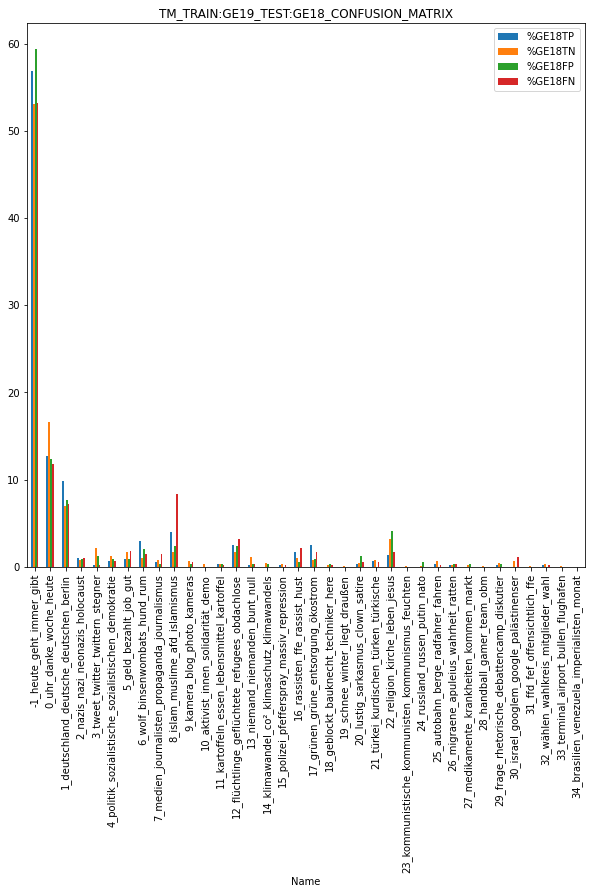

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

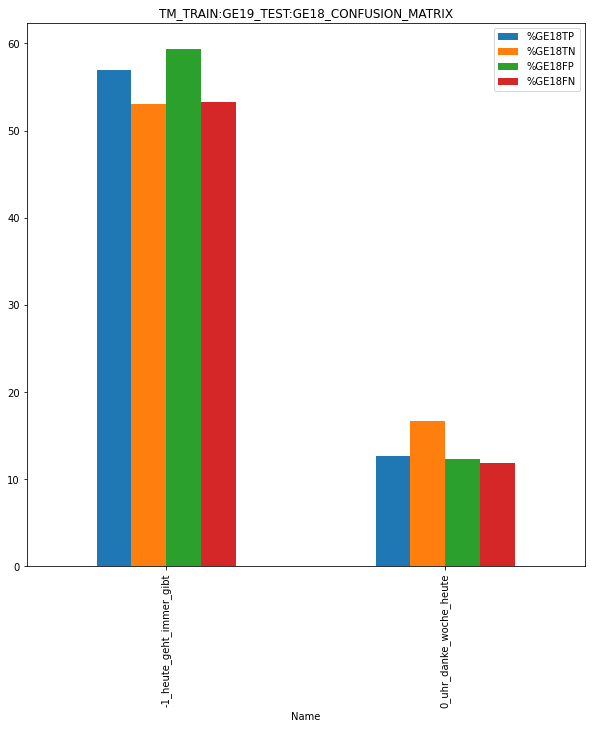

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

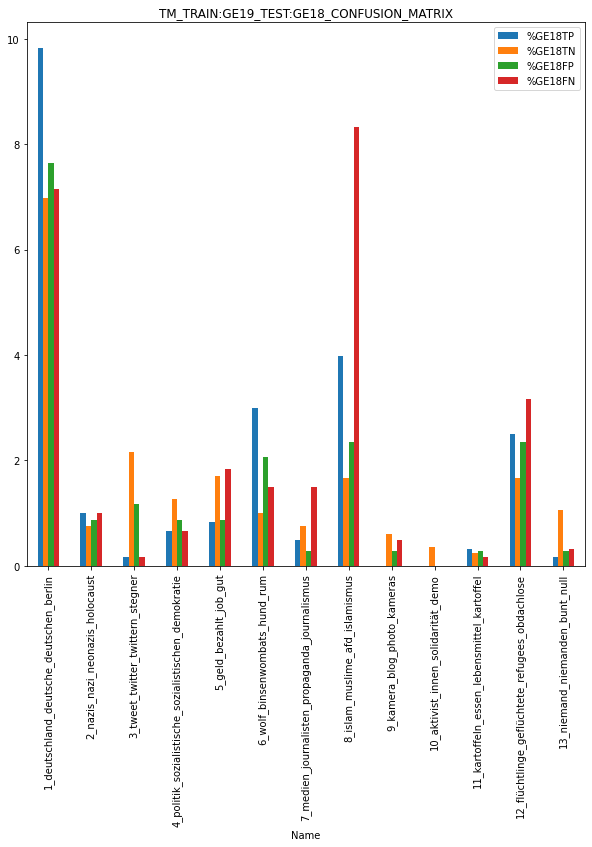

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

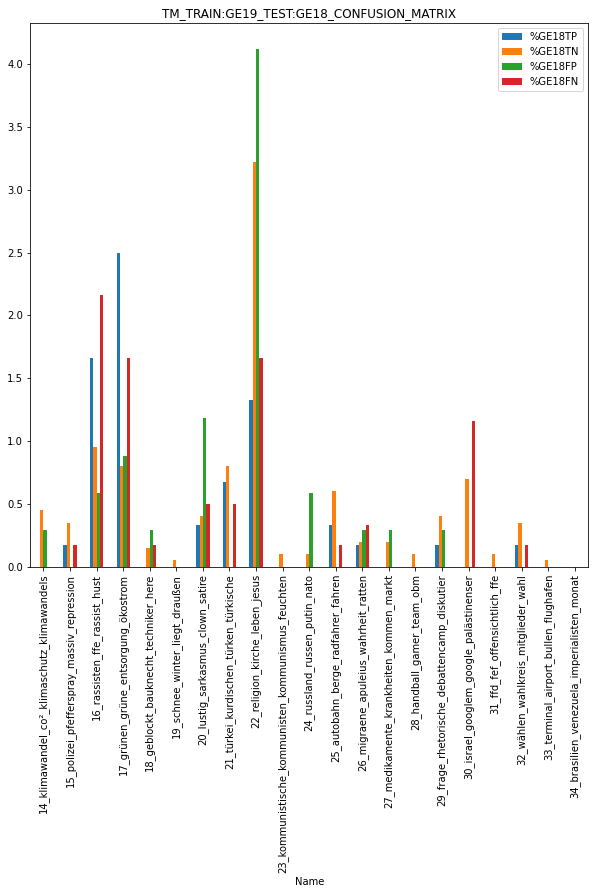

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_ge19_class_ge19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2019.csv')
train_ge19_class_ge19

index_col    task1  index_col.1
0             0    OTHER            0
1             1  OFFENSE            1
2             2    OTHER            2
3             3    OTHER            3
4             4  OFFENSE            4
...         ...      ...          ...
3026       3026    OTHER         3026
3027       3027    OTHER         3027
3028       3028    OTHER         3028
3029       3029    OTHER         3029
3030       3030    OTHER         3030

[3031 rows x 3 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_ge19_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
OTHER     2061
OFFENSE    970

In [ ]:

ge19_test_raw['class'] = train_ge19_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred    class  
0       -1    OTHER  
1       -1  OFFENSE  
2       22    OTHER  
3       -1    OTHER  
4       -1  OFFENSE  
...    ...      ...  
3026    21    OTHER  
3027    -1    OTHER  
3028    -1    OTHER  
3029    -1    OTHER  
3030     0    OTHER  

[3031 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'OFFENSE')]
ge19_test_true_pos

TWEET      OFF     CAT  \
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
10    @rbbabendschau Nun, Eigentum verpflichtet, das...  OFFENSE   ABUSE   
11    @ZDFheute Birmingham hatte eine ganz andere Kl...  OFFENSE   ABUSE   
14    @focusonline Wie war noch der Stasi Auftrag vo...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
2886  Ich kann nachvollziehen dass seriöse Medien ka...  OFFENSE  INSULT   
2887  Sogenannte Aktivisten würden sich selbst im Pa...  OFFENSE   ABUSE   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE  INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE  INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE  INSULT   

      pred    class  
1       -1  OFFENSE  
4       -1  OFFENSE  
10       0  OFFENSE  
11      -1  OFFENSE  
14      -1  OFFENSE  
...    ...      ...  
2886    -1  OFFENSE  
2887    -1  OFFENSE  
2888    10  OFFENSE  
2976    -1  OFFENSE  
2978    -1  OFFENSE  

[597 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1    351  58.793970
 0     60  10.050251
 1     48   8.040201
 2     18   3.015075
 16    11   1.842546
 30    11   1.842546
 12    10   1.675042
 6      9   1.507538
 3      8   1.340034
 17     8   1.340034
 5      8   1.340034
 7      7   1.172529
 15     6   1.005025
 8      6   1.005025
 4      5   0.837521
 20     4   0.670017
 11     4   0.670017
 14     3   0.502513
 10     3   0.502513
 32     2   0.335008
 23     2   0.335008
 13     2   0.335008
 9      2   0.335008
 25     2   0.335008
 19     2   0.335008
 18     1   0.167504
 22     1   0.167504
 27     1   0.167504
 28     1   0.167504
 29     1   0.167504

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'OFFENSE')]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    25   
96    @mopo Hier die echten 10 Gründe 1.Nahles 2.Nah...  OTHER  OTHER    -1   
97    @bzberlin Klar dass dies den linken Missfällt....  OTHER  OTHER    18   
112   @SPIEGELONLINE Mann kann es nicht mehr hören s...  OTHER  OTHER    -1   
118   Hammer-Umfrage: AfD bundesweit auf Platz zwei ...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
2986  @Adam_Aioak @AhmadMansour__ Aber was die ander...  OTHER  OTHER    -1   
2993  @HasnainKazim Jetzt musst du uns schon sagen w...  OTHER  OTHER    -1   
3007  Dazu kommt der Terror gegen Afrin aber RTE Ter...  OTHER  OTHER    30   
3009  @realJohr Pariser Frauen sind nur im Regen sch...  OTHER  OTHER    -1   
3016  @nouripour @Twinnz4you @HeikoMaas Setzt ein Kr...  OTHER  OTHER     0   

        class  
12    OFFENSE  
96    OFFENSE  
97    OFFENSE  
112   OFFENSE  
118   OFFENSE  
...       ...  
2986  OFFENSE  
2993  OFFENSE  
3007  OFFENSE  
3009  OFFENSE  
3016  OFFENSE  

[373 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1    202  54.155496
 0     46  12.332440
 1     30   8.042895
 30     9   2.412869
 12     8   2.144772
 4      7   1.876676
 11     7   1.876676
 16     6   1.608579
 8      6   1.608579
 13     5   1.340483
 6      5   1.340483
 15     4   1.072386
 3      4   1.072386
 2      4   1.072386
 7      4   1.072386
 22     4   1.072386
 25     3   0.804290
 5      3   0.804290
 14     3   0.804290
 20     2   0.536193
 24     2   0.536193
 31     1   0.268097
 27     1   0.268097
 21     1   0.268097
 23     1   0.268097
 18     1   0.268097
 19     1   0.268097
 10     1   0.268097
 9      1   0.268097
 17     1   0.268097

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'OTHER')]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER    22   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    -1   
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER    -1   
30    @faznet In England, Birmingham war mehr Täter,...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER    21   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER     0   

      class  
2     OTHER  
5     OTHER  
6     OTHER  
25    OTHER  
30    OTHER  
...     ...  
3026  OTHER  
3027  OTHER  
3028  OTHER  
3029  OTHER  
3030  OTHER  

[1688 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1    903  53.495261
 0    307  18.187204
 1     95   5.627962
 3     65   3.850711
 5     38   2.251185
 14    23   1.362559
 4     20   1.184834
 8     17   1.007109
 2     17   1.007109
 16    16   0.947867
 30    15   0.888626
 23    14   0.829384
 20    14   0.829384
 25    13   0.770142
 10    13   0.770142
 12    11   0.651659
 21    11   0.651659
 9     10   0.592417
 11     9   0.533175
 18     8   0.473934
 13     8   0.473934
 15     7   0.414692
 7      7   0.414692
 22     7   0.414692
 29     6   0.355450
 31     6   0.355450
 27     5   0.296209
 19     5   0.296209
 32     5   0.296209
 6      3   0.177725
 17     3   0.177725
 28     2   0.118483
 34     2   0.118483
 33     1   0.059242
 26     1   0.059242
 24     1   0.059242

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'OTHER')]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE      ABUSE   
9     @investigativ_de @welt @Tim_Roehn @ChSchweppe ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2880  Integration ist komplett schief gelaufen, aber...  OFFENSE     INSULT   
2885  Ob Erdogan nun hier ist oder nicht, der erste ...  OFFENSE      ABUSE   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  class  
0       -1  OTHER  
3       -1  OTHER  
7       -1  OTHER  
8       -1  OTHER  
9        4  OTHER  
...    ...    ...  
2880    -1  OTHER  
2885    -1  OTHER  
2889    -1  OTHER  
2949    21  OTHER  
2988     8  OTHER  

[373 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1    209  56.032172
 0     56  15.013405
 1     17   4.557641
 8      9   2.412869
 12     8   2.144772
 2      8   2.144772
 5      7   1.876676
 7      7   1.876676
 4      6   1.608579
 31     6   1.608579
 3      5   1.340483
 16     5   1.340483
 30     4   1.072386
 23     4   1.072386
 6      3   0.804290
 22     3   0.804290
 15     2   0.536193
 9      2   0.536193
 20     2   0.536193
 11     2   0.536193
 19     1   0.268097
 32     1   0.268097
 24     1   0.268097
 25     1   0.268097
 13     1   0.268097
 17     1   0.268097
 10     1   0.268097
 21     1   0.268097

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


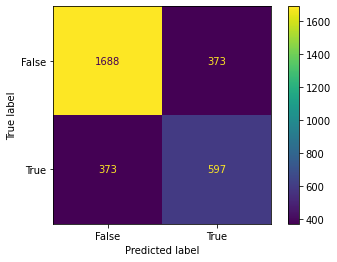

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7538766083800725

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6154639175257732

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.6154639175257732

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8190198932557011

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.6154639175257732

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7538766083800725, 'Precision': 0.6154639175257732, 'Sensitivity_recall': 0.6154639175257732, 'Specificity': 0.8190198932557011, 'F1_score': 0.6154639175257732}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1    351  58.793970     -1
 0     60  10.050251      0
 1     48   8.040201      1
 2     18   3.015075      2
 16    11   1.842546     16
 30    11   1.842546     30
 12    10   1.675042     12
 6      9   1.507538      6
 3      8   1.340034      3
 17     8   1.340034     17
 5      8   1.340034      5
 7      7   1.172529      7
 15     6   1.005025     15
 8      6   1.005025      8
 4      5   0.837521      4
 20     4   0.670017     20
 11     4   0.670017     11
 14     3   0.502513     14
 10     3   0.502513     10
 32     2   0.335008     32
 23     2   0.335008     23
 13     2   0.335008     13
 9      2   0.335008      9
 25     2   0.335008     25
 19     2   0.335008     19
 18     1   0.167504     18
 22     1   0.167504     22
 27     1   0.167504     27
 28     1   0.167504     28
 29     1   0.167504     29

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1    202  54.155496     -1
 0     46  12.332440      0
 1     30   8.042895      1
 30     9   2.412869     30
 12     8   2.144772     12
 4      7   1.876676      4
 11     7   1.876676     11
 16     6   1.608579     16
 8      6   1.608579      8
 13     5   1.340483     13
 6      5   1.340483      6
 15     4   1.072386     15
 3      4   1.072386      3
 2      4   1.072386      2
 7      4   1.072386      7
 22     4   1.072386     22
 25     3   0.804290     25
 5      3   0.804290      5
 14     3   0.804290     14
 20     2   0.536193     20
 24     2   0.536193     24
 31     1   0.268097     31
 27     1   0.268097     27
 21     1   0.268097     21
 23     1   0.268097     23
 18     1   0.268097     18
 19     1   0.268097     19
 10     1   0.268097     10
 9      1   0.268097      9
 17     1   0.268097     17

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1    903  53.495261     -1
 0    307  18.187204      0
 1     95   5.627962      1
 3     65   3.850711      3
 5     38   2.251185      5
 14    23   1.362559     14
 4     20   1.184834      4
 8     17   1.007109      8
 2     17   1.007109      2
 16    16   0.947867     16
 30    15   0.888626     30
 23    14   0.829384     23
 20    14   0.829384     20
 25    13   0.770142     25
 10    13   0.770142     10
 12    11   0.651659     12
 21    11   0.651659     21
 9     10   0.592417      9
 11     9   0.533175     11
 18     8   0.473934     18
 13     8   0.473934     13
 15     7   0.414692     15
 7      7   0.414692      7
 22     7   0.414692     22
 29     6   0.355450     29
 31     6   0.355450     31
 27     5   0.296209     27
 19     5   0.296209     19
 32     5   0.296209     32
 6      3   0.177725      6
 17     3   0.177725     17
 28     2   0.118483     28
 34     2   0.118483     34
 33     1   0.059242     33
 26     1   0.059242     26
 24     1   0.059242     24

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1    209  56.032172     -1
 0     56  15.013405      0
 1     17   4.557641      1
 8      9   2.412869      8
 12     8   2.144772     12
 2      8   2.144772      2
 5      7   1.876676      5
 7      7   1.876676      7
 4      6   1.608579      4
 31     6   1.608579     31
 3      5   1.340483      3
 16     5   1.340483     16
 30     4   1.072386     30
 23     4   1.072386     23
 6      3   0.804290      6
 22     3   0.804290     22
 15     2   0.536193     15
 9      2   0.536193      9
 20     2   0.536193     20
 11     2   0.536193     11
 19     1   0.268097     19
 32     1   0.268097     32
 24     1   0.268097     24
 25     1   0.268097     25
 13     1   0.268097     13
 17     1   0.268097     17
 10     1   0.268097     10
 21     1   0.268097     21

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE19TP  \
0      -1                           -1_heute_geht_immer_gibt      351.0   
1       0                            0_uhr_danke_woche_heute       60.0   
2       1            1_deutschland_deutsche_deutschen_berlin       48.0   
3       2                    2_nazis_nazi_neonazis_holocaust       18.0   
4       3                   3_tweet_twitter_twittern_stegner        8.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        5.0   
6       5                             5_geld_bezahlt_job_gut        8.0   
7       6                      6_wolf_binsenwombats_hund_rum        9.0   
8       7      7_medien_journalisten_propaganda_journalismus        7.0   
9       8                     8_islam_muslime_afd_islamismus        6.0   
10      9                        9_kamera_blog_photo_kameras        2.0   
11     10                 10_aktivist_innen_solidarität_demo        3.0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        4.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       10.0   
14     13                     13_niemand_niemanden_bunt_null        2.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        3.0   
16     15          15_polizei_pfefferspray_massiv_repression        6.0   
17     16                      16_rassisten_ffe_rassist_hust       11.0   
18     17                17_grünen_grüne_entsorgung_ökostrom        8.0   
19     18               18_geblockt_bauknecht_techniker_here        1.0   
20     19                     19_schnee_winter_liegt_draußen        2.0   
21     20                   20_lustig_sarkasmus_clown_satire        4.0   
22     21              21_türkei_kurdischen_türken_türkische          0   
23     22                     22_religion_kirche_leben_jesus        1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...        2.0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren        2.0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt        1.0   
29     28                         28_handball_gamer_team_obm        1.0   
30     29        29_frage_rhetorische_debattencamp_diskutier        1.0   
31     30             30_israel_googlem_google_palästinenser       11.0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        2.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE19TP predGE19FP  %GE19FP  predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     58.79      202.0    54.16         903    53.50      209.0    56.03  
1     10.05       46.0    12.33         307    18.19       56.0    15.01  
2      8.04       30.0     8.04          95     5.63       17.0     4.56  
3      3.02        4.0     1.07          17     1.01        8.0     2.14  
4      1.34        4.0     1.07          65     3.85        5.0     1.34  
5      0.84        7.0     1.88          20     1.18        6.0     1.61  
6      1.34        3.0     0.80          38     2.25        7.0     1.88  
7      1.51        5.0     1.34           3     0.18        3.0     0.80  
8      1.17        4.0     1.07           7     0.41        7.0     1.88  
9      1.01        6.0     1.61          17     1.01        9.0     2.41  
10     0.34        1.0     0.27          10     0.59        2.0     0.54  
11     0.50        1.0     0.27          13     0.77        1.0     0.27  
12     0.67        7.0     1.88           9     0.53        2.0     0.54  
13     1.68        8.0     2.14          11     0.65        8.0     2.14  
14     0.34        5.0     1.34           8     0.47        1.0     0.27  
15     0.50        3.0     0

In [ ]:
df_merged

Topic                                               Name predGE19TP  \
0      -1                           -1_heute_geht_immer_gibt      351.0   
1       0                            0_uhr_danke_woche_heute       60.0   
2       1            1_deutschland_deutsche_deutschen_berlin       48.0   
3       2                    2_nazis_nazi_neonazis_holocaust       18.0   
4       3                   3_tweet_twitter_twittern_stegner        8.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        5.0   
6       5                             5_geld_bezahlt_job_gut        8.0   
7       6                      6_wolf_binsenwombats_hund_rum        9.0   
8       7      7_medien_journalisten_propaganda_journalismus        7.0   
9       8                     8_islam_muslime_afd_islamismus        6.0   
10      9                        9_kamera_blog_photo_kameras        2.0   
11     10                 10_aktivist_innen_solidarität_demo        3.0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        4.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       10.0   
14     13                     13_niemand_niemanden_bunt_null        2.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        3.0   
16     15          15_polizei_pfefferspray_massiv_repression        6.0   
17     16                      16_rassisten_ffe_rassist_hust       11.0   
18     17                17_grünen_grüne_entsorgung_ökostrom        8.0   
19     18               18_geblockt_bauknecht_techniker_here        1.0   
20     19                     19_schnee_winter_liegt_draußen        2.0   
21     20                   20_lustig_sarkasmus_clown_satire        4.0   
22     21              21_türkei_kurdischen_türken_türkische          0   
23     22                     22_religion_kirche_leben_jesus        1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...        2.0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren        2.0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt        1.0   
29     28                         28_handball_gamer_team_obm        1.0   
30     29        29_frage_rhetorische_debattencamp_diskutier        1.0   
31     30             30_israel_googlem_google_palästinenser       11.0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        2.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE19TP predGE19FP  %GE19FP  predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     58.79      202.0    54.16         903    53.50      209.0    56.03  
1     10.05       46.0    12.33         307    18.19       56.0    15.01  
2      8.04       30.0     8.04          95     5.63       17.0     4.56  
3      3.02        4.0     1.07          17     1.01        8.0     2.14  
4      1.34        4.0     1.07          65     3.85        5.0     1.34  
5      0.84        7.0     1.88          20     1.18        6.0     1.61  
6      1.34        3.0     0.80          38     2.25        7.0     1.88  
7      1.51        5.0     1.34           3     0.18        3.0     0.80  
8      1.17        4.0     1.07           7     0.41        7.0     1.88  
9      1.01        6.0     1.61          17     1.01        9.0     2.41  
10     0.34        1.0     0.27          10     0.59        2.0     0.54  
11     0.50        1.0     0.27          13     0.77        1.0     0.27  
12     0.67        7.0     1.88           9     0.53        2.0     0.54  
13     1.68        8.0     2.14          11     0.65        8.0     2.14  
14     0.34        5.0     1.34           8     0.47        1.0     0.27  
15     0.50        3.0     0

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                               Name  predGE19TP  \
0      -1                           -1_heute_geht_immer_gibt         351   
1       0                            0_uhr_danke_woche_heute          60   
2       1            1_deutschland_deutsche_deutschen_berlin          48   
3       2                    2_nazis_nazi_neonazis_holocaust          18   
4       3                   3_tweet_twitter_twittern_stegner           8   
5       4  4_politik_sozialistische_sozialistischen_demok...           5   
6       5                             5_geld_bezahlt_job_gut           8   
7       6                      6_wolf_binsenwombats_hund_rum           9   
8       7      7_medien_journalisten_propaganda_journalismus           7   
9       8                     8_islam_muslime_afd_islamismus           6   
10      9                        9_kamera_blog_photo_kameras           2   
11     10                 10_aktivist_innen_solidarität_demo           3   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel           4   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose          10   
14     13                     13_niemand_niemanden_bunt_null           2   
15     14        14_klimawandel_co²_klimaschutz_klimawandels           3   
16     15          15_polizei_pfefferspray_massiv_repression           6   
17     16                      16_rassisten_ffe_rassist_hust          11   
18     17                17_grünen_grüne_entsorgung_ökostrom           8   
19     18               18_geblockt_bauknecht_techniker_here           1   
20     19                     19_schnee_winter_liegt_draußen           2   
21     20                   20_lustig_sarkasmus_clown_satire           4   
22     21              21_türkei_kurdischen_türken_türkische           0   
23     22                     22_religion_kirche_leben_jesus           1   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...           2   
25     24                      24_russland_russen_putin_nato           0   
26     25                 25_autobahn_berge_radfahrer_fahren           2   
27     26               26_migraene_apuleius_wahrheit_ratten           0   
28     27            27_medikamente_krankheiten_kommen_markt           1   
29     28                         28_handball_gamer_team_obm           1   
30     29        29_frage_rhetorische_debattencamp_diskutier           1   
31     30             30_israel_googlem_google_palästinenser          11   
32     31                      31_ffd_fef_offensichtlich_ffe           0   
33     32                32_wählen_wahlkreis_mitglieder_wahl           2   
34     33               33_terminal_airport_bullen_flughafen           0   
35     34         34_brasilien_venezuela_imperialisten_monat           0   

    %GE19TP  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0     58.79         202    54.16         903    53.50         209    56.03  
1     10.05          46    12.33         307    18.19          56    15.01  
2      8.04          30     8.04          95     5.63          17     4.56  
3      3.02           4     1.07          17     1.01           8     2.14  
4      1.34           4     1.07          65     3.85           5     1.34  
5      0.84           7     1.88          20     1.18           6     1.61  
6      1.34           3     0.80          38     2.25           7     1.88  
7      1.51           5     1.34           3     0.18           3     0.80  
8      1.17           4     1.07           7     0.41           7     1.88  
9      1.01           6     1.61          17     1.01           9     2.41  
10     0.34           1     0.27          10     0.59           2     0.54  
11     0.50           1     0.27          13     0.77           1     0.27  
12     0.67           7     1.88           9     0.53           2     0.54  
13     1.68           8     2.14          11     0.65           8     2.14  
14     0.34           5     1.34    

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0      -1    58.79    53.50    54.16    56.03   
1       0    10.05    18.19    12.33    15.01   
2       1     8.04     5.63     8.04     4.56   
3       2     3.02     1.01     1.07     2.14   
4       3     1.34     3.85     1.07     1.34   
5       4     0.84     1.18     1.88     1.61   
6       5     1.34     2.25     0.80     1.88   
7       6     1.51     0.18     1.34     0.80   
8       7     1.17     0.41     1.07     1.88   
9       8     1.01     1.01     1.61     2.41   
10      9     0.34     0.59     0.27     0.54   
11     10     0.50     0.77     0.27     0.27   
12     11     0.67     0.53     1.88     0.54   
13     12     1.68     0.65     2.14     2.14   
14     13     0.34     0.47     1.34     0.27   
15     14     0.50     1.36     0.80     0.00   
16     15     1.01     0.41     1.07     0.54   
17     16     1.84     0.95     1.61     1.34   
18     17     1.34     0.18     0.27     0.27   
19     18     0.17     0.47     0.27     0.00   
20     19     0.34     0.30     0.27     0.27   
21     20     0.67     0.83     0.54     0.54   
22     21     0.00     0.65     0.27     0.27   
23     22     0.17     0.41     1.07     0.80   
24     23     0.34     0.83     0.27     1.07   
25     24     0.00     0.06     0.54     0.27   
26     25     0.34     0.77     0.80     0.27   
27     26     0.00     0.06     0.00     0.00   
28     27     0.17     0.30     0.27     0.00   
29     28     0.17     0.12     0.00     0.00   
30     29     0.17     0.36     0.00     0.00   
31     30     1.84     0.89     2.41     1.07   
32     31     0.00     0.36     0.27     1.61   
33     32     0.34     0.30     0.00     0.27   
34     33     0.00     0.06     0.00     0.00   
35     34     0.00     0.12     0.00     0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

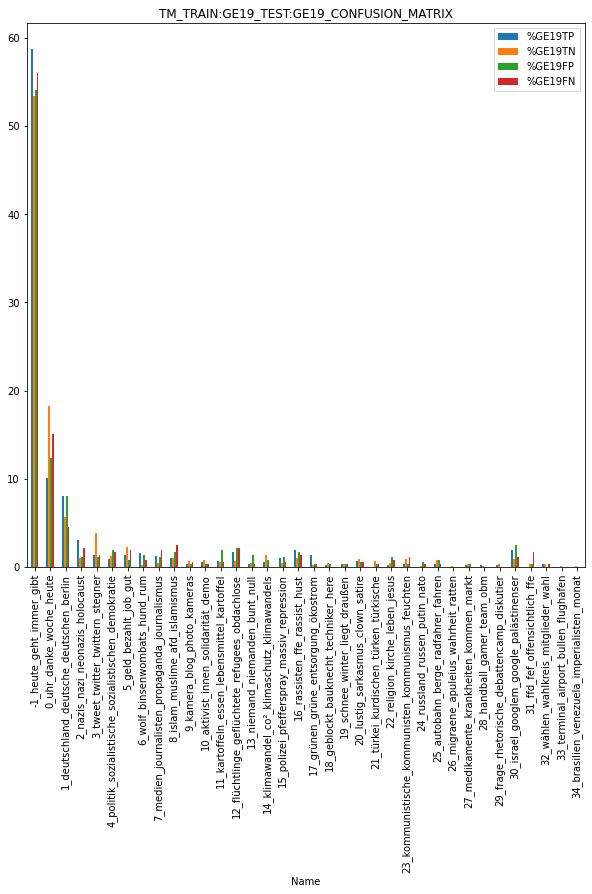

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

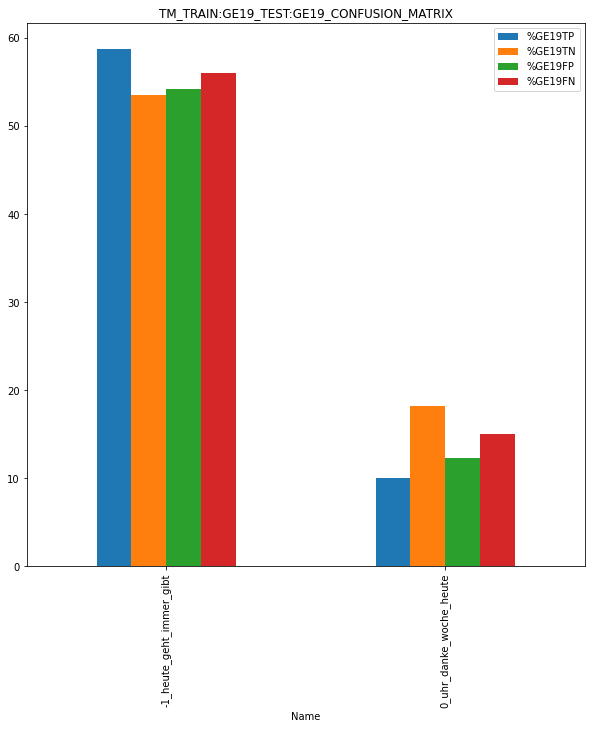

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

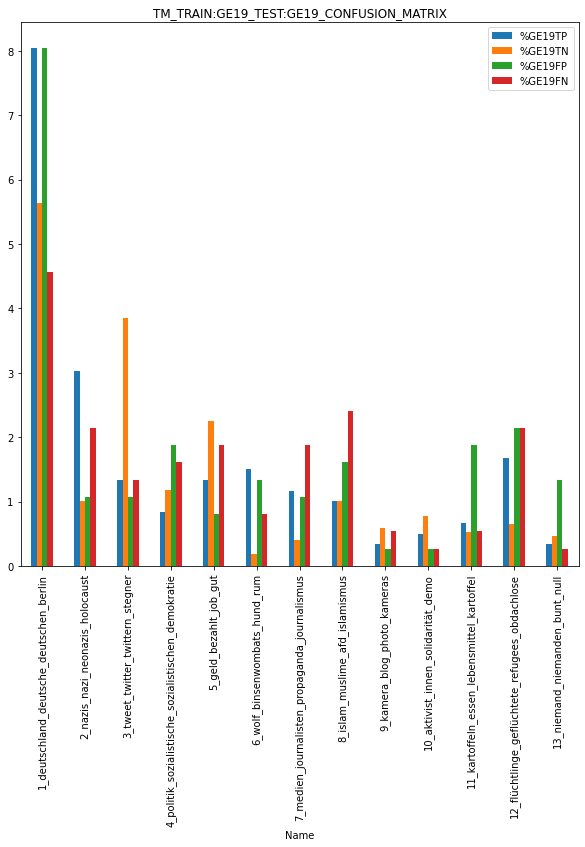

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

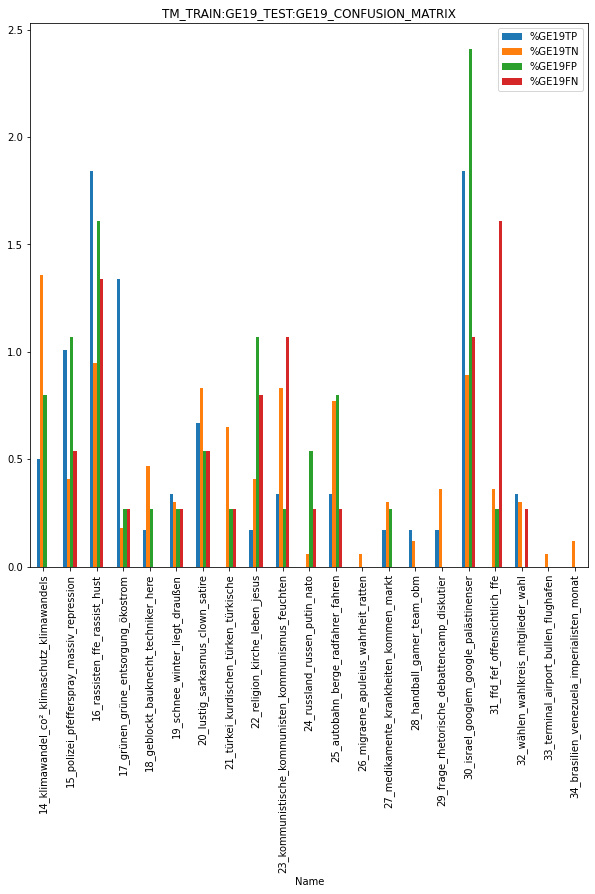

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_ge19_class_h19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2019_HASOC2019.csv')
train_ge19_class_h19

index_col    task1  index_col.1
0            0  OFFENSE            0
1            1    OTHER            1
2            2    OTHER            2
3            3  OFFENSE            3
4            4  OFFENSE            4
..         ...      ...          ...
845        845  OFFENSE          845
846        846  OFFENSE          846
847        847    OTHER          847
848        848    OTHER          848
849        849  OFFENSE          849

[850 rows x 3 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_ge19_class_h19['task1'].value_counts())
h19_test_class_values

task1
OTHER      586
OFFENSE    264

In [ ]:

h19_test_raw['class'] = train_ge19_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred    class  
0     HATE    -1  OFFENSE  
1     NONE     1    OTHER  
2     NONE     0    OTHER  
3     OFFN    -1  OFFENSE  
4     OFFN    -1  OFFENSE  
..     ...   ...      ...  
845   OFFN    -1  OFFENSE  
846   OFFN    11  OFFENSE  
847   OFFN    -1    OTHER  
848   OFFN    -1    OTHER  
849   NONE     0  OFFENSE  

[850 rows x 6 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'OFFENSE')]
h19_test_true_pos

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
..             ...                                                ...    ...   
842  hasoc_de_6112  Das hoffen wir alle – zumindest die GUTEN unte...    HOF   
843  hasoc_de_6113  Besser ein #echter #Komiker als #Führungsspitz...    HOF   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   

    task_2  pred    class  
0     HATE    -1  OFFENSE  
3     OFFN    -1  OFFENSE  
4     OFFN    -1  OFFENSE  
6     OFFN    16  OFFENSE  
41    HATE    -1  OFFENSE  
..     ...   ...      ...  
842   OFFN     0  OFFENSE  
843   OFFN    20  OFFENSE  
844   OFFN    -1  OFFENSE  
845   OFFN    -1  OFFENSE  
846   OFFN    11  OFFENSE  

[71 rows x 6 columns]

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1     41  57.746479
 1     11  15.492958
 2      3   4.225352
 0      3   4.225352
 16     2   2.816901
 8      2   2.816901
 4      2   2.816901
 6      2   2.816901
 22     1   1.408451
 7      1   1.408451
 3      1   1.408451
 20     1   1.408451
 11     1   1.408451

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'OFFENSE')]
h19_test_false_pos

text_id                                               text task_1  \
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
13   hasoc_de_5283  @EUDebate wir haben die Flüchtlinge nicht geru...    NOT   
26   hasoc_de_5296  Das immer der kleinste,die größte Schnauze hat...    NOT   
27   hasoc_de_5297  Unserer   eigenen Überlegungen nachgehen,auf u...    NOT   
30   hasoc_de_5300  Wieso ist eigentlich die Bevölkerungsschicht n...    NOT   
..             ...                                                ...    ...   
777  hasoc_de_6047  Wenn du glaubst, es könnte nicht mehr schlimme...    NOT   
792  hasoc_de_6062  Toller Kommentar.  Merkel hat das Land 14 Jahr...    NOT   
811  hasoc_de_6081  Der merkt wohl gar nicht, dass er selbst hinte...    NOT   
836  hasoc_de_6106  @Uwe_Junge_MdL Ach Junge, hast Du Angst, dass ...    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred    class  
7     NONE     0  OFFENSE  
13    NONE    12  OFFENSE  
26    NONE     6  OFFENSE  
27    NONE    -1  OFFENSE  
30    NONE     5  OFFENSE  
..     ...   ...      ...  
777   NONE    -1  OFFENSE  
792   NONE     1  OFFENSE  
811   NONE     8  OFFENSE  
836   NONE     8  OFFENSE  
849   NONE     0  OFFENSE  

[193 rows x 6 columns]

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1    110  56.994819
 0     26  13.471503
 1     13   6.735751
 12     9   4.663212
 5      5   2.590674
 4      5   2.590674
 2      5   2.590674
 8      5   2.590674
 6      4   2.072539
 17     3   1.554404
 24     2   1.036269
 7      2   1.036269
 14     1   0.518135
 10     1   0.518135
 3      1   0.518135
 22     1   0.518135

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'OTHER')]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
10   hasoc_de_5280  Eben auf ZDF  Messerattacken 2017 3800  2018 3...    NOT   
..             ...                                                ...    ...   
812  hasoc_de_6082  War klar. Aber dass nicht in die richtige Rich...    NOT   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   

    task_2  pred  class  
1     NONE     1  OTHER  
2     NONE     0  OTHER  
8     NONE    -1  OTHER  
9     NONE     0  OTHER  
10    NONE     4  OTHER  
..     ...   ...    ...  
812   NONE    -1  OTHER  
837   NONE    -1  OTHER  
838   NONE     8  OTHER  
839   NONE    -1  OTHER  
840   NONE     0  OTHER  

[521 rows x 6 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1    219  42.034549
 0    112  21.497121
 1     79  15.163148
 12    17   3.262956
 5     17   3.262956
 4     11   2.111324
 3      9   1.727447
 24     6   1.151631
 7      5   0.959693
 8      5   0.959693
 9      4   0.767754
 14     4   0.767754
 17     3   0.575816
 11     3   0.575816
 25     3   0.575816
 16     3   0.575816
 15     3   0.575816
 19     2   0.383877
 21     2   0.383877
 27     2   0.383877
 2      2   0.383877
 13     2   0.383877
 22     1   0.191939
 34     1   0.191939
 10     1   0.191939
 29     1   0.191939
 30     1   0.191939
 6      1   0.191939
 33     1   0.191939
 23     1   0.191939

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'OTHER')]
h19_test_false_neg

text_id                                               text task_1  \
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
53   hasoc_de_5323  Kein Wunder,er ist wahrscheinlich,ein Psychopa...    HOF   
57   hasoc_de_5327  @Kurzkommentar @manu_mie @Ralf_Stegner Sie ste...    HOF   
58   hasoc_de_5328  @Kurzkommentar @manu_mie @Ralf_Stegner Die Grü...    HOF   
60   hasoc_de_5330  @Kurzkommentar @manu_mie @Ralf_Stegner Nun wir...    HOF   
..             ...                                                ...    ...   
831  hasoc_de_6101  Wem er wohl auf die Füße getreten ist oder sol...    HOF   
833  hasoc_de_6103  Muss ich mich jetzt mit der Mehrheit oder der ...    HOF   
834  hasoc_de_6104  Ich mag Kim Jong Un. Denn der liebt die Umwelt...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  class  
5     HATE    -1  OTHER  
53    OFFN    -1  OTHER  
57    HATE    24  OTHER  
58    OFFN    -1  OTHER  
60    OFFN    -1  OTHER  
..     ...   ...    ...  
831   OFFN     0  OTHER  
833   OFFN    16  OTHER  
834   OFFN    17  OTHER  
847   OFFN    -1  OTHER  
848   OFFN    -1  OTHER  

[65 rows x 6 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred    percent
-1     36  55.384615
 1      6   9.230769
 8      5   7.692308
 24     3   4.615385
 12     3   4.615385
 16     2   3.076923
 0      2   3.076923
 15     1   1.538462
 14     1   1.538462
 21     1   1.538462
 7      1   1.538462
 5      1   1.538462
 22     1   1.538462
 2      1   1.538462
 17     1   1.538462

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


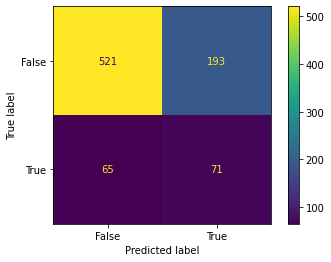

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6964705882352941

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.2689393939393939

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.5220588235294118

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.7296918767507002

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.35500000000000004

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6964705882352941, 'Precision': 0.2689393939393939, 'Sensitivity_recall': 0.5220588235294118, 'Specificity': 0.7296918767507002, 'F1_score': 0.35500000000000004}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1     41  57.746479     -1
 1     11  15.492958      1
 2      3   4.225352      2
 0      3   4.225352      0
 16     2   2.816901     16
 8      2   2.816901      8
 4      2   2.816901      4
 6      2   2.816901      6
 22     1   1.408451     22
 7      1   1.408451      7
 3      1   1.408451      3
 20     1   1.408451     20
 11     1   1.408451     11

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1    110  56.994819     -1
 0     26  13.471503      0
 1     13   6.735751      1
 12     9   4.663212     12
 5      5   2.590674      5
 4      5   2.590674      4
 2      5   2.590674      2
 8      5   2.590674      8
 6      4   2.072539      6
 17     3   1.554404     17
 24     2   1.036269     24
 7      2   1.036269      7
 14     1   0.518135     14
 10     1   0.518135     10
 3      1   0.518135      3
 22     1   0.518135     22

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1    219  42.034549     -1
 0    112  21.497121      0
 1     79  15.163148      1
 12    17   3.262956     12
 5     17   3.262956      5
 4     11   2.111324      4
 3      9   1.727447      3
 24     6   1.151631     24
 7      5   0.959693      7
 8      5   0.959693      8
 9      4   0.767754      9
 14     4   0.767754     14
 17     3   0.575816     17
 11     3   0.575816     11
 25     3   0.575816     25
 16     3   0.575816     16
 15     3   0.575816     15
 19     2   0.383877     19
 21     2   0.383877     21
 27     2   0.383877     27
 2      2   0.383877      2
 13     2   0.383877     13
 22     1   0.191939     22
 34     1   0.191939     34
 10     1   0.191939     10
 29     1   0.191939     29
 30     1   0.191939     30
 6      1   0.191939      6
 33     1   0.191939     33
 23     1   0.191939     23

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred    percent  Topic
-1     36  55.384615     -1
 1      6   9.230769      1
 8      5   7.692308      8
 24     3   4.615385     24
 12     3   4.615385     12
 16     2   3.076923     16
 0      2   3.076923      0
 15     1   1.538462     15
 14     1   1.538462     14
 21     1   1.538462     21
 7      1   1.538462      7
 5      1   1.538462      5
 22     1   1.538462     22
 2      1   1.538462      2
 17     1   1.538462     17

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predH19TP  \
0      -1                           -1_heute_geht_immer_gibt      41.0   
1       0                            0_uhr_danke_woche_heute       3.0   
2       1            1_deutschland_deutsche_deutschen_berlin      11.0   
3       2                    2_nazis_nazi_neonazis_holocaust       3.0   
4       3                   3_tweet_twitter_twittern_stegner       1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...       2.0   
6       5                             5_geld_bezahlt_job_gut         0   
7       6                      6_wolf_binsenwombats_hund_rum       2.0   
8       7      7_medien_journalisten_propaganda_journalismus       1.0   
9       8                     8_islam_muslime_afd_islamismus       2.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel       1.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose         0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust       2.0   
18     17                17_grünen_grüne_entsorgung_ökostrom         0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire       1.0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus       1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato         0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    57.75     110.0   56.99     219.0   42.03      36.0   55.38  
1     4.23      26.0   13.47     112.0   21.50       2.0    3.08  
2    15.49      13.0    6.74      79.0   15.16       6.0    9.23  
3     4.23       5.0    2.59       2.0    0.38       1.0    1.54  
4     1.41       1.0    0.52       9.0    1.73         0    0.00  
5     2.82       5.0    2.59      11.0    2.11         0    0.00  
6     0.00       5.0    2.59      17.0    3.26       1.0    1.54  
7     2.82       4.0    2.07       1.0    0.19         0    0.00  
8     1.41       2.0    1.04       5.0    0.96       1.0    1.54  
9     2.82       5.0    2.59       5.0    0.96       5.0    7.69  
10    0.00         0    0.00       4.0    0.77         0    0.00  
11    0.00       1.0    0.52       1.0    0.19         0    0.00  
12    1.41         0    0.00       3.0    0.58         0    0.00  
13    0.00       9.0    4.66      17.0    3.26       3.0    4.62  
14    0.00         0    0.00       2.0    0.38         0    0.00  
15    0.00       1.0    0.52       4.0    0.77       1.0    1.54  
16    0.00         0    0.00       3.0    0.58       1.0    1.54  
17    2.82         0    0.00       3.0    0.58       2.0   

In [ ]:
df_merged

Topic                                               Name predH19TP  \
0      -1                           -1_heute_geht_immer_gibt      41.0   
1       0                            0_uhr_danke_woche_heute       3.0   
2       1            1_deutschland_deutsche_deutschen_berlin      11.0   
3       2                    2_nazis_nazi_neonazis_holocaust       3.0   
4       3                   3_tweet_twitter_twittern_stegner       1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...       2.0   
6       5                             5_geld_bezahlt_job_gut         0   
7       6                      6_wolf_binsenwombats_hund_rum       2.0   
8       7      7_medien_journalisten_propaganda_journalismus       1.0   
9       8                     8_islam_muslime_afd_islamismus       2.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel       1.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose         0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust       2.0   
18     17                17_grünen_grüne_entsorgung_ökostrom         0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire       1.0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus       1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato         0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    57.75     110.0   56.99     219.0   42.03      36.0   55.38  
1     4.23      26.0   13.47     112.0   21.50       2.0    3.08  
2    15.49      13.0    6.74      79.0   15.16       6.0    9.23  
3     4.23       5.0    2.59       2.0    0.38       1.0    1.54  
4     1.41       1.0    0.52       9.0    1.73         0    0.00  
5     2.82       5.0    2.59      11.0    2.11         0    0.00  
6     0.00       5.0    2.59      17.0    3.26       1.0    1.54  
7     2.82       4.0    2.07       1.0    0.19         0    0.00  
8     1.41       2.0    1.04       5.0    0.96       1.0    1.54  
9     2.82       5.0    2.59       5.0    0.96       5.0    7.69  
10    0.00         0    0.00       4.0    0.77         0    0.00  
11    0.00       1.0    0.52       1.0    0.19         0    0.00  
12    1.41         0    0.00       3.0    0.58         0    0.00  
13    0.00       9.0    4.66      17.0    3.26       3.0    4.62  
14    0.00         0    0.00       2.0    0.38         0    0.00  
15    0.00       1.0    0.52       4.0    0.77       1.0    1.54  
16    0.00         0    0.00       3.0    0.58       1.0    1.54  
17    2.82         0    0.00       3.0    0.58       2.0   

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                               Name  predH19TP  \
0      -1                           -1_heute_geht_immer_gibt         41   
1       0                            0_uhr_danke_woche_heute          3   
2       1            1_deutschland_deutsche_deutschen_berlin         11   
3       2                    2_nazis_nazi_neonazis_holocaust          3   
4       3                   3_tweet_twitter_twittern_stegner          1   
5       4  4_politik_sozialistische_sozialistischen_demok...          2   
6       5                             5_geld_bezahlt_job_gut          0   
7       6                      6_wolf_binsenwombats_hund_rum          2   
8       7      7_medien_journalisten_propaganda_journalismus          1   
9       8                     8_islam_muslime_afd_islamismus          2   
10      9                        9_kamera_blog_photo_kameras          0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel          1   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose          0   
14     13                     13_niemand_niemanden_bunt_null          0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression          0   
17     16                      16_rassisten_ffe_rassist_hust          2   
18     17                17_grünen_grüne_entsorgung_ökostrom          0   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire          1   
22     21              21_türkei_kurdischen_türken_türkische          0   
23     22                     22_religion_kirche_leben_jesus          1   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser          0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl          0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %H19TP  predH19FP  %H19FP  predH19TN  %H19TN  predH19FN  %H19FN  
0    57.75        110   56.99        219   42.03         36   55.38  
1     4.23         26   13.47        112   21.50          2    3.08  
2    15.49         13    6.74         79   15.16          6    9.23  
3     4.23          5    2.59          2    0.38          1    1.54  
4     1.41          1    0.52          9    1.73          0    0.00  
5     2.82          5    2.59         11    2.11          0    0.00  
6     0.00          5    2.59         17    3.26          1    1.54  
7     2.82          4    2.07          1    0.19          0    0.00  
8     1.41          2    1.04          5    0.96          1    1.54  
9     2.82          5    2.59          5    0.96          5    7.69  
10    0.00          0    0.00          4    0.77          0    0.00  
11    0.00          1    0.52          1    0.19          0    0.00  
12    1.41          0    0.00          3    0.58          0    0.00  
13    0.00          9    4.66         17    3.26          3    4.62  
14    0.00          0    0.00          2    0.38          0    0.00  
15    0.00          1    0.52          4    0.77          1    1.54  
16    0.00          0    0.00         

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0      -1   57.75   42.03   56.99   55.38   
1       0    4.23   21.50   13.47    3.08   
2       1   15.49   15.16    6.74    9.23   
3       2    4.23    0.38    2.59    1.54   
4       3    1.41    1.73    0.52    0.00   
5       4    2.82    2.11    2.59    0.00   
6       5    0.00    3.26    2.59    1.54   
7       6    2.82    0.19    2.07    0.00   
8       7    1.41    0.96    1.04    1.54   
9       8    2.82    0.96    2.59    7.69   
10      9    0.00    0.77    0.00    0.00   
11     10    0.00    0.19    0.52    0.00   
12     11    1.41    0.58    0.00    0.00   
13     12    0.00    3.26    4.66    4.62   
14     13    0.00    0.38    0.00    0.00   
15     14    0.00    0.77    0.52    1.54   
16     15    0.00    0.58    0.00    1.54   
17     16    2.82    0.58    0.00    3.08   
18     17    0.00    0.58    1.55    1.54   
19     18    0.00    0.00    0.00    0.00   
20     19    0.00    0.38    0.00    0.00   
21     20    1.41    0.00    0.00    0.00   
22     21    0.00    0.38    0.00    1.54   
23     22    1.41    0.19    0.52    1.54   
24     23    0.00    0.19    0.00    0.00   
25     24    0.00    1.15    1.04    4.62   
26     25    0.00    0.58    0.00    0.00   
27     26    0.00    0.00    0.00    0.00   
28     27    0.00    0.38    0.00    0.00   
29     28    0.00    0.00    0.00    0.00   
30     29    0.00    0.19    0.00    0.00   
31     30    0.00    0.19    0.00    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.00    0.00    0.00   
34     33    0.00    0.19    0.00    0.00   
35     34    0.00    0.19    0.00    0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

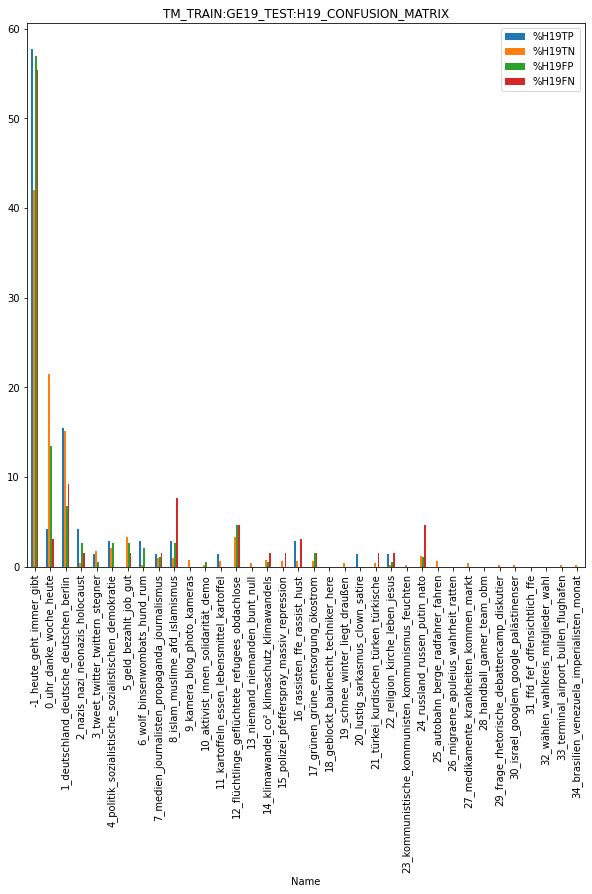

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

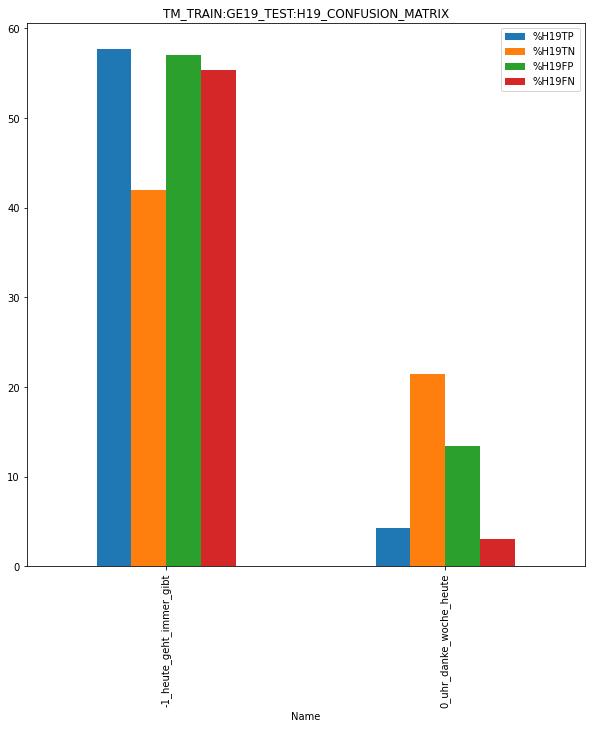

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

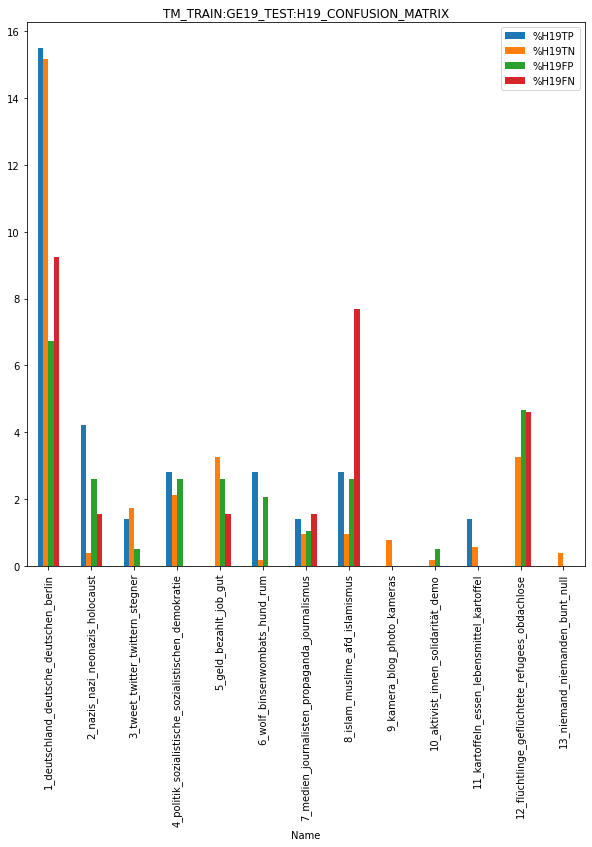

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

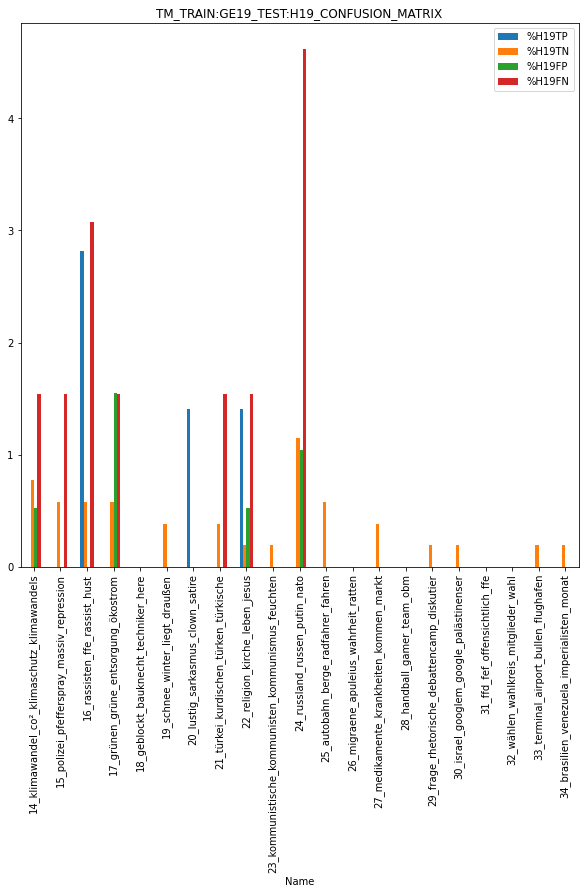

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_ge19_class_h20 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2019_HASOC2020.csv')
train_ge19_class_h20

index_col    task1  index_col.1
0            0    OTHER            0
1            1    OTHER            1
2            2    OTHER            2
3            3    OTHER            3
4            4    OTHER            4
..         ...      ...          ...
521        521    OTHER          521
522        522    OTHER          522
523        523    OTHER          523
524        524  OFFENSE          524
525        525    OTHER          525

[526 rows x 3 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_ge19_class_h20['task1'].value_counts())
h20_test_class_values

task1
OTHER      380
OFFENSE    146

In [ ]:

h20_test_raw['class'] = train_ge19_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred    class  
0    hasoc_2020_de_1053    10    OTHER  
1     hasoc_2020_de_671     0    OTHER  
2    hasoc_2020_de_2977    -1    OTHER  
3    hasoc_2020_de_1746    -1    OTHER  
4    hasoc_2020_de_2416    -1    OTHER  
..                  ...   ...      ...  
521   hasoc_2020_de_486    -1    OTHER  
522  hasoc_2020_de_3388    17    OTHER  
523  hasoc_2020_de_2745    -1    OTHER  
524   hasoc_2020_de_236    -1  OFFENSE  
525  hasoc_2020_de_2850    17    OTHER  

[526 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'OFFENSE')]
h20_test_true_pos

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
21           21  1134130242786926592   
22           22  1134444350027509766   
25           25  1131517942175289344   
..          ...                  ...   
486         486  1128516649236217856   
492         492  1130047717005242371   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
25   RT @Symon634: Ich ficke deine enkeltochter du ...   HOF  PRFN   
..                                                 ...   ...   ...   
486  @MaXXXPorco @bareholebitch So  ein  Riesen Toy...   HOF  PRFN   
492  @Ralf_Stegner obacht ralle!\ndumm und korrupt ...   HOF  HATE   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   

                     ID  pred    class  
5    hasoc_2020_de_1112    -1  OFFENSE  
6    hasoc_2020_de_2938    -1  OFFENSE  
21   hasoc_2020_de_1235    -1  OFFENSE  
22   hasoc_2020_de_2487    -1  OFFENSE  
25   hasoc_2020_de_2382    -1  OFFENSE  
..                  ...   ...      ...  
486  hasoc_2020_de_1068     6  OFFENSE  
492  hasoc_2020_de_2676    -1  OFFENSE  
508  hasoc_2020_de_2465    -1  OFFENSE  
511   hasoc_2020_de_958    -1  OFFENSE  
512  hasoc_2020_de_2470    -1  OFFENSE  

[90 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred    percent
-1     50  55.555556
 0     16  17.777778
 1      6   6.666667
 6      5   5.555556
 17     3   3.333333
 11     2   2.222222
 2      2   2.222222
 12     2   2.222222
 24     1   1.111111
 5      1   1.111111
 4      1   1.111111
 8      1   1.111111

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'OFFENSE')]
h20_test_false_pos

Unnamed: 0             tweet_id  \
7             7  1124978296628961287   
14           14  1125735959922921472   
23           23  1131658451371864064   
44           44  1123961328907976711   
52           52  1134350036920406017   
56           56  1133375347771228160   
61           61  1127148286907944960   
69           69  1129714097858199552   
78           78  1129741025310892038   
86           86  1134610230548021248   
107         107  1124749757392531456   
113         113  1128561024964149248   
129         129  1129397763458961409   
138         138  1132731874416254977   
140         140  1133740508055035906   
148         148  1129729230902824960   
171         171  1129441363236409345   
172         172  1129691243112542209   
180         180  1129325134907695104   
185         185  1129540524984213505   
187         187  1132950984865538048   
190         190  1129053981546823681   
203         203  1133858326058606592   
210         210  1131717423273582592   
275         275  1131582098270302208   
297         297  1124743692454113280   
307         307  1125055937415454721   
308         308  1127131497138462720   
340         340  1134521038681923585   
343         343  1132922828523745280   
354         354  1124997498177826816   
368         368  1124975608092610561   
369         369  1127086156678684672   
378         378  1126219605108776960   
381         381  1126970783983644674   
388         388  1127715637843898368   
394         394  1124188517582741504   
398         398  1128396457269133327   
399         399  1129602969773760512   
404         404  1128768500426784771   
411         411  1127653239191687168   
431         431  1125089437321502722   
433         433  1133635855992668160   
436         436  1125695828797087744   
439         439  1126865968335065088   
443         443  1132644280579887104   
451         451  1129043780965994496   
466         466  1131098763462893568   
469         469  1131493820758142977   
499         499  1125477276215382017   
501         501  1130786333922910208   
509         509  1124686842840981505   
515         515  1130191912982515714   
516         516  1124210369923297280   
519         519  1131124025734979586   
524         524  1124362090460975105   

                                                  text task1 task2  \
7    Da war #SPD #Kuehnert und am Ende auch #Nahles...   NOT  NONE   
14   @JemandOriginal Menschen als "dumm" zu bezeich...   NOT  NONE   
23   Was haben Almans fürn Problem mit #gntm? Schau...   NOT  NONE   
44   @robdoubleyoo @mialleixa34 Idiot! Hitler was v...   NOT  NONE   
52   RT @olivia_frey55: @MalteKaufmann Maltchen, ih...   NOT  NONE   
56                           Alles nur dumme Kinder...   NOT  NONE   
61   RT @Tadelloser_Wolf: Ich rudere schon so lange...   NOT  NONE   
69   RT @Piraten_NBB: In #Oranienburg sowie zum Kre...   NOT  NONE   
78   @drumheadberlin Am Unheil in Europa hat Frau M...   NOT  NONE   
86   @GuidoDietel @Die_Gruenen Ich kann nur noch la...   NOT  NONE   
107  RT @NebelNiek: Der Kopf will schlafen 😴🛏️🌙 abe...   NOT  NONE   
113  Tja, Frau Merkel müssen doch die Ohren klingel...   NOT  NONE   
129  @Herbstgefuehl Abtreibung ist Unmoralisch. Man...   NOT  NONE   
138  @Die_Gruenen Grüne regieren schon ewig mit ! N...   NOT  NONE   
140  @Disfosgen @welt Was für ein dummes Geschwafel...   NOT  NONE   
148  RT @Adele66661: @SirSchnee Das Schreddern von ...   NOT  NONE   
171  wie fancy sich deutsche immer vorkommen, wenn ...   NOT  NONE   
172  RT @horopat: @welt Der deutsche Verfassungssch...   NOT  NONE   
180  @dfr38314168 Devote grüne Frauen wird es unwei...   NOT  NONE   
185  @PepinOsten Rechte Macher im Gegensatz zu link...   NOT  NONE   
187  Wenn das mit dem Brot immer knapper wird, reic...   NOT  NONE   
190  Schule war heute und gestern eigentlich sehr s...   NOT  NONE   
203  @Ricarda_Lang Reg' Dich doch nicht über so ein...   NOT  NONE   
210  fetter arsch fickt deutsche gynkologe p

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1     30  53.571429
 0     10  17.857143
 1      4   7.142857
 2      3   5.357143
 8      3   5.357143
 20     2   3.571429
 17     1   1.785714
 11     1   1.785714
 34     1   1.785714
 25     1   1.785714

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'OTHER')]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
520         520  1123589659047731201   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
520        Einfach einladend 😉 https://t.co/kRHAoshmxY   NOT  NONE   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  
0    hasoc_2020_de_1053    10  OTHER  
1     hasoc_2020_de_671     0  OTHER  
2    hasoc_2020_de_2977    -1  OTHER  
3    hasoc_2020_de_1746    -1  OTHER  
4    hasoc_2020_de_2416    -1  OTHER  
..                  ...   ...    ...  
520  hasoc_2020_de_2794    -1  OTHER  
521   hasoc_2020_de_486    -1  OTHER  
522  hasoc_2020_de_3388    17  OTHER  
523  hasoc_2020_de_2745    -1  OTHER  
525  hasoc_2020_de_2850    17  OTHER  

[309 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1    144  46.601942
 0     72  23.300971
 1     33  10.679612
 17    21   6.796117
 2      9   2.912621
 8      7   2.265372
 5      6   1.941748
 11     3   0.970874
 21     3   0.970874
 6      1   0.323625
 22     1   0.323625
 12     1   0.323625
 18     1   0.323625
 13     1   0.323625
 10     1   0.323625
 16     1   0.323625
 4      1   0.323625
 14     1   0.323625
 3      1   0.323625
 7      1   0.323625

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'OTHER')]
h20_test_false_neg

Unnamed: 0             tweet_id  \
17           17  1126089577486323712   
24           24  1124210944534614016   
32           32  1134408971081703424   
35           35  1132234136364769280   
37           37  1129807773473091586   
..          ...                  ...   
496         496  1131274676741836800   
497         497  1134619244107370496   
498         498  1129818645109116928   
500         500  1128321203075256320   
517         517  1124379312264708101   

                                                  text task1 task2  \
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
32   @Saufkumpel_ Ich kann andere als Hurensohn bet...   HOF  PRFN   
35   @IslamiQde Der #Islam gehört nicht zu Deutschl...   HOF  HATE   
37   @PandabrchenThe1 Keine Ahnung, die sind richti...   HOF  PRFN   
..                                                 ...   ...   ...   
496  RT @can65schalke: „Göt“ ist türkisch und heißt...   HOF  PRFN   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  class  
17   hasoc_2020_de_2545    -1  OTHER  
24   hasoc_2020_de_1691     0  OTHER  
32   hasoc_2020_de_2121    -1  OTHER  
35   hasoc_2020_de_1850     1  OTHER  
37    hasoc_2020_de_675     0  OTHER  
..                  ...   ...    ...  
496  hasoc_2020_de_1993    21  OTHER  
497  hasoc_2020_de_1606    -1  OTHER  
498  hasoc_2020_de_2580    17  OTHER  
500  hasoc_2020_de_1958     0  OTHER  
517   hasoc_2020_de_986    -1  OTHER  

[71 rows x 8 columns]

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1     37  52.112676
 0      9  12.676056
 1      8  11.267606
 11     4   5.633803
 6      2   2.816901
 17     2   2.816901
 5      2   2.816901
 24     1   1.408451
 9      1   1.408451
 3      1   1.408451
 8      1   1.408451
 12     1   1.408451
 27     1   1.408451
 21     1   1.408451

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


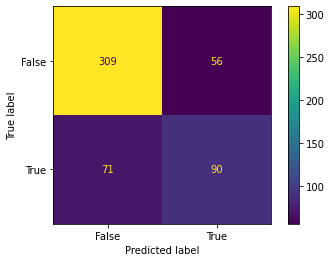

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7585551330798479

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6164383561643836

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.5590062111801242

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8465753424657534

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.5863192182410423

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7585551330798479, 'Precision': 0.6164383561643836, 'Sensitivity_recall': 0.5590062111801242, 'Specificity': 0.8465753424657534, 'F1_score': 0.5863192182410423}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred    percent  Topic
-1     50  55.555556     -1
 0     16  17.777778      0
 1      6   6.666667      1
 6      5   5.555556      6
 17     3   3.333333     17
 11     2   2.222222     11
 2      2   2.222222      2
 12     2   2.222222     12
 24     1   1.111111     24
 5      1   1.111111      5
 4      1   1.111111      4
 8      1   1.111111      8

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1     30  53.571429     -1
 0     10  17.857143      0
 1      4   7.142857      1
 2      3   5.357143      2
 8      3   5.357143      8
 20     2   3.571429     20
 17     1   1.785714     17
 11     1   1.785714     11
 34     1   1.785714     34
 25     1   1.785714     25

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1    144  46.601942     -1
 0     72  23.300971      0
 1     33  10.679612      1
 17    21   6.796117     17
 2      9   2.912621      2
 8      7   2.265372      8
 5      6   1.941748      5
 11     3   0.970874     11
 21     3   0.970874     21
 6      1   0.323625      6
 22     1   0.323625     22
 12     1   0.323625     12
 18     1   0.323625     18
 13     1   0.323625     13
 10     1   0.323625     10
 16     1   0.323625     16
 4      1   0.323625      4
 14     1   0.323625     14
 3      1   0.323625      3
 7      1   0.323625      7

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1     37  52.112676     -1
 0      9  12.676056      0
 1      8  11.267606      1
 11     4   5.633803     11
 6      2   2.816901      6
 17     2   2.816901     17
 5      2   2.816901      5
 24     1   1.408451     24
 9      1   1.408451      9
 3      1   1.408451      3
 8      1   1.408451      8
 12     1   1.408451     12
 27     1   1.408451     27
 21     1   1.408451     21

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                               Name predH20TP  \
0      -1                           -1_heute_geht_immer_gibt      50.0   
1       0                            0_uhr_danke_woche_heute      16.0   
2       1            1_deutschland_deutsche_deutschen_berlin       6.0   
3       2                    2_nazis_nazi_neonazis_holocaust       2.0   
4       3                   3_tweet_twitter_twittern_stegner         0   
5       4  4_politik_sozialistische_sozialistischen_demok...       1.0   
6       5                             5_geld_bezahlt_job_gut       1.0   
7       6                      6_wolf_binsenwombats_hund_rum       5.0   
8       7      7_medien_journalisten_propaganda_journalismus         0   
9       8                     8_islam_muslime_afd_islamismus       1.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel       2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       2.0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust         0   
18     17                17_grünen_grüne_entsorgung_ökostrom       3.0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire         0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus         0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato       1.0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0    55.56      30.0   53.57     144.0   46.60      37.0   52.11  
1    17.78      10.0   17.86      72.0   23.30       9.0   12.68  
2     6.67       4.0    7.14      33.0   10.68       8.0   11.27  
3     2.22       3.0    5.36       9.0    2.91         0    0.00  
4     0.00         0    0.00       1.0    0.32       1.0    1.41  
5     1.11         0    0.00       1.0    0.32         0    0.00  
6     1.11         0    0.00       6.0    1.94       2.0    2.82  
7     5.56         0    0.00       1.0    0.32       2.0    2.82  
8     0.00         0    0.00       1.0    0.32         0    0.00  
9     1.11       3.0    5.36       7.0    2.27       1.0    1.41  
10    0.00         0    0.00         0    0.00       1.0    1.41  
11    0.00         0    0.00       1.0    0.32         0    0.00  
12    2.22       1.0    1.79       3.0    0.97       4.0    5.63  
13    2.22         0    0.00       1.0    0.32       1.0    1.41  
14    0.00         0    0.00       1.0    0.32         0    0.00  
15    0.00         0    0.00       1.0    0.32         0    0.00  
16    0.00         0    0.00         0    0.00         0    0.00  
17    0.00         0    0.00       1.0    0.32         0   

In [ ]:
df_merged

Topic                                               Name predH20TP  \
0      -1                           -1_heute_geht_immer_gibt      50.0   
1       0                            0_uhr_danke_woche_heute      16.0   
2       1            1_deutschland_deutsche_deutschen_berlin       6.0   
3       2                    2_nazis_nazi_neonazis_holocaust       2.0   
4       3                   3_tweet_twitter_twittern_stegner         0   
5       4  4_politik_sozialistische_sozialistischen_demok...       1.0   
6       5                             5_geld_bezahlt_job_gut       1.0   
7       6                      6_wolf_binsenwombats_hund_rum       5.0   
8       7      7_medien_journalisten_propaganda_journalismus         0   
9       8                     8_islam_muslime_afd_islamismus       1.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel       2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       2.0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust         0   
18     17                17_grünen_grüne_entsorgung_ökostrom       3.0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire         0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus         0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato       1.0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0    55.56      30.0   53.57     144.0   46.60      37.0   52.11  
1    17.78      10.0   17.86      72.0   23.30       9.0   12.68  
2     6.67       4.0    7.14      33.0   10.68       8.0   11.27  
3     2.22       3.0    5.36       9.0    2.91         0    0.00  
4     0.00         0    0.00       1.0    0.32       1.0    1.41  
5     1.11         0    0.00       1.0    0.32         0    0.00  
6     1.11         0    0.00       6.0    1.94       2.0    2.82  
7     5.56         0    0.00       1.0    0.32       2.0    2.82  
8     0.00         0    0.00       1.0    0.32         0    0.00  
9     1.11       3.0    5.36       7.0    2.27       1.0    1.41  
10    0.00         0    0.00         0    0.00       1.0    1.41  
11    0.00         0    0.00       1.0    0.32         0    0.00  
12    2.22       1.0    1.79       3.0    0.97       4.0    5.63  
13    2.22         0    0.00       1.0    0.32       1.0    1.41  
14    0.00         0    0.00       1.0    0.32         0    0.00  
15    0.00         0    0.00       1.0    0.32         0    0.00  
16    0.00         0    0.00         0    0.00         0    0.00  
17    0.00         0    0.00       1.0    0.32         0   

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                               Name  predH20TP  \
0      -1                           -1_heute_geht_immer_gibt         50   
1       0                            0_uhr_danke_woche_heute         16   
2       1            1_deutschland_deutsche_deutschen_berlin          6   
3       2                    2_nazis_nazi_neonazis_holocaust          2   
4       3                   3_tweet_twitter_twittern_stegner          0   
5       4  4_politik_sozialistische_sozialistischen_demok...          1   
6       5                             5_geld_bezahlt_job_gut          1   
7       6                      6_wolf_binsenwombats_hund_rum          5   
8       7      7_medien_journalisten_propaganda_journalismus          0   
9       8                     8_islam_muslime_afd_islamismus          1   
10      9                        9_kamera_blog_photo_kameras          0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel          2   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose          2   
14     13                     13_niemand_niemanden_bunt_null          0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression          0   
17     16                      16_rassisten_ffe_rassist_hust          0   
18     17                17_grünen_grüne_entsorgung_ökostrom          3   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire          0   
22     21              21_türkei_kurdischen_türken_türkische          0   
23     22                     22_religion_kirche_leben_jesus          0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          1   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser          0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl          0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %H20TP  predH20FP  %H20FP  predH20TN  %H20TN  predH20FN  %H20FN  
0    55.56         30   53.57        144   46.60         37   52.11  
1    17.78         10   17.86         72   23.30          9   12.68  
2     6.67          4    7.14         33   10.68          8   11.27  
3     2.22          3    5.36          9    2.91          0    0.00  
4     0.00          0    0.00          1    0.32          1    1.41  
5     1.11          0    0.00          1    0.32          0    0.00  
6     1.11          0    0.00          6    1.94          2    2.82  
7     5.56          0    0.00          1    0.32          2    2.82  
8     0.00          0    0.00          1    0.32          0    0.00  
9     1.11          3    5.36          7    2.27          1    1.41  
10    0.00          0    0.00          0    0.00          1    1.41  
11    0.00          0    0.00          1    0.32          0    0.00  
12    2.22          1    1.79          3    0.97          4    5.63  
13    2.22          0    0.00          1    0.32          1    1.41  
14    0.00          0    0.00          1    0.32          0    0.00  
15    0.00          0    0.00          1    0.32          0    0.00  
16    0.00          0    0.00         

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0      -1   55.56   46.60   53.57   52.11   
1       0   17.78   23.30   17.86   12.68   
2       1    6.67   10.68    7.14   11.27   
3       2    2.22    2.91    5.36    0.00   
4       3    0.00    0.32    0.00    1.41   
5       4    1.11    0.32    0.00    0.00   
6       5    1.11    1.94    0.00    2.82   
7       6    5.56    0.32    0.00    2.82   
8       7    0.00    0.32    0.00    0.00   
9       8    1.11    2.27    5.36    1.41   
10      9    0.00    0.00    0.00    1.41   
11     10    0.00    0.32    0.00    0.00   
12     11    2.22    0.97    1.79    5.63   
13     12    2.22    0.32    0.00    1.41   
14     13    0.00    0.32    0.00    0.00   
15     14    0.00    0.32    0.00    0.00   
16     15    0.00    0.00    0.00    0.00   
17     16    0.00    0.32    0.00    0.00   
18     17    3.33    6.80    1.79    2.82   
19     18    0.00    0.32    0.00    0.00   
20     19    0.00    0.00    0.00    0.00   
21     20    0.00    0.00    3.57    0.00   
22     21    0.00    0.97    0.00    1.41   
23     22    0.00    0.32    0.00    0.00   
24     23    0.00    0.00    0.00    0.00   
25     24    1.11    0.00    0.00    1.41   
26     25    0.00    0.00    1.79    0.00   
27     26    0.00    0.00    0.00    0.00   
28     27    0.00    0.00    0.00    1.41   
29     28    0.00    0.00    0.00    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.00    0.00    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.00    0.00    0.00   
34     33    0.00    0.00    0.00    0.00   
35     34    0.00    0.00    1.79    0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

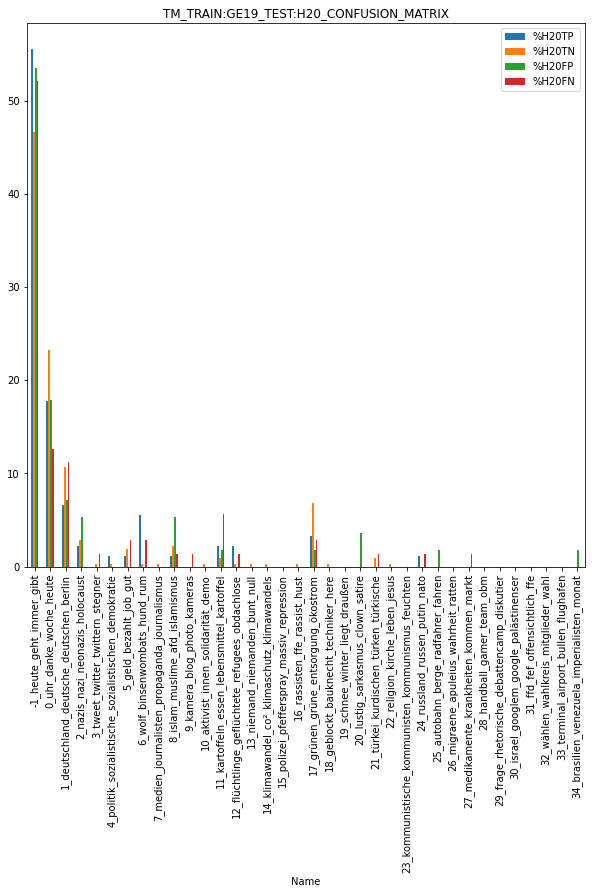

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

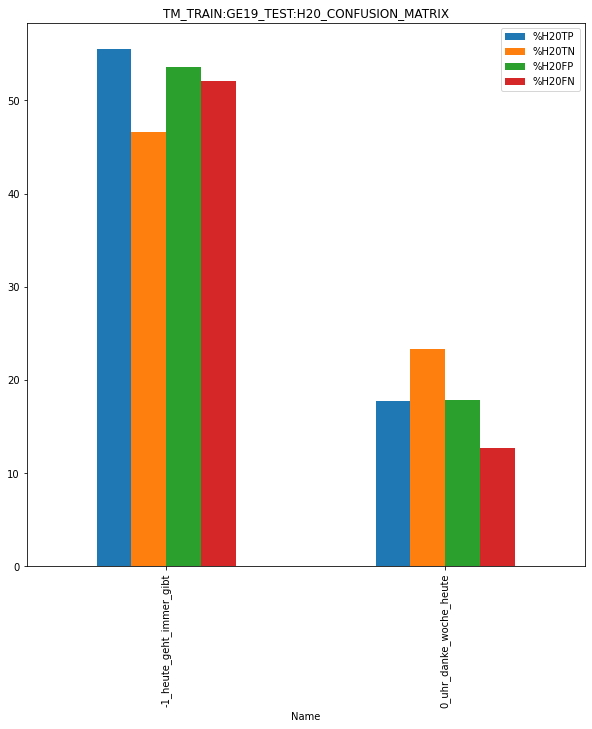

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

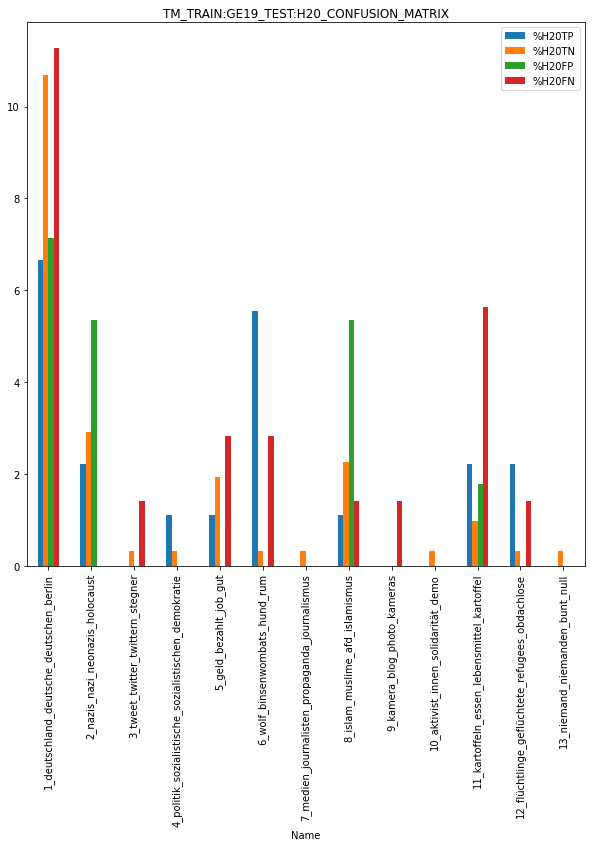

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

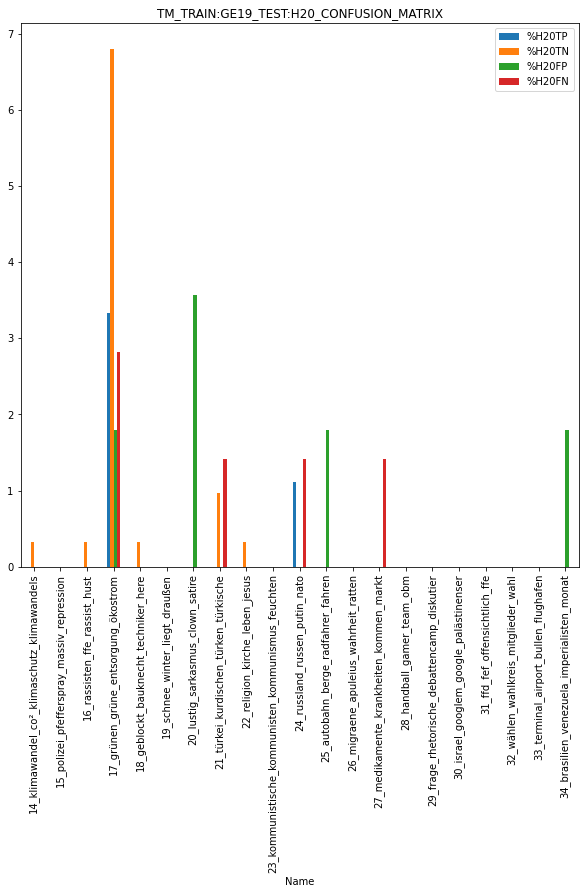

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

## Klassifikation ML_Geeks, trainiert auf GERMEVAL2019

### Test GE2018

In [ ]:
train_ge19_class_ge18 = pd.read_csv('/content/NSIT_Train_GERMEVAL2019_Test_GERMEVAL2018_Task_A_submission_DE_A.csv')
train_ge19_class_ge18


task1
0         0
1         0
2         0
3         1
4         1
...     ...
3527      1
3528      1
3529      1
3530      1
3531      1

[3532 rows x 1 columns]

In [ ]:
train_ge19_class_ge18['task1'] = train_ge19_class_ge18['task1'].map({0: 1, 1: 0}).astype(int)
train_ge19_class_ge18

task1
0         1
1         1
2         1
3         0
4         0
...     ...
3527      0
3528      0
3529      0
3530      0
3531      0

[3532 rows x 1 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_ge19_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
0   2724
1    808

In [ ]:
ge18_test_class_values['task1']

0    2724
1     808
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_ge19_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER    -1   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     8   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER    -1   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE     1   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER    -1   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         1               0                  0  
1         1               0                  0  
2         1               0                  1  
3         0               0                  0  
4         0               1                  0  
...     ...             ...                ...  
3527      0               0                  0  
3528      0               1                  0  
3529      0               1                  1  
3530      0               0                  0  
3531      0               0                  1  

[3532 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 1)]
ge18_test_true_pos

TWEET      OFF        CAT  \
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE     INSULT   
15    @LWaff @UnzufriedenerB |LBR| Laßt doch endlich...  OFFENSE      ABUSE   
16    @heuteshow Besser einen schwarz arbeiten zu la...  OFFENSE      ABUSE   
30    @FobiMania @ManuelaSchwesig @MartinSchulz Ich ...  OFFENSE     INSULT   
46    #Fußball werde ich mit Sicherheit nicht auf de...  OFFENSE  PROFANITY   
...                                                 ...      ...        ...   
3493  @rspctfl @ThomasMichael71 @Innenwelttramp @erg...  OFFENSE      ABUSE   
3505  @JoeHellBack @ThomasMichael71 @alexa_jung60 @T...  OFFENSE      ABUSE   
3507  Merkel zerstört den bürgerlich-konservativen K...  OFFENSE      ABUSE   
3514  wie immer die Moderatorin der @AktuelleStunde ...  OFFENSE     INSULT   
3517  @Alltags_Kotze Dein Feminismus und Genderquats...  OFFENSE      ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
13      -1      1               1                  0  
15       2      1               1                  1  
16      16      1               1                  1  
30       1      1               1                  1  
46      -1      1               1                  1  
...    ...    ...             ...                ...  
3493     8      1               1                  1  
3505     8      1               1                  1  
3507    -1      1               1                  0  
3514    -1      1               1                  1  
3517    -1      1               1                  1  

[448 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1    237  52.901786
 0     56  12.500000
 1     40   8.928571
 8     36   8.035714
 22    11   2.455357
 6      9   2.008929
 17     8   1.785714
 12     8   1.785714
 2      6   1.339286
 16     6   1.339286
 5      6   1.339286
 4      4   0.892857
 20     3   0.669643
 30     3   0.669643
 26     3   0.669643
 13     2   0.446429
 21     2   0.446429
 7      2   0.446429
 32     2   0.446429
 15     1   0.223214
 9      1   0.223214
 11     1   0.223214
 3      1   0.223214

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 1)]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER    -1   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     8   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
8     "Wenn man Mädchen bildet, bildet man Generatio...  OTHER  OTHER     6   
19    @MarioBuchinger @Tevsa Haben Sie denn Probleme...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3485  Auf der #Compact-Konfernz in #Leipzig spricht ...  OTHER  OTHER    -1   
3488  @MarcusPretzell Darf @Joerg_Meuthen denn dann ...  OTHER  OTHER     0   
3490  @NBI_ffm @jusos Bin ganz Ihrer Meinung. Nur ha...  OTHER  OTHER    -1   
3509  Solange Rüstungslobbyisten wie #Kahrs &amp; #H...  OTHER  OTHER    -1   
3522  Heil dir im Siegerkranz,Herrscher des Vaterlan...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         1               0                  0  
1         1               0                  0  
2         1               0                  1  
8         1               0                  0  
19        1               0                  0  
...     ...             ...                ...  
3485      1               0                  0  
3488      1               0                  1  
3490      1               0                  0  
3509      1               0                  1  
3522      1               0                  1  

[360 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1    194  53.888889
 0     50  13.888889
 1     29   8.055556
 22    13   3.611111
 12    10   2.777778
 8     10   2.777778
 30     6   1.666667
 4      6   1.666667
 16     5   1.388889
 5      5   1.388889
 20     4   1.111111
 3      4   1.111111
 17     4   1.111111
 6      4   1.111111
 29     3   0.833333
 13     2   0.555556
 9      2   0.555556
 2      2   0.555556
 15     1   0.277778
 7      1   0.277778
 32     1   0.277778
 33     1   0.277778
 24     1   0.277778
 10     1   0.277778
 21     1   0.277778

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 0)]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER    -1   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1   
6     @Thueringen_ @Miquwarchar @Pontifex_de Man mun...  OTHER  OTHER    -1   
7     @hugresch @saltomentale Seit dem ist die Gesel...  OTHER  OTHER    -1   
12    @mountainman1977 @StapelChipsYT Au ja. Ich ste...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER     0   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER    -1   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
3         0               0                  0  
5         0               0                  0  
6         0               0                  0  
7         0               0                  0  
12        0               0                  0  
...     ...             ...                ...  
3523      0               0                  1  
3524      0               0                  0  
3527      0               0                  0  
3530      0               0                  0  
3531      0               0                  1  

[1970 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1   1064  54.010152
 0    323  16.395939
 1    136   6.903553
 22    65   3.299492
 3     43   2.182741
 5     32   1.624365
 8     31   1.573604
 12    31   1.573604
 6     23   1.167513
 4     22   1.116751
 13    20   1.015228
 16    16   0.812183
 2     16   0.812183
 7     15   0.761421
 21    15   0.761421
 17    15   0.761421
 25    12   0.609137
 9     11   0.558376
 14    10   0.507614
 30     8   0.406091
 20     8   0.406091
 29     6   0.304569
 10     6   0.304569
 15     6   0.304569
 32     6   0.304569
 11     6   0.304569
 27     5   0.253807
 26     5   0.253807
 18     4   0.203046
 24     3   0.152284
 31     2   0.101523
 28     2   0.101523
 23     2   0.101523
 19     1   0.050761

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 0)]
ge18_test_false_neg

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE   
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
17    @elmo31226 @MartinSchulz @Ralf_Stegner Von mir...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
4        1      0               1                  0  
9       -1      0               1                  0  
10       0      0               1                  0  
11      -1      0               1                  1  
17       0      0               1                  0  
...    ...    ...             ...                ...  
3521     1      0               1                  0  
3525    -1      0               1                  0  
3526    11      0               1                  1  
3528    -1      0               1                  0  
3529     0      0               1                  1  

[754 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1    425  56.366048
 0     91  12.068966
 1     62   8.222812
 8     38   5.039788
 12    26   3.448276
 6     18   2.387268
 16    17   2.254642
 17    17   2.254642
 7     10   1.326260
 5     10   1.326260
 22     7   0.928382
 2      6   0.795756
 21     5   0.663130
 4      4   0.530504
 30     4   0.530504
 25     3   0.397878
 20     2   0.265252
 11     2   0.265252
 9      2   0.265252
 13     1   0.132626
 3      1   0.132626
 29     1   0.132626
 18     1   0.132626
 15     1   0.132626

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
#ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({1: 1, 0: 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].astype(int)


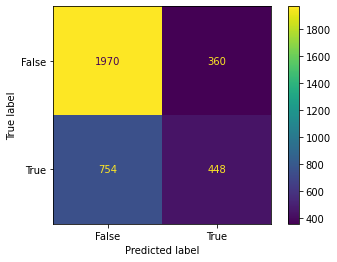

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6845979614949037

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5544554455445545

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.37271214642262895

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8454935622317596

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.445771144278607

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6845979614949037, 'Precision': 0.5544554455445545, 'Sensitivity_recall': 0.37271214642262895, 'Specificity': 0.8454935622317596, 'F1_score': 0.445771144278607}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1    237  52.901786     -1
 0     56  12.500000      0
 1     40   8.928571      1
 8     36   8.035714      8
 22    11   2.455357     22
 6      9   2.008929      6
 17     8   1.785714     17
 12     8   1.785714     12
 2      6   1.339286      2
 16     6   1.339286     16
 5      6   1.339286      5
 4      4   0.892857      4
 20     3   0.669643     20
 30     3   0.669643     30
 26     3   0.669643     26
 13     2   0.446429     13
 21     2   0.446429     21
 7      2   0.446429      7
 32     2   0.446429     32
 15     1   0.223214     15
 9      1   0.223214      9
 11     1   0.223214     11
 3      1   0.223214      3

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1    194  53.888889     -1
 0     50  13.888889      0
 1     29   8.055556      1
 22    13   3.611111     22
 12    10   2.777778     12
 8     10   2.777778      8
 30     6   1.666667     30
 4      6   1.666667      4
 16     5   1.388889     16
 5      5   1.388889      5
 20     4   1.111111     20
 3      4   1.111111      3
 17     4   1.111111     17
 6      4   1.111111      6
 29     3   0.833333     29
 13     2   0.555556     13
 9      2   0.555556      9
 2      2   0.555556      2
 15     1   0.277778     15
 7      1   0.277778      7
 32     1   0.277778     32
 33     1   0.277778     33
 24     1   0.277778     24
 10     1   0.277778     10
 21     1   0.277778     21

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1   1064  54.010152     -1
 0    323  16.395939      0
 1    136   6.903553      1
 22    65   3.299492     22
 3     43   2.182741      3
 5     32   1.624365      5
 8     31   1.573604      8
 12    31   1.573604     12
 6     23   1.167513      6
 4     22   1.116751      4
 13    20   1.015228     13
 16    16   0.812183     16
 2     16   0.812183      2
 7     15   0.761421      7
 21    15   0.761421     21
 17    15   0.761421     17
 25    12   0.609137     25
 9     11   0.558376      9
 14    10   0.507614     14
 30     8   0.406091     30
 20     8   0.406091     20
 29     6   0.304569     29
 10     6   0.304569     10
 15     6   0.304569     15
 32     6   0.304569     32
 11     6   0.304569     11
 27     5   0.253807     27
 26     5   0.253807     26
 18     4   0.203046     18
 24     3   0.152284     24
 31     2   0.101523     31
 28     2   0.101523     28
 23     2   0.101523     23
 19     1   0.050761     19

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1    425  56.366048     -1
 0     91  12.068966      0
 1     62   8.222812      1
 8     38   5.039788      8
 12    26   3.448276     12
 6     18   2.387268      6
 16    17   2.254642     16
 17    17   2.254642     17
 7     10   1.326260      7
 5     10   1.326260      5
 22     7   0.928382     22
 2      6   0.795756      2
 21     5   0.663130     21
 4      4   0.530504      4
 30     4   0.530504     30
 25     3   0.397878     25
 20     2   0.265252     20
 11     2   0.265252     11
 9      2   0.265252      9
 13     1   0.132626     13
 3      1   0.132626      3
 29     1   0.132626     29
 18     1   0.132626     18
 15     1   0.132626     15

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18TP  \
0      -1                           -1_heute_geht_immer_gibt      237.0   
1       0                            0_uhr_danke_woche_heute       56.0   
2       1            1_deutschland_deutsche_deutschen_berlin       40.0   
3       2                    2_nazis_nazi_neonazis_holocaust        6.0   
4       3                   3_tweet_twitter_twittern_stegner        1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        4.0   
6       5                             5_geld_bezahlt_job_gut        6.0   
7       6                      6_wolf_binsenwombats_hund_rum        9.0   
8       7      7_medien_journalisten_propaganda_journalismus        2.0   
9       8                     8_islam_muslime_afd_islamismus       36.0   
10      9                        9_kamera_blog_photo_kameras        1.0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        1.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose        8.0   
14     13                     13_niemand_niemanden_bunt_null        2.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression        1.0   
17     16                      16_rassisten_ffe_rassist_hust        6.0   
18     17                17_grünen_grüne_entsorgung_ökostrom        8.0   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire        3.0   
22     21              21_türkei_kurdischen_türken_türkische        2.0   
23     22                     22_religion_kirche_leben_jesus       11.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten        3.0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser        3.0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        2.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     52.90      194.0    53.89     1064.0    54.01      425.0    56.37  
1     12.50       50.0    13.89      323.0    16.40       91.0    12.07  
2      8.93       29.0     8.06      136.0     6.90       62.0     8.22  
3      1.34        2.0     0.56       16.0     0.81        6.0     0.80  
4      0.22        4.0     1.11       43.0     2.18        1.0     0.13  
5      0.89        6.0     1.67       22.0     1.12        4.0     0.53  
6      1.34        5.0     1.39       32.0     1.62       10.0     1.33  
7      2.01        4.0     1.11       23.0     1.17       18.0     2.39  
8      0.45        1.0     0.28       15.0     0.76       10.0     1.33  
9      8.04       10.0     2.78       31.0     1.57       38.0     5.04  
10     0.22        2.0     0.56       11.0     0.56        2.0     0.27  
11     0.00        1.0     0.28        6.0     0.30          0     0.00  
12     0.22          0     0.00        6.0     0.30        2.0     0.27  
13     1.79       10.0     2.78       31.0     1.57       26.0     3.45  
14     0.45        2.0     0.56       20.0     1.02        1.0     0.13  
15     0.00          0     0.00       10.0  

In [ ]:
df_merged

Topic                                               Name predGE18TP  \
0      -1                           -1_heute_geht_immer_gibt      237.0   
1       0                            0_uhr_danke_woche_heute       56.0   
2       1            1_deutschland_deutsche_deutschen_berlin       40.0   
3       2                    2_nazis_nazi_neonazis_holocaust        6.0   
4       3                   3_tweet_twitter_twittern_stegner        1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        4.0   
6       5                             5_geld_bezahlt_job_gut        6.0   
7       6                      6_wolf_binsenwombats_hund_rum        9.0   
8       7      7_medien_journalisten_propaganda_journalismus        2.0   
9       8                     8_islam_muslime_afd_islamismus       36.0   
10      9                        9_kamera_blog_photo_kameras        1.0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        1.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose        8.0   
14     13                     13_niemand_niemanden_bunt_null        2.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression        1.0   
17     16                      16_rassisten_ffe_rassist_hust        6.0   
18     17                17_grünen_grüne_entsorgung_ökostrom        8.0   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire        3.0   
22     21              21_türkei_kurdischen_türken_türkische        2.0   
23     22                     22_religion_kirche_leben_jesus       11.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten        3.0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser        3.0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        2.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     52.90      194.0    53.89     1064.0    54.01      425.0    56.37  
1     12.50       50.0    13.89      323.0    16.40       91.0    12.07  
2      8.93       29.0     8.06      136.0     6.90       62.0     8.22  
3      1.34        2.0     0.56       16.0     0.81        6.0     0.80  
4      0.22        4.0     1.11       43.0     2.18        1.0     0.13  
5      0.89        6.0     1.67       22.0     1.12        4.0     0.53  
6      1.34        5.0     1.39       32.0     1.62       10.0     1.33  
7      2.01        4.0     1.11       23.0     1.17       18.0     2.39  
8      0.45        1.0     0.28       15.0     0.76       10.0     1.33  
9      8.04       10.0     2.78       31.0     1.57       38.0     5.04  
10     0.22        2.0     0.56       11.0     0.56        2.0     0.27  
11     0.00        1.0     0.28        6.0     0.30          0     0.00  
12     0.22          0     0.00        6.0     0.30        2.0     0.27  
13     1.79       10.0     2.78       31.0     1.57       26.0     3.45  
14     0.45        2.0     0.56       20.0     1.02        1.0     0.13  
15     0.00          0     0.00       10.0  

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                               Name  predGE18TP  \
0      -1                           -1_heute_geht_immer_gibt         237   
1       0                            0_uhr_danke_woche_heute          56   
2       1            1_deutschland_deutsche_deutschen_berlin          40   
3       2                    2_nazis_nazi_neonazis_holocaust           6   
4       3                   3_tweet_twitter_twittern_stegner           1   
5       4  4_politik_sozialistische_sozialistischen_demok...           4   
6       5                             5_geld_bezahlt_job_gut           6   
7       6                      6_wolf_binsenwombats_hund_rum           9   
8       7      7_medien_journalisten_propaganda_journalismus           2   
9       8                     8_islam_muslime_afd_islamismus          36   
10      9                        9_kamera_blog_photo_kameras           1   
11     10                 10_aktivist_innen_solidarität_demo           0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel           1   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose           8   
14     13                     13_niemand_niemanden_bunt_null           2   
15     14        14_klimawandel_co²_klimaschutz_klimawandels           0   
16     15          15_polizei_pfefferspray_massiv_repression           1   
17     16                      16_rassisten_ffe_rassist_hust           6   
18     17                17_grünen_grüne_entsorgung_ökostrom           8   
19     18               18_geblockt_bauknecht_techniker_here           0   
20     19                     19_schnee_winter_liegt_draußen           0   
21     20                   20_lustig_sarkasmus_clown_satire           3   
22     21              21_türkei_kurdischen_türken_türkische           2   
23     22                     22_religion_kirche_leben_jesus          11   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...           0   
25     24                      24_russland_russen_putin_nato           0   
26     25                 25_autobahn_berge_radfahrer_fahren           0   
27     26               26_migraene_apuleius_wahrheit_ratten           3   
28     27            27_medikamente_krankheiten_kommen_markt           0   
29     28                         28_handball_gamer_team_obm           0   
30     29        29_frage_rhetorische_debattencamp_diskutier           0   
31     30             30_israel_googlem_google_palästinenser           3   
32     31                      31_ffd_fef_offensichtlich_ffe           0   
33     32                32_wählen_wahlkreis_mitglieder_wahl           2   
34     33               33_terminal_airport_bullen_flughafen           0   
35     34         34_brasilien_venezuela_imperialisten_monat           0   

    %GE18TP  predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0     52.90         194    53.89        1064    54.01         425    56.37  
1     12.50          50    13.89         323    16.40          91    12.07  
2      8.93          29     8.06         136     6.90          62     8.22  
3      1.34           2     0.56          16     0.81           6     0.80  
4      0.22           4     1.11          43     2.18           1     0.13  
5      0.89           6     1.67          22     1.12           4     0.53  
6      1.34           5     1.39          32     1.62          10     1.33  
7      2.01           4     1.11          23     1.17          18     2.39  
8      0.45           1     0.28          15     0.76          10     1.33  
9      8.04          10     2.78          31     1.57          38     5.04  
10     0.22           2     0.56          11     0.56           2     0.27  
11     0.00           1     0.28           6     0.30           0     0.00  
12     0.22           0     0.00           6     0.30           2     0.27  
13     1.79          10     2.78          31     1.57          26     3.45  
14     0.45           2     0.56    

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0      -1    52.90    54.01    53.89    56.37   
1       0    12.50    16.40    13.89    12.07   
2       1     8.93     6.90     8.06     8.22   
3       2     1.34     0.81     0.56     0.80   
4       3     0.22     2.18     1.11     0.13   
5       4     0.89     1.12     1.67     0.53   
6       5     1.34     1.62     1.39     1.33   
7       6     2.01     1.17     1.11     2.39   
8       7     0.45     0.76     0.28     1.33   
9       8     8.04     1.57     2.78     5.04   
10      9     0.22     0.56     0.56     0.27   
11     10     0.00     0.30     0.28     0.00   
12     11     0.22     0.30     0.00     0.27   
13     12     1.79     1.57     2.78     3.45   
14     13     0.45     1.02     0.56     0.13   
15     14     0.00     0.51     0.00     0.00   
16     15     0.22     0.30     0.28     0.13   
17     16     1.34     0.81     1.39     2.25   
18     17     1.79     0.76     1.11     2.25   
19     18     0.00     0.20     0.00     0.13   
20     19     0.00     0.05     0.00     0.00   
21     20     0.67     0.41     1.11     0.27   
22     21     0.45     0.76     0.28     0.66   
23     22     2.46     3.30     3.61     0.93   
24     23     0.00     0.10     0.00     0.00   
25     24     0.00     0.15     0.28     0.00   
26     25     0.00     0.61     0.00     0.40   
27     26     0.67     0.25     0.00     0.00   
28     27     0.00     0.25     0.00     0.00   
29     28     0.00     0.10     0.00     0.00   
30     29     0.00     0.30     0.83     0.13   
31     30     0.67     0.41     1.67     0.53   
32     31     0.00     0.10     0.00     0.00   
33     32     0.45     0.30     0.28     0.00   
34     33     0.00     0.00     0.28     0.00   
35     34     0.00     0.00     0.00     0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

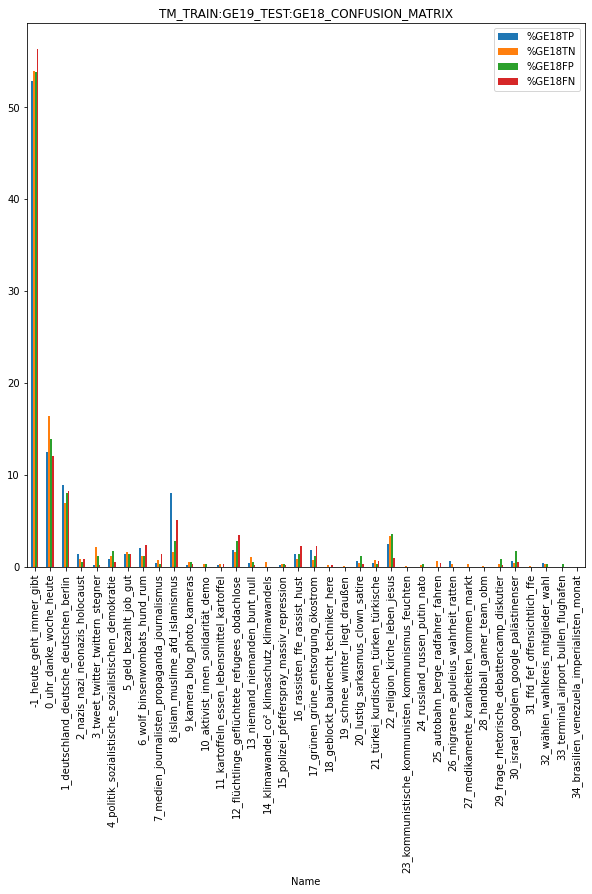

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

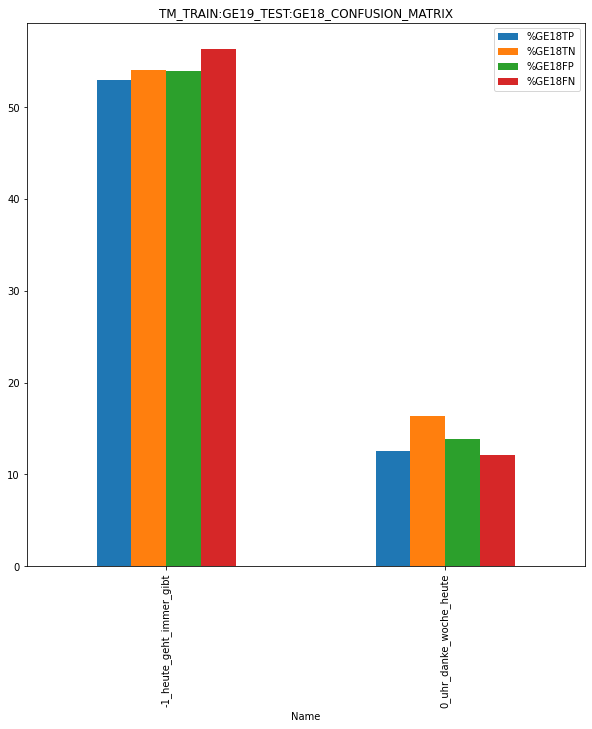

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

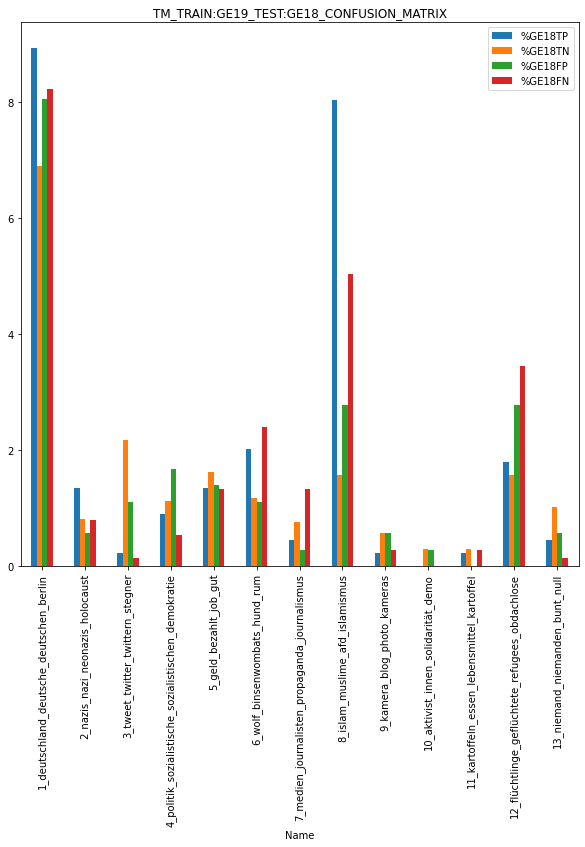

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

In [ ]:
#test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE19_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_ge19_class_ge19 = pd.read_csv('/content/NSIT_submission_GERMEVAL2019_TASK_A_DE_A.csv')
train_ge19_class_ge19

task1
0         1
1         1
2         1
3         1
4         0
...     ...
3026      1
3027      1
3028      1
3029      1
3030      1

[3031 rows x 1 columns]

In [ ]:
train_ge19_class_ge19['task1'] = train_ge19_class_ge19['task1'].map({0: 1, 1: 0}).astype(int)
train_ge19_class_ge19

task1
0         0
1         0
2         0
3         0
4         1
...     ...
3026      0
3027      0
3028      0
3029      0
3030      0

[3031 rows x 1 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_ge19_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
0   2350
1    681

In [ ]:

ge19_test_raw['class'] = train_ge19_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred  class  cat_bin_actual  cat_bin_predicted  
0       -1      0               1                  0  
1       -1      0               1                  1  
2       22      0               0                  0  
3       -1      0               1                  0  
4       -1      1               1                  1  
...    ...    ...             ...                ...  
3026    21      0               0                  0  
3027    -1      0               0                  0  
3028    -1      0               0                  0  
3029    -1      0               0                  0  
3030     0      0               0                  0  

[3031 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 1)]
ge19_test_true_pos

TWEET      OFF     CAT  \
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
10    @rbbabendschau Nun, Eigentum verpflichtet, das...  OFFENSE   ABUSE   
16    @hessenschau Komisch, wäre es die AfD gebe es ...  OFFENSE   ABUSE   
17    @welt Wenn sie noch eine Nazi Keule brauchen, ...  OFFENSE   ABUSE   
18    @RegSprecher @peteraltmaier Wie der widerliche...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
2881  Während #Merkel #CemOEzdemir #Steinmeier mit #...  OFFENSE   ABUSE   
2886  Ich kann nachvollziehen dass seriöse Medien ka...  OFFENSE  INSULT   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE  INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE  INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE  INSULT   

      pred  class  cat_bin_actual  cat_bin_predicted  
4       -1      1               1                  1  
10       0      1               1                  1  
16      -1      1               1                  1  
17      -1      1               1                  1  
18      -1      1               1                  1  
...    ...    ...             ...                ...  
2881    -1      1               1                  1  
2886    -1      1               1                  1  
2949    21      1               1                  0  
2976    -1      1               1                  1  
2978    -1      1               1                  1  

[366 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1    207  56.557377
 0     54  14.754098
 1     27   7.377049
 2     11   3.005464
 30     9   2.459016
 16     8   2.185792
 17     7   1.912568
 6      6   1.639344
 8      5   1.366120
 5      3   0.819672
 15     3   0.819672
 7      3   0.819672
 3      3   0.819672
 12     3   0.819672
 13     2   0.546448
 4      2   0.546448
 11     2   0.546448
 20     2   0.546448
 19     1   0.273224
 18     1   0.273224
 31     1   0.273224
 32     1   0.273224
 23     1   0.273224
 22     1   0.273224
 9      1   0.273224
 14     1   0.273224
 21     1   0.273224

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 1)]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER    -1   
67    @faznet @berlinale Kann es sein das hier auf i...  OTHER  OTHER    -1   
118   Hammer-Umfrage: AfD bundesweit auf Platz zwei ...  OTHER  OTHER    -1   
122   @CASPERxOFFICIAL @Kraftklub @dendemann @marter...  OTHER  OTHER    20   
133   @AlexF50451971 @sabinemnch1 @petraschnautzer D...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
2994  @DerBuddler @Fischblog @lui_log Man sollte die...  OTHER  OTHER    -1   
3005  @Fischblog Natürlich wurde das Logo im Hinterg...  OTHER  OTHER     9   
3016  @nouripour @Twinnz4you @HeikoMaas Setzt ein Kr...  OTHER  OTHER     0   
3018  \""pervers\"ist ganz sicher KEINE korrekte Cha...  OTHER  OTHER     0   
3022  Und die Tatsache, dass die Kurdenfrage fast ge...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
25        1               0                  0  
67        1               0                  0  
118       1               0                  1  
122       1               0                  0  
133       1               0                  0  
...     ...             ...                ...  
2994      1               0                  0  
3005      1               0                  0  
3016      1               0                  1  
3018      1               0                  0  
3022      1               0                  0  

[315 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1    166  52.698413
 0     53  16.825397
 1     25   7.936508
 5      9   2.857143
 4      8   2.539683
 30     7   2.222222
 8      6   1.904762
 22     5   1.587302
 3      5   1.587302
 12     4   1.269841
 13     4   1.269841
 23     3   0.952381
 20     3   0.952381
 9      3   0.952381
 15     3   0.952381
 7      2   0.634921
 27     2   0.634921
 2      1   0.317460
 25     1   0.317460
 16     1   0.317460
 6      1   0.317460
 11     1   0.317460
 17     1   0.317460
 14     1   0.317460

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 0)]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER    22   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    -1   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    25   
30    @faznet In England, Birmingham war mehr Täter,...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER    21   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER     0   

      class  cat_bin_actual  cat_bin_predicted  
2         0               0                  0  
5         0               0                  0  
6         0               0                  0  
12        0               0                  1  
30        0               0                  0  
...     ...             ...                ...  
3026      0               0                  0  
3027      0               0                  0  
3028      0               0                  0  
3029      0               0                  0  
3030      0               0                  0  

[1746 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1    939  53.780069
 0    300  17.182131
 1    100   5.727377
 3     64   3.665521
 5     32   1.832761
 14    25   1.431844
 16    21   1.202749
 2     20   1.145475
 4     19   1.088202
 30    17   0.973654
 8     17   0.973654
 12    15   0.859107
 11    15   0.859107
 25    15   0.859107
 10    14   0.801833
 20    13   0.744559
 23    12   0.687285
 21    12   0.687285
 13     9   0.515464
 7      9   0.515464
 18     9   0.515464
 15     8   0.458190
 9      8   0.458190
 6      7   0.400916
 31     7   0.400916
 22     6   0.343643
 29     6   0.343643
 19     6   0.343643
 32     5   0.286369
 27     4   0.229095
 24     3   0.171821
 17     3   0.171821
 28     2   0.114548
 34     2   0.114548
 33     1   0.057274
 26     1   0.057274

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 0)]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2885  Ob Erdogan nun hier ist oder nicht, der erste ...  OFFENSE      ABUSE   
2887  Sogenannte Aktivisten würden sich selbst im Pa...  OFFENSE      ABUSE   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE     INSULT   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  class  cat_bin_actual  cat_bin_predicted  
0       -1      0               1                  0  
1       -1      0               1                  1  
3       -1      0               1                  0  
7       -1      0               1                  0  
8       -1      0               1                  0  
...    ...    ...             ...                ...  
2885    -1      0               1                  0  
2887    -1      0               1                  1  
2888    10      0               1                  1  
2889    -1      0               1                  0  
2988     8      0               1                  0  

[604 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1    353  58.443709
 0     62  10.264901
 1     38   6.291391
 12    15   2.483444
 2     15   2.483444
 5     12   1.986755
 7     11   1.821192
 8     10   1.655629
 3     10   1.655629
 4      9   1.490066
 16     8   1.324503
 30     6   0.993377
 6      6   0.993377
 15     5   0.827815
 23     5   0.827815
 31     5   0.827815
 20     4   0.662252
 11     4   0.662252
 10     4   0.662252
 22     3   0.496689
 9      3   0.496689
 25     3   0.496689
 19     2   0.331126
 32     2   0.331126
 14     2   0.331126
 17     2   0.331126
 24     1   0.165563
 13     1   0.165563
 27     1   0.165563
 28     1   0.165563
 29     1   0.165563

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].astype(int)


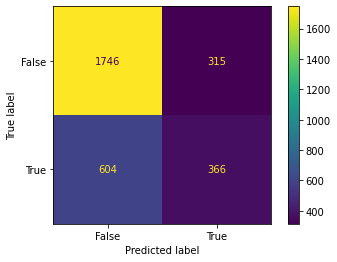

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.696799736060706

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5374449339207048

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.37731958762886597

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8471615720524017

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.44336765596608113

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.696799736060706, 'Precision': 0.5374449339207048, 'Sensitivity_recall': 0.37731958762886597, 'Specificity': 0.8471615720524017, 'F1_score': 0.44336765596608113}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1    207  56.557377     -1
 0     54  14.754098      0
 1     27   7.377049      1
 2     11   3.005464      2
 30     9   2.459016     30
 16     8   2.185792     16
 17     7   1.912568     17
 6      6   1.639344      6
 8      5   1.366120      8
 5      3   0.819672      5
 15     3   0.819672     15
 7      3   0.819672      7
 3      3   0.819672      3
 12     3   0.819672     12
 13     2   0.546448     13
 4      2   0.546448      4
 11     2   0.546448     11
 20     2   0.546448     20
 19     1   0.273224     19
 18     1   0.273224     18
 31     1   0.273224     31
 32     1   0.273224     32
 23     1   0.273224     23
 22     1   0.273224     22
 9      1   0.273224      9
 14     1   0.273224     14
 21     1   0.273224     21

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1    166  52.698413     -1
 0     53  16.825397      0
 1     25   7.936508      1
 5      9   2.857143      5
 4      8   2.539683      4
 30     7   2.222222     30
 8      6   1.904762      8
 22     5   1.587302     22
 3      5   1.587302      3
 12     4   1.269841     12
 13     4   1.269841     13
 23     3   0.952381     23
 20     3   0.952381     20
 9      3   0.952381      9
 15     3   0.952381     15
 7      2   0.634921      7
 27     2   0.634921     27
 2      1   0.317460      2
 25     1   0.317460     25
 16     1   0.317460     16
 6      1   0.317460      6
 11     1   0.317460     11
 17     1   0.317460     17
 14     1   0.317460     14

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1    939  53.780069     -1
 0    300  17.182131      0
 1    100   5.727377      1
 3     64   3.665521      3
 5     32   1.832761      5
 14    25   1.431844     14
 16    21   1.202749     16
 2     20   1.145475      2
 4     19   1.088202      4
 30    17   0.973654     30
 8     17   0.973654      8
 12    15   0.859107     12
 11    15   0.859107     11
 25    15   0.859107     25
 10    14   0.801833     10
 20    13   0.744559     20
 23    12   0.687285     23
 21    12   0.687285     21
 13     9   0.515464     13
 7      9   0.515464      7
 18     9   0.515464     18
 15     8   0.458190     15
 9      8   0.458190      9
 6      7   0.400916      6
 31     7   0.400916     31
 22     6   0.343643     22
 29     6   0.343643     29
 19     6   0.343643     19
 32     5   0.286369     32
 27     4   0.229095     27
 24     3   0.171821     24
 17     3   0.171821     17
 28     2   0.114548     28
 34     2   0.114548     34
 33     1   0.057274     33
 26     1   0.057274     26

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1    353  58.443709     -1
 0     62  10.264901      0
 1     38   6.291391      1
 12    15   2.483444     12
 2     15   2.483444      2
 5     12   1.986755      5
 7     11   1.821192      7
 8     10   1.655629      8
 3     10   1.655629      3
 4      9   1.490066      4
 16     8   1.324503     16
 30     6   0.993377     30
 6      6   0.993377      6
 15     5   0.827815     15
 23     5   0.827815     23
 31     5   0.827815     31
 20     4   0.662252     20
 11     4   0.662252     11
 10     4   0.662252     10
 22     3   0.496689     22
 9      3   0.496689      9
 25     3   0.496689     25
 19     2   0.331126     19
 32     2   0.331126     32
 14     2   0.331126     14
 17     2   0.331126     17
 24     1   0.165563     24
 13     1   0.165563     13
 27     1   0.165563     27
 28     1   0.165563     28
 29     1   0.165563     29

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE19TP  \
0      -1                           -1_heute_geht_immer_gibt      207.0   
1       0                            0_uhr_danke_woche_heute       54.0   
2       1            1_deutschland_deutsche_deutschen_berlin       27.0   
3       2                    2_nazis_nazi_neonazis_holocaust       11.0   
4       3                   3_tweet_twitter_twittern_stegner        3.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        2.0   
6       5                             5_geld_bezahlt_job_gut        3.0   
7       6                      6_wolf_binsenwombats_hund_rum        6.0   
8       7      7_medien_journalisten_propaganda_journalismus        3.0   
9       8                     8_islam_muslime_afd_islamismus        5.0   
10      9                        9_kamera_blog_photo_kameras        1.0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose        3.0   
14     13                     13_niemand_niemanden_bunt_null        2.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        1.0   
16     15          15_polizei_pfefferspray_massiv_repression        3.0   
17     16                      16_rassisten_ffe_rassist_hust        8.0   
18     17                17_grünen_grüne_entsorgung_ökostrom        7.0   
19     18               18_geblockt_bauknecht_techniker_here        1.0   
20     19                     19_schnee_winter_liegt_draußen        1.0   
21     20                   20_lustig_sarkasmus_clown_satire        2.0   
22     21              21_türkei_kurdischen_türken_türkische        1.0   
23     22                     22_religion_kirche_leben_jesus        1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...        1.0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser        9.0   
32     31                      31_ffd_fef_offensichtlich_ffe        1.0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        1.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE19TP predGE19FP  %GE19FP  predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     56.56      166.0    52.70         939    53.78      353.0    58.44  
1     14.75       53.0    16.83         300    17.18       62.0    10.26  
2      7.38       25.0     7.94         100     5.73       38.0     6.29  
3      3.01        1.0     0.32          20     1.15       15.0     2.48  
4      0.82        5.0     1.59          64     3.67       10.0     1.66  
5      0.55        8.0     2.54          19     1.09        9.0     1.49  
6      0.82        9.0     2.86          32     1.83       12.0     1.99  
7      1.64        1.0     0.32           7     0.40        6.0     0.99  
8      0.82        2.0     0.63           9     0.52       11.0     1.82  
9      1.37        6.0     1.90          17     0.97       10.0     1.66  
10     0.27        3.0     0.95           8     0.46        3.0     0.50  
11     0.00          0     0.00          14     0.80        4.0     0.66  
12     0.55        1.0     0.32          15     0.86        4.0     0.66  
13     0.82        4.0     1.27          15     0.86       15.0     2.48  
14     0.55        4.0     1.27           9     0.52        1.0     0.17  
15     0.27        1.0     0

In [ ]:
df_merged

Topic                                               Name predGE19TP  \
0      -1                           -1_heute_geht_immer_gibt      207.0   
1       0                            0_uhr_danke_woche_heute       54.0   
2       1            1_deutschland_deutsche_deutschen_berlin       27.0   
3       2                    2_nazis_nazi_neonazis_holocaust       11.0   
4       3                   3_tweet_twitter_twittern_stegner        3.0   
5       4  4_politik_sozialistische_sozialistischen_demok...        2.0   
6       5                             5_geld_bezahlt_job_gut        3.0   
7       6                      6_wolf_binsenwombats_hund_rum        6.0   
8       7      7_medien_journalisten_propaganda_journalismus        3.0   
9       8                     8_islam_muslime_afd_islamismus        5.0   
10      9                        9_kamera_blog_photo_kameras        1.0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel        2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose        3.0   
14     13                     13_niemand_niemanden_bunt_null        2.0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels        1.0   
16     15          15_polizei_pfefferspray_massiv_repression        3.0   
17     16                      16_rassisten_ffe_rassist_hust        8.0   
18     17                17_grünen_grüne_entsorgung_ökostrom        7.0   
19     18               18_geblockt_bauknecht_techniker_here        1.0   
20     19                     19_schnee_winter_liegt_draußen        1.0   
21     20                   20_lustig_sarkasmus_clown_satire        2.0   
22     21              21_türkei_kurdischen_türken_türkische        1.0   
23     22                     22_religion_kirche_leben_jesus        1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...        1.0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser        9.0   
32     31                      31_ffd_fef_offensichtlich_ffe        1.0   
33     32                32_wählen_wahlkreis_mitglieder_wahl        1.0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %GE19TP predGE19FP  %GE19FP  predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     56.56      166.0    52.70         939    53.78      353.0    58.44  
1     14.75       53.0    16.83         300    17.18       62.0    10.26  
2      7.38       25.0     7.94         100     5.73       38.0     6.29  
3      3.01        1.0     0.32          20     1.15       15.0     2.48  
4      0.82        5.0     1.59          64     3.67       10.0     1.66  
5      0.55        8.0     2.54          19     1.09        9.0     1.49  
6      0.82        9.0     2.86          32     1.83       12.0     1.99  
7      1.64        1.0     0.32           7     0.40        6.0     0.99  
8      0.82        2.0     0.63           9     0.52       11.0     1.82  
9      1.37        6.0     1.90          17     0.97       10.0     1.66  
10     0.27        3.0     0.95           8     0.46        3.0     0.50  
11     0.00          0     0.00          14     0.80        4.0     0.66  
12     0.55        1.0     0.32          15     0.86        4.0     0.66  
13     0.82        4.0     1.27          15     0.86       15.0     2.48  
14     0.55        4.0     1.27           9     0.52        1.0     0.17  
15     0.27        1.0     0

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                               Name  predGE19TP  \
0      -1                           -1_heute_geht_immer_gibt         207   
1       0                            0_uhr_danke_woche_heute          54   
2       1            1_deutschland_deutsche_deutschen_berlin          27   
3       2                    2_nazis_nazi_neonazis_holocaust          11   
4       3                   3_tweet_twitter_twittern_stegner           3   
5       4  4_politik_sozialistische_sozialistischen_demok...           2   
6       5                             5_geld_bezahlt_job_gut           3   
7       6                      6_wolf_binsenwombats_hund_rum           6   
8       7      7_medien_journalisten_propaganda_journalismus           3   
9       8                     8_islam_muslime_afd_islamismus           5   
10      9                        9_kamera_blog_photo_kameras           1   
11     10                 10_aktivist_innen_solidarität_demo           0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel           2   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose           3   
14     13                     13_niemand_niemanden_bunt_null           2   
15     14        14_klimawandel_co²_klimaschutz_klimawandels           1   
16     15          15_polizei_pfefferspray_massiv_repression           3   
17     16                      16_rassisten_ffe_rassist_hust           8   
18     17                17_grünen_grüne_entsorgung_ökostrom           7   
19     18               18_geblockt_bauknecht_techniker_here           1   
20     19                     19_schnee_winter_liegt_draußen           1   
21     20                   20_lustig_sarkasmus_clown_satire           2   
22     21              21_türkei_kurdischen_türken_türkische           1   
23     22                     22_religion_kirche_leben_jesus           1   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...           1   
25     24                      24_russland_russen_putin_nato           0   
26     25                 25_autobahn_berge_radfahrer_fahren           0   
27     26               26_migraene_apuleius_wahrheit_ratten           0   
28     27            27_medikamente_krankheiten_kommen_markt           0   
29     28                         28_handball_gamer_team_obm           0   
30     29        29_frage_rhetorische_debattencamp_diskutier           0   
31     30             30_israel_googlem_google_palästinenser           9   
32     31                      31_ffd_fef_offensichtlich_ffe           1   
33     32                32_wählen_wahlkreis_mitglieder_wahl           1   
34     33               33_terminal_airport_bullen_flughafen           0   
35     34         34_brasilien_venezuela_imperialisten_monat           0   

    %GE19TP  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0     56.56         166    52.70         939    53.78         353    58.44  
1     14.75          53    16.83         300    17.18          62    10.26  
2      7.38          25     7.94         100     5.73          38     6.29  
3      3.01           1     0.32          20     1.15          15     2.48  
4      0.82           5     1.59          64     3.67          10     1.66  
5      0.55           8     2.54          19     1.09           9     1.49  
6      0.82           9     2.86          32     1.83          12     1.99  
7      1.64           1     0.32           7     0.40           6     0.99  
8      0.82           2     0.63           9     0.52          11     1.82  
9      1.37           6     1.90          17     0.97          10     1.66  
10     0.27           3     0.95           8     0.46           3     0.50  
11     0.00           0     0.00          14     0.80           4     0.66  
12     0.55           1     0.32          15     0.86           4     0.66  
13     0.82           4     1.27          15     0.86          15     2.48  
14     0.55           4     1.27    

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0      -1    56.56    53.78    52.70    58.44   
1       0    14.75    17.18    16.83    10.26   
2       1     7.38     5.73     7.94     6.29   
3       2     3.01     1.15     0.32     2.48   
4       3     0.82     3.67     1.59     1.66   
5       4     0.55     1.09     2.54     1.49   
6       5     0.82     1.83     2.86     1.99   
7       6     1.64     0.40     0.32     0.99   
8       7     0.82     0.52     0.63     1.82   
9       8     1.37     0.97     1.90     1.66   
10      9     0.27     0.46     0.95     0.50   
11     10     0.00     0.80     0.00     0.66   
12     11     0.55     0.86     0.32     0.66   
13     12     0.82     0.86     1.27     2.48   
14     13     0.55     0.52     1.27     0.17   
15     14     0.27     1.43     0.32     0.33   
16     15     0.82     0.46     0.95     0.83   
17     16     2.19     1.20     0.32     1.32   
18     17     1.91     0.17     0.32     0.33   
19     18     0.27     0.52     0.00     0.00   
20     19     0.27     0.34     0.00     0.33   
21     20     0.55     0.74     0.95     0.66   
22     21     0.27     0.69     0.00     0.00   
23     22     0.27     0.34     1.59     0.50   
24     23     0.27     0.69     0.95     0.83   
25     24     0.00     0.17     0.00     0.17   
26     25     0.00     0.86     0.32     0.50   
27     26     0.00     0.06     0.00     0.00   
28     27     0.00     0.23     0.63     0.17   
29     28     0.00     0.11     0.00     0.17   
30     29     0.00     0.34     0.00     0.17   
31     30     2.46     0.97     2.22     0.99   
32     31     0.27     0.40     0.00     0.83   
33     32     0.27     0.29     0.00     0.33   
34     33     0.00     0.06     0.00     0.00   
35     34     0.00     0.11     0.00     0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

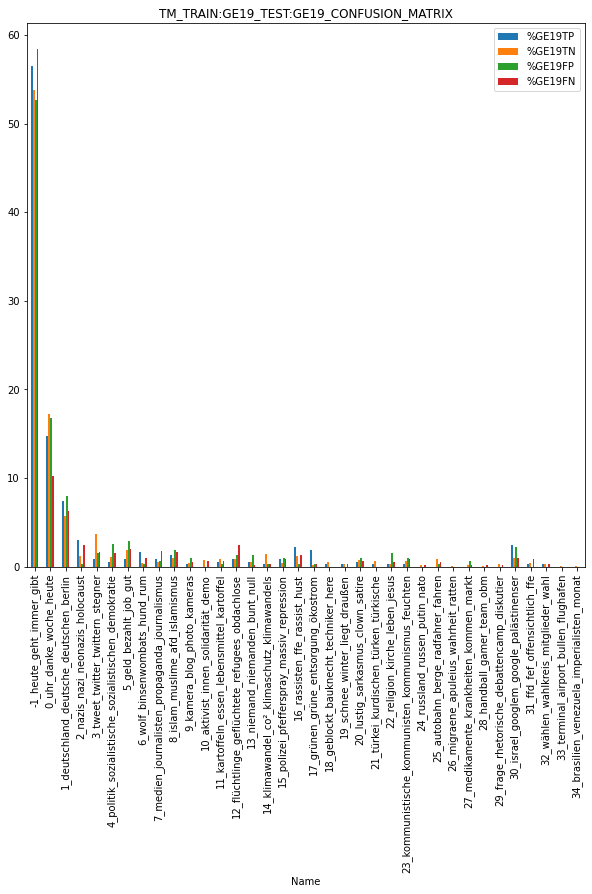

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

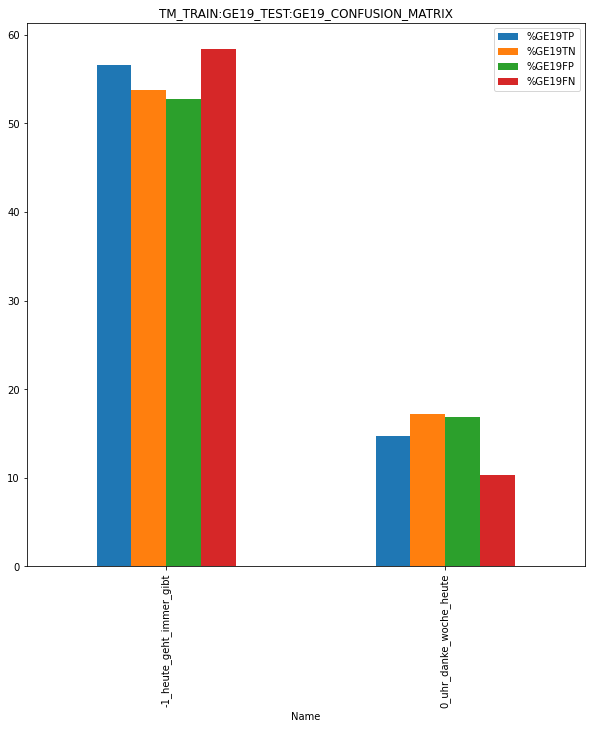

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

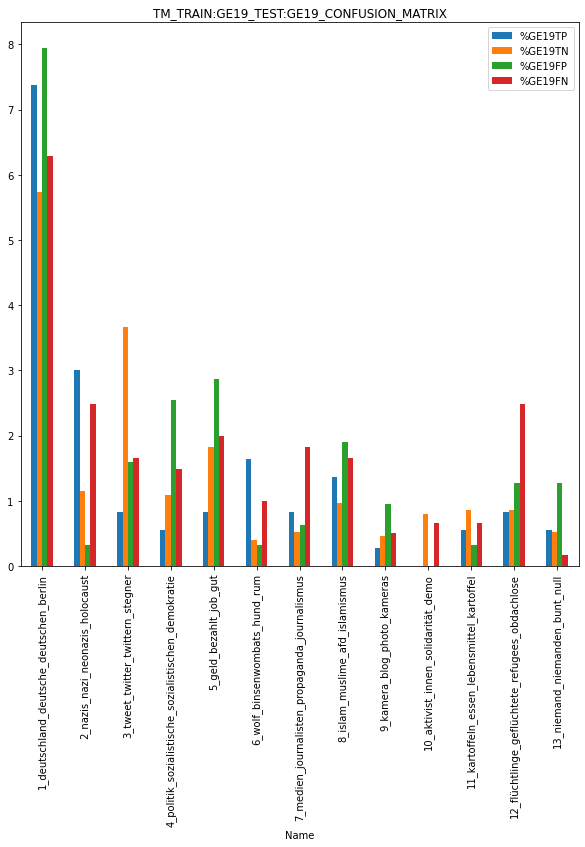

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

In [ ]:
#test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE19_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_ge19_class_h19 = pd.read_csv('/content/NSIT_Train_GERMEVAL2019_Test_HASOC2019_Task_A_submission_DE_A.csv')
train_ge19_class_h19


task1
0        1
1        1
2        1
3        0
4        1
..     ...
845      1
846      1
847      1
848      1
849      1

[850 rows x 1 columns]

In [ ]:
train_ge19_class_h19['task1'] = train_ge19_class_h19['task1'].map({0: 1, 1: 0}).astype(int)
train_ge19_class_h19

task1
0        0
1        0
2        0
3        1
4        0
..     ...
845      0
846      0
847      0
848      0
849      0

[850 rows x 1 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_ge19_class_h19['task1'].value_counts())
h19_test_class_values

task1
0    643
1    207

In [ ]:

h19_test_raw['class'] = train_ge19_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE    -1      0               1                  1  
1     NONE     1      0               0                  0  
2     NONE     0      0               0                  0  
3     OFFN    -1      1               1                  1  
4     OFFN    -1      0               1                  1  
..     ...   ...    ...             ...                ...  
845   OFFN    -1      0               1                  1  
846   OFFN    11      0               1                  1  
847   OFFN    -1      0               1                  0  
848   OFFN    -1      0               1                  0  
849   NONE     0      0               0                  1  

[850 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 1)]
h19_test_true_pos

text_id                                               text task_1  \
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
46   hasoc_de_5316  @MichaelaKorte @chris_hiv @derCharlie_ @scheid...    HOF   
53   hasoc_de_5323  Kein Wunder,er ist wahrscheinlich,ein Psychopa...    HOF   
60   hasoc_de_5330  @Kurzkommentar @manu_mie @Ralf_Stegner Nun wir...    HOF   
62   hasoc_de_5332  @Kurzkommentar @manu_mie @Ralf_Stegner Lebst D...    HOF   
97   hasoc_de_5367  @Ungebeten1 @Ralf__B Homosexualität ist ein Üb...    HOF   
98   hasoc_de_5368  @Ungebeten1 Finde Homosexualität nicht 'gegen ...    HOF   
113  hasoc_de_5383  @BlondJedi @akk Sehr guter Vorschlag! Am beste...    HOF   
145  hasoc_de_5415  @BlondJedi ...das ist nur zu unterstreichen, m...    HOF   
156  hasoc_de_5426  @BlondJedi Ich denke auch so, die Schreier mit...    HOF   
161  hasoc_de_5431  @Ralf64904117 @ab19868 Wer soll diese Lügen gl...    HOF   
201  hasoc_de_5471  2/2  Hauptbahnhof das bunte Fest des Fastenbre...    HOF   
313  hasoc_de_5583  Tatsache ist,  ohne die Flüchtlinge,hätten wir...    HOF   
384  hasoc_de_5654  Hier zeigt der Islam sein wahres Gesicht!  Die...    HOF   
392  hasoc_de_5662  Was für eine widerliche Scheisse!    Ich hab n...    HOF   
402  hasoc_de_5672  Die Slowakei erkennt den Islam nicht als Relig...    HOF   
405  hasoc_de_5675  @c_muc @SPIEGELONLINE @nicolediekmann Oscar Wi...    HOF   
411  hasoc_de_5681  Das intellektuelle Erbrechen eines Georg Restl...    HOF   
553  hasoc_de_5823  Nach tagelanger Skandalisierung von #Gauland's...    HOF   
595  hasoc_de_5865  Männliche 'Flüchtlinge' sind krimineller als m...    HOF   
609  hasoc_de_5879  'Wo sind die Kinder?“  “Auf der AfD-Demo: Stro...    HOF   
706  hasoc_de_5976  @Uwe_Junge_MdL Tja, wenn Leute wie Sie an der ...    HOF   
709  hasoc_de_5979  @Uwe_Junge_MdL ...ist das nicht der Schwule de...    HOF   
711  hasoc_de_5981  @Uwe_Junge_MdL @ichbinkoelnerin Der Kaiser sah...    HOF   
715  hasoc_de_5985  @Uwe_Junge_MdL Wenn ich mir das exaltierte und...    HOF   
772  hasoc_de_6042  Haben die Parteien eine Produktwerbeagentur? D...    HOF   
776  hasoc_de_6046  Nichts von Deutschland gelernt?!  Aber es hat ...    HOF   
778  hasoc_de_6048  Ist Merkel doch Diktatorin oder ist Merkel CDU...    HOF   
780  hasoc_de_6050  Meine lieben nicht nur Sozis. So was passiert ...    HOF   
783  hasoc_de_6053  Der Durchschnitts-IQ von Berlin hatte sich let...    HOF   
785  hasoc_de_6055  Ein Statement von 80+ Youtubern + ich.  Denn M...    HOF   
786  hasoc_de_6056  Wenn die Umweltschützer nicht zu allem den Sen...    HOF   
789  hasoc_de_6059  Was ist denn mit der sonst verkehrten 'Welt' l...    HOF   
793  hasoc_de_6063  „Sie glauben alles, was in der Zeitung steht.“...    HOF   
794  hasoc_de_6064  Warum legalisiert man das nicht alles, wie es ...    HOF   
795  hasoc_de_6065  Die haben wohl ihre Meinungsinstitute nicht im...    HOF   
796  hasoc_de_6066  Das sehe ich als ganz großen Fehler an.  Das A...    HOF   
799  hasoc_de_6069  Vielleicht sollte man mal Werbung schalten in ...    HOF   
805  hasoc_de_6075  #Wilfuziusine fragt:  Ist es denn wirklich so ...    HOF   
806  hasoc_de_6076  #Wilfuzius fragt:  Ist es denn wirklich so sch...    HOF   
807  hasoc_de_6077  #Wilfuzius sagt:  Ist das Abi zu schwer, ist d...    HOF   
808  hasoc_de_6078  Ich liebe das Mädel &amp; Twitter genauso. Du ...    HOF   
810  hasoc_de_6080  Mein geistiger Vater lacht sich wieder lebendi...    HOF   
819  hasoc_de_6089  Welche #Demokratie? Entweder man ist für #Merk...    HOF   
820  hasoc_de_6090  Und direkt ab nach Guantanamo damit oder in ei...    HOF   
822  hasoc_de_6092  Für Pipi in de Augen.  Das #EkelWilfred kann a...    HOF   
825  hasoc_de_6095  Wenn die #Windkraft das Gehirn weggeblasen hat...    HOF   
826  hasoc_

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1     33  58.928571
 1      4   7.142857
 8      4   7.142857
 0      3   5.357143
 16     2   3.571429
 12     2   3.571429
 22     1   1.785714
 7      1   1.785714
 6      1   1.785714
 5      1   1.785714
 3      1   1.785714
 2      1   1.785714
 17     1   1.785714
 20     1   1.785714

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 1)]
h19_test_false_pos

text_id                                               text task_1  \
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
13   hasoc_de_5283  @EUDebate wir haben die Flüchtlinge nicht geru...    NOT   
14   hasoc_de_5284  In Ostfriesland,hüpft man neuerdings am Ampel ...    NOT   
17   hasoc_de_5287  Wenn Du Dir Deine von der Regierung garantiert...    NOT   
18   hasoc_de_5288  Test,ob ich auch hier gesperrt bin,ich habe ge...    NOT   
..             ...                                                ...    ...   
790  hasoc_de_6060  Eine Neubewertung des Falls Rebecca mit dem Wi...    NOT   
792  hasoc_de_6062  Toller Kommentar.  Merkel hat das Land 14 Jahr...    NOT   
811  hasoc_de_6081  Der merkt wohl gar nicht, dass er selbst hinte...    NOT   
836  hasoc_de_6106  @Uwe_Junge_MdL Ach Junge, hast Du Angst, dass ...    NOT   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
9     NONE     0      1               0                  0  
13    NONE    12      1               0                  1  
14    NONE    -1      1               0                  0  
17    NONE     5      1               0                  0  
18    NONE     3      1               0                  0  
..     ...   ...    ...             ...                ...  
790   NONE    -1      1               0                  0  
792   NONE     1      1               0                  1  
811   NONE     8      1               0                  1  
836   NONE     8      1               0                  1  
837   NONE    -1      1               0                  0  

[151 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1     79  52.317881
 1     17  11.258278
 0     14   9.271523
 12     8   5.298013
 8      5   3.311258
 5      4   2.649007
 4      4   2.649007
 6      3   1.986755
 2      3   1.986755
 24     2   1.324503
 17     2   1.324503
 16     2   1.324503
 3      1   0.662252
 14     1   0.662252
 13     1   0.662252
 7      1   0.662252
 30     1   0.662252
 15     1   0.662252
 25     1   0.662252
 33     1   0.662252

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 0)]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
10   hasoc_de_5280  Eben auf ZDF  Messerattacken 2017 3800  2018 3...    NOT   
..             ...                                                ...    ...   
812  hasoc_de_6082  War klar. Aber dass nicht in die richtige Rich...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
1     NONE     1      0               0                  0  
2     NONE     0      0               0                  0  
7     NONE     0      0               0                  1  
8     NONE    -1      0               0                  0  
10    NONE     4      0               0                  0  
..     ...   ...    ...             ...                ...  
812   NONE    -1      0               0                  0  
838   NONE     8      0               0                  0  
839   NONE    -1      0               0                  0  
840   NONE     0      0               0                  0  
849   NONE     0      0               0                  1  

[563 rows x 8 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1    250  44.404973
 0    124  22.024867
 1     75  13.321492
 5     18   3.197158
 12    18   3.197158
 4     12   2.131439
 3      9   1.598579
 24     6   1.065719
 7      6   1.065719
 8      5   0.888099
 9      4   0.710480
 14     4   0.710480
 17     4   0.710480
 2      4   0.710480
 11     3   0.532860
 22     2   0.355240
 19     2   0.355240
 21     2   0.355240
 27     2   0.355240
 25     2   0.355240
 6      2   0.355240
 10     2   0.355240
 15     2   0.355240
 23     1   0.177620
 13     1   0.177620
 29     1   0.177620
 34     1   0.177620
 16     1   0.177620

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 0)]
h19_test_false_neg

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
57   hasoc_de_5327  @Kurzkommentar @manu_mie @Ralf_Stegner Sie ste...    HOF   
58   hasoc_de_5328  @Kurzkommentar @manu_mie @Ralf_Stegner Die Grü...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE    -1      0               1                  1  
4     OFFN    -1      0               1                  1  
5     HATE    -1      0               1                  0  
57    HATE    24      0               1                  0  
58    OFFN    -1      0               1                  0  
..     ...   ...    ...             ...                ...  
844   OFFN    -1      0               1                  1  
845   OFFN    -1      0               1                  1  
846   OFFN    11      0               1                  1  
847   OFFN    -1      0               1                  0  
848   OFFN    -1      0               1                  0  

[80 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred  percent
-1     44    55.00
 1     13    16.25
 24     3     3.75
 8      3     3.75
 2      3     3.75
 16     2     2.50
 0      2     2.50
 4      2     2.50
 15     1     1.25
 14     1     1.25
 21     1     1.25
 12     1     1.25
 7      1     1.25
 6      1     1.25
 22     1     1.25
 11     1     1.25

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].astype(int)


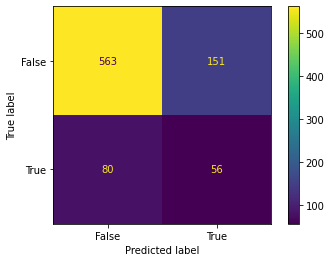

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7282352941176471

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.27053140096618356

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.4117647058823529

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.788515406162465

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.32653061224489793

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7282352941176471, 'Precision': 0.27053140096618356, 'Sensitivity_recall': 0.4117647058823529, 'Specificity': 0.788515406162465, 'F1_score': 0.32653061224489793}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1     33  58.928571     -1
 1      4   7.142857      1
 8      4   7.142857      8
 0      3   5.357143      0
 16     2   3.571429     16
 12     2   3.571429     12
 22     1   1.785714     22
 7      1   1.785714      7
 6      1   1.785714      6
 5      1   1.785714      5
 3      1   1.785714      3
 2      1   1.785714      2
 17     1   1.785714     17
 20     1   1.785714     20

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1     79  52.317881     -1
 1     17  11.258278      1
 0     14   9.271523      0
 12     8   5.298013     12
 8      5   3.311258      8
 5      4   2.649007      5
 4      4   2.649007      4
 6      3   1.986755      6
 2      3   1.986755      2
 24     2   1.324503     24
 17     2   1.324503     17
 16     2   1.324503     16
 3      1   0.662252      3
 14     1   0.662252     14
 13     1   0.662252     13
 7      1   0.662252      7
 30     1   0.662252     30
 15     1   0.662252     15
 25     1   0.662252     25
 33     1   0.662252     33

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1    250  44.404973     -1
 0    124  22.024867      0
 1     75  13.321492      1
 5     18   3.197158      5
 12    18   3.197158     12
 4     12   2.131439      4
 3      9   1.598579      3
 24     6   1.065719     24
 7      6   1.065719      7
 8      5   0.888099      8
 9      4   0.710480      9
 14     4   0.710480     14
 17     4   0.710480     17
 2      4   0.710480      2
 11     3   0.532860     11
 22     2   0.355240     22
 19     2   0.355240     19
 21     2   0.355240     21
 27     2   0.355240     27
 25     2   0.355240     25
 6      2   0.355240      6
 10     2   0.355240     10
 15     2   0.355240     15
 23     1   0.177620     23
 13     1   0.177620     13
 29     1   0.177620     29
 34     1   0.177620     34
 16     1   0.177620     16

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred  percent  Topic
-1     44    55.00     -1
 1     13    16.25      1
 24     3     3.75     24
 8      3     3.75      8
 2      3     3.75      2
 16     2     2.50     16
 0      2     2.50      0
 4      2     2.50      4
 15     1     1.25     15
 14     1     1.25     14
 21     1     1.25     21
 12     1     1.25     12
 7      1     1.25      7
 6      1     1.25      6
 22     1     1.25     22
 11     1     1.25     11

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predH19TP  \
0      -1                           -1_heute_geht_immer_gibt      33.0   
1       0                            0_uhr_danke_woche_heute       3.0   
2       1            1_deutschland_deutsche_deutschen_berlin       4.0   
3       2                    2_nazis_nazi_neonazis_holocaust       1.0   
4       3                   3_tweet_twitter_twittern_stegner       1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...         0   
6       5                             5_geld_bezahlt_job_gut       1.0   
7       6                      6_wolf_binsenwombats_hund_rum       1.0   
8       7      7_medien_journalisten_propaganda_journalismus       1.0   
9       8                     8_islam_muslime_afd_islamismus       4.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel         0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       2.0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust       2.0   
18     17                17_grünen_grüne_entsorgung_ökostrom       1.0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire       1.0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus       1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato         0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    58.93      79.0   52.32     250.0   44.40      44.0   55.00  
1     5.36      14.0    9.27     124.0   22.02       2.0    2.50  
2     7.14      17.0   11.26      75.0   13.32      13.0   16.25  
3     1.79       3.0    1.99       4.0    0.71       3.0    3.75  
4     1.79       1.0    0.66       9.0    1.60         0    0.00  
5     0.00       4.0    2.65      12.0    2.13       2.0    2.50  
6     1.79       4.0    2.65      18.0    3.20         0    0.00  
7     1.79       3.0    1.99       2.0    0.36       1.0    1.25  
8     1.79       1.0    0.66       6.0    1.07       1.0    1.25  
9     7.14       5.0    3.31       5.0    0.89       3.0    3.75  
10    0.00         0    0.00       4.0    0.71         0    0.00  
11    0.00         0    0.00       2.0    0.36         0    0.00  
12    0.00         0    0.00       3.0    0.53       1.0    1.25  
13    3.57       8.0    5.30      18.0    3.20       1.0    1.25  
14    0.00       1.0    0.66       1.0    0.18         0    0.00  
15    0.00       1.0    0.66       4.0    0.71       1.0    1.25  
16    0.00       1.0    0.66       2.0    0.36       1.0    1.25  
17    3.57       2.0    1.32       1.0    0.18       2.0   

In [ ]:
df_merged

Topic                                               Name predH19TP  \
0      -1                           -1_heute_geht_immer_gibt      33.0   
1       0                            0_uhr_danke_woche_heute       3.0   
2       1            1_deutschland_deutsche_deutschen_berlin       4.0   
3       2                    2_nazis_nazi_neonazis_holocaust       1.0   
4       3                   3_tweet_twitter_twittern_stegner       1.0   
5       4  4_politik_sozialistische_sozialistischen_demok...         0   
6       5                             5_geld_bezahlt_job_gut       1.0   
7       6                      6_wolf_binsenwombats_hund_rum       1.0   
8       7      7_medien_journalisten_propaganda_journalismus       1.0   
9       8                     8_islam_muslime_afd_islamismus       4.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel         0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       2.0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust       2.0   
18     17                17_grünen_grüne_entsorgung_ökostrom       1.0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire       1.0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus       1.0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato         0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    58.93      79.0   52.32     250.0   44.40      44.0   55.00  
1     5.36      14.0    9.27     124.0   22.02       2.0    2.50  
2     7.14      17.0   11.26      75.0   13.32      13.0   16.25  
3     1.79       3.0    1.99       4.0    0.71       3.0    3.75  
4     1.79       1.0    0.66       9.0    1.60         0    0.00  
5     0.00       4.0    2.65      12.0    2.13       2.0    2.50  
6     1.79       4.0    2.65      18.0    3.20         0    0.00  
7     1.79       3.0    1.99       2.0    0.36       1.0    1.25  
8     1.79       1.0    0.66       6.0    1.07       1.0    1.25  
9     7.14       5.0    3.31       5.0    0.89       3.0    3.75  
10    0.00         0    0.00       4.0    0.71         0    0.00  
11    0.00         0    0.00       2.0    0.36         0    0.00  
12    0.00         0    0.00       3.0    0.53       1.0    1.25  
13    3.57       8.0    5.30      18.0    3.20       1.0    1.25  
14    0.00       1.0    0.66       1.0    0.18         0    0.00  
15    0.00       1.0    0.66       4.0    0.71       1.0    1.25  
16    0.00       1.0    0.66       2.0    0.36       1.0    1.25  
17    3.57       2.0    1.32       1.0    0.18       2.0   

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                               Name  predH19TP  \
0      -1                           -1_heute_geht_immer_gibt         33   
1       0                            0_uhr_danke_woche_heute          3   
2       1            1_deutschland_deutsche_deutschen_berlin          4   
3       2                    2_nazis_nazi_neonazis_holocaust          1   
4       3                   3_tweet_twitter_twittern_stegner          1   
5       4  4_politik_sozialistische_sozialistischen_demok...          0   
6       5                             5_geld_bezahlt_job_gut          1   
7       6                      6_wolf_binsenwombats_hund_rum          1   
8       7      7_medien_journalisten_propaganda_journalismus          1   
9       8                     8_islam_muslime_afd_islamismus          4   
10      9                        9_kamera_blog_photo_kameras          0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel          0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose          2   
14     13                     13_niemand_niemanden_bunt_null          0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression          0   
17     16                      16_rassisten_ffe_rassist_hust          2   
18     17                17_grünen_grüne_entsorgung_ökostrom          1   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire          1   
22     21              21_türkei_kurdischen_türken_türkische          0   
23     22                     22_religion_kirche_leben_jesus          1   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          0   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser          0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl          0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %H19TP  predH19FP  %H19FP  predH19TN  %H19TN  predH19FN  %H19FN  
0    58.93         79   52.32        250   44.40         44   55.00  
1     5.36         14    9.27        124   22.02          2    2.50  
2     7.14         17   11.26         75   13.32         13   16.25  
3     1.79          3    1.99          4    0.71          3    3.75  
4     1.79          1    0.66          9    1.60          0    0.00  
5     0.00          4    2.65         12    2.13          2    2.50  
6     1.79          4    2.65         18    3.20          0    0.00  
7     1.79          3    1.99          2    0.36          1    1.25  
8     1.79          1    0.66          6    1.07          1    1.25  
9     7.14          5    3.31          5    0.89          3    3.75  
10    0.00          0    0.00          4    0.71          0    0.00  
11    0.00          0    0.00          2    0.36          0    0.00  
12    0.00          0    0.00          3    0.53          1    1.25  
13    3.57          8    5.30         18    3.20          1    1.25  
14    0.00          1    0.66          1    0.18          0    0.00  
15    0.00          1    0.66          4    0.71          1    1.25  
16    0.00          1    0.66         

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0      -1   58.93   44.40   52.32   55.00   
1       0    5.36   22.02    9.27    2.50   
2       1    7.14   13.32   11.26   16.25   
3       2    1.79    0.71    1.99    3.75   
4       3    1.79    1.60    0.66    0.00   
5       4    0.00    2.13    2.65    2.50   
6       5    1.79    3.20    2.65    0.00   
7       6    1.79    0.36    1.99    1.25   
8       7    1.79    1.07    0.66    1.25   
9       8    7.14    0.89    3.31    3.75   
10      9    0.00    0.71    0.00    0.00   
11     10    0.00    0.36    0.00    0.00   
12     11    0.00    0.53    0.00    1.25   
13     12    3.57    3.20    5.30    1.25   
14     13    0.00    0.18    0.66    0.00   
15     14    0.00    0.71    0.66    1.25   
16     15    0.00    0.36    0.66    1.25   
17     16    3.57    0.18    1.32    2.50   
18     17    1.79    0.71    1.32    0.00   
19     18    0.00    0.00    0.00    0.00   
20     19    0.00    0.36    0.00    0.00   
21     20    1.79    0.00    0.00    0.00   
22     21    0.00    0.36    0.00    1.25   
23     22    1.79    0.36    0.00    1.25   
24     23    0.00    0.18    0.00    0.00   
25     24    0.00    1.07    1.32    3.75   
26     25    0.00    0.36    0.66    0.00   
27     26    0.00    0.00    0.00    0.00   
28     27    0.00    0.36    0.00    0.00   
29     28    0.00    0.00    0.00    0.00   
30     29    0.00    0.18    0.00    0.00   
31     30    0.00    0.00    0.66    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.00    0.00    0.00   
34     33    0.00    0.00    0.66    0.00   
35     34    0.00    0.18    0.00    0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

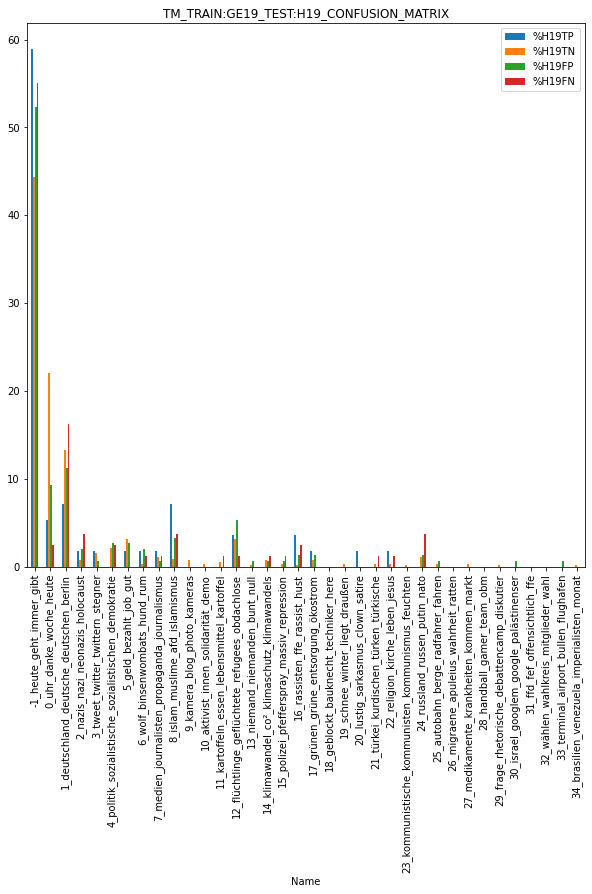

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

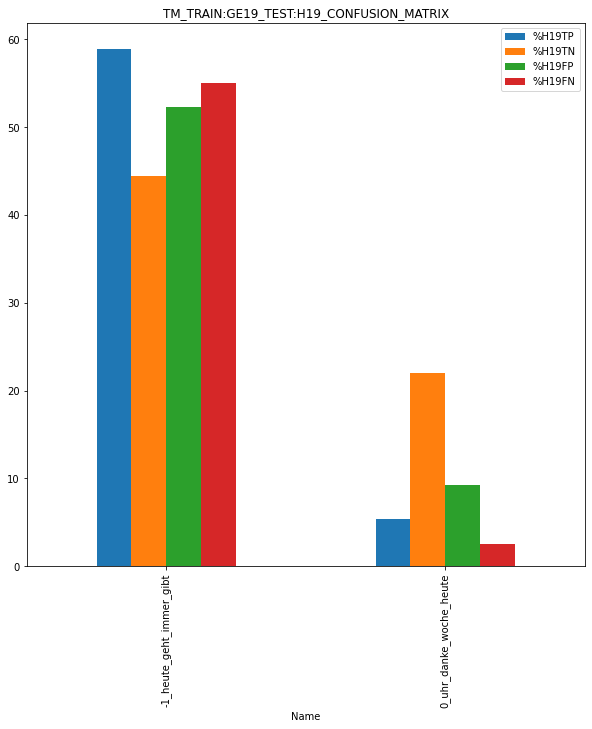

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

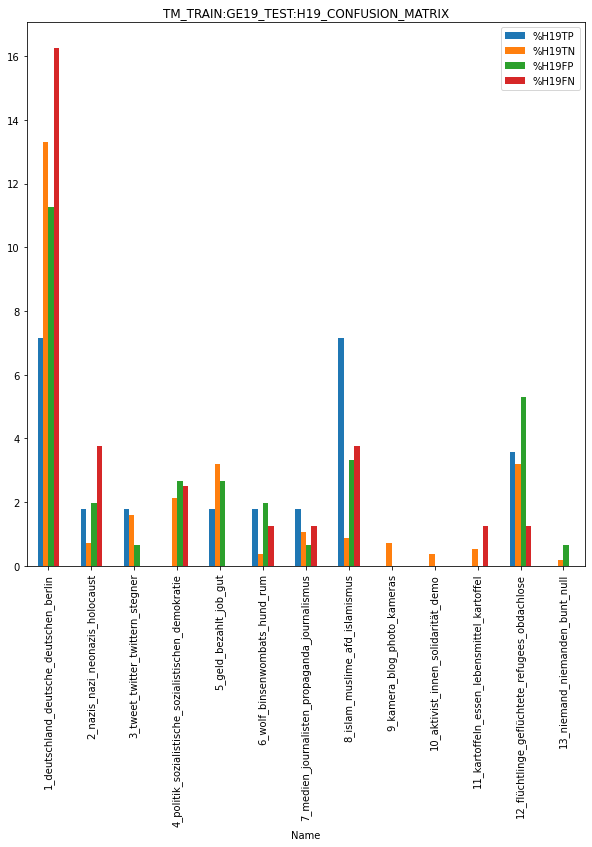

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

In [ ]:
#test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE19_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_ge19_class_h20 = pd.read_csv('/content/NSIT_Train_GERMEVAL2019_Test_HASOC2020_Task_A_submission_DE_A.csv')
train_ge19_class_h20

task1
0        1
1        0
2        1
3        1
4        1
..     ...
521      1
522      0
523      1
524      1
525      1

[526 rows x 1 columns]

In [ ]:
train_ge19_class_h20['task1'] = train_ge19_class_h20['task1'].map({0: 1, 1: 0}).astype(int)
train_ge19_class_h20

task1
0        0
1        1
2        0
3        0
4        0
..     ...
521      0
522      1
523      0
524      0
525      0

[526 rows x 1 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_ge19_class_h20['task1'].value_counts())
h20_test_class_values

task1
0    309
1    217

In [ ]:

h20_test_raw['class'] = train_ge19_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    10      0               0                  0  
1     hasoc_2020_de_671     0      1               0                  0  
2    hasoc_2020_de_2977    -1      0               0                  0  
3    hasoc_2020_de_1746    -1      0               0                  0  
4    hasoc_2020_de_2416    -1      0               0                  0  
..                  ...   ...    ...             ...                ...  
521   hasoc_2020_de_486    -1      0               0                  0  
522  hasoc_2020_de_3388    17      1               0                  0  
523  hasoc_2020_de_2745    -1      0               0                  0  
524   hasoc_2020_de_236    -1      0               0                  1  
525  hasoc_2020_de_2850    17      0               0                  0  

[526 rows x 10 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 1)]
h20_test_true_pos

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
21           21  1134130242786926592   
22           22  1134444350027509766   
24           24  1124210944534614016   
25           25  1131517942175289344   
..          ...                  ...   
492         492  1130047717005242371   
497         497  1134619244107370496   
500         500  1128321203075256320   
511         511  1130096161212252162   
512         512  1124842568972288000   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
25   RT @Symon634: Ich ficke deine enkeltochter du ...   HOF  PRFN   
..                                                 ...   ...   ...   
492  @Ralf_Stegner obacht ralle!\ndumm und korrupt ...   HOF  HATE   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
5    hasoc_2020_de_1112    -1      1               1                  1  
21   hasoc_2020_de_1235    -1      1               1                  1  
22   hasoc_2020_de_2487    -1      1               1                  1  
24   hasoc_2020_de_1691     0      1               1                  0  
25   hasoc_2020_de_2382    -1      1               1                  1  
..                  ...   ...    ...             ...                ...  
492  hasoc_2020_de_2676    -1      1               1                  1  
497  hasoc_2020_de_1606    -1      1               1                  0  
500  hasoc_2020_de_1958     0      1               1                  0  
511   hasoc_2020_de_958    -1      1               1                  1  
512  hasoc_2020_de_2470    -1      1               1                  1  

[95 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred    percent
-1     49  51.578947
 0     16  16.842105
 1     11  11.578947
 17     4   4.210526
 6      4   4.210526
 24     2   2.105263
 5      2   2.105263
 11     2   2.105263
 12     2   2.105263
 2      1   1.052632
 4      1   1.052632
 8      1   1.052632

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 1)]
h20_test_false_pos

Unnamed: 0             tweet_id  \
1             1  1129004308396236800   
7             7  1124978296628961287   
8             8  1129473948813541376   
9             9  1131048922527424512   
10           10  1125872002147991553   
..          ...                  ...   
484         484  1125029332949315584   
509         509  1124686842840981505   
514         514  1127595013867745290   
519         519  1131124025734979586   
522         522  1132433240000798720   

                                                  text task1 task2  \
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
7    Da war #SPD #Kuehnert und am Ende auch #Nahles...   NOT  NONE   
8    Nazan, komm bittebitte zurück, löse die „Pungg...   NOT  NONE   
9    RT @Junge_Freiheit: Die europäische Spitzenkan...   NOT  NONE   
10   @mknhofheim @Backstage0000 @Graubaer1953 @DDur...   NOT  NONE   
..                                                 ...   ...   ...   
484  RT @AndreasAndy3131: DIE LINKE. Sachsen begrüß...   NOT  NONE   
509  Heute nichts neues, keine Lügen, nichts über d...   NOT  NONE   
514       https://t.co/zeG1NZTFnn\n\nMerkel muss weg !   NOT  NONE   
519  @GaramSalami @graf_persephone Denk ich mir jed...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
1     hasoc_2020_de_671     0      1               0                  0  
7    hasoc_2020_de_2205     0      1               0                  1  
8     hasoc_2020_de_387    -1      1               0                  0  
9     hasoc_2020_de_459     1      1               0                  0  
10    hasoc_2020_de_584    -1      1               0                  0  
..                  ...   ...    ...             ...                ...  
484  hasoc_2020_de_2723    -1      1               0                  0  
509   hasoc_2020_de_248    -1      1               0                  1  
514    hasoc_2020_de_88     0      1               0                  0  
519  hasoc_2020_de_1295    -1      1               0                  1  
522  hasoc_2020_de_3388    17      1               0                  0  

[122 rows x 10 columns]

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1     55  45.081967
 0     31  25.409836
 1     11   9.016393
 8      7   5.737705
 17     7   5.737705
 2      4   3.278689
 20     2   1.639344
 5      2   1.639344
 11     1   0.819672
 34     1   0.819672
 7      1   0.819672

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 0)]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
12           12  1124265143335104512   
..          ...                  ...   
520         520  1123589659047731201   
521         521  1124809878546128897   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
12   @monsieur_belier @swiftxcited @arsenal_lady Sc...   NOT  NONE   
..                                                 ...   ...   ...   
520        Einfach einladend 😉 https://t.co/kRHAoshmxY   NOT  NONE   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    10      0               0                  0  
2    hasoc_2020_de_2977    -1      0               0                  0  
3    hasoc_2020_de_1746    -1      0               0                  0  
4    hasoc_2020_de_2416    -1      0               0                  0  
12    hasoc_2020_de_478     0      0               0                  0  
..                  ...   ...    ...             ...                ...  
520  hasoc_2020_de_2794    -1      0               0                  0  
521   hasoc_2020_de_486    -1      0               0                  0  
523  hasoc_2020_de_2745    -1      0               0                  0  
524   hasoc_2020_de_236    -1      0               0                  1  
525  hasoc_2020_de_2850    17      0               0                  0  

[243 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1    119  48.971193
 0     51  20.987654
 1     26  10.699588
 17    15   6.172840
 2      8   3.292181
 5      4   1.646091
 21     3   1.234568
 11     3   1.234568
 8      3   1.234568
 6      1   0.411523
 22     1   0.411523
 12     1   0.411523
 18     1   0.411523
 13     1   0.411523
 10     1   0.411523
 16     1   0.411523
 4      1   0.411523
 14     1   0.411523
 3      1   0.411523
 25     1   0.411523

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 0)]
h20_test_false_neg

Unnamed: 0             tweet_id  \
6             6  1123981478361219073   
17           17  1126089577486323712   
32           32  1134408971081703424   
42           42  1128423510513111041   
50           50  1127069622761603073   
..          ...                  ...   
486         486  1128516649236217856   
496         496  1131274676741836800   
498         498  1129818645109116928   
508         508  1129379774076473344   
517         517  1124379312264708101   

                                                  text task1 task2  \
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
32   @Saufkumpel_ Ich kann andere als Hurensohn bet...   HOF  PRFN   
42   RT @DeutscheAmateu1: https://t.co/1A0inJfZzr  ...   HOF  PRFN   
50   Es pisst schon wieder in strömen, zum kotzen, ...   HOF  PRFN   
..                                                 ...   ...   ...   
486  @MaXXXPorco @bareholebitch So  ein  Riesen Toy...   HOF  PRFN   
496  RT @can65schalke: „Göt“ ist türkisch und heißt...   HOF  PRFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   
508                       Halt die fresse du hurensohn   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
6    hasoc_2020_de_2938    -1      0               1                  1  
17   hasoc_2020_de_2545    -1      0               1                  0  
32   hasoc_2020_de_2121    -1      0               1                  0  
42   hasoc_2020_de_1603    -1      0               1                  0  
50   hasoc_2020_de_3254    -1      0               1                  0  
..                  ...   ...    ...             ...                ...  
486  hasoc_2020_de_1068     6      0               1                  1  
496  hasoc_2020_de_1993    21      0               1                  0  
498  hasoc_2020_de_2580    17      0               1                  0  
508  hasoc_2020_de_2465    -1      0               1                  1  
517   hasoc_2020_de_986    -1      0               1                  0  

[66 rows x 10 columns]

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1     38  57.575758
 0      9  13.636364
 11     4   6.060606
 1      3   4.545455
 6      3   4.545455
 9      1   1.515152
 3      1   1.515152
 8      1   1.515152
 12     1   1.515152
 27     1   1.515152
 2      1   1.515152
 5      1   1.515152
 21     1   1.515152
 17     1   1.515152

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].astype(int)


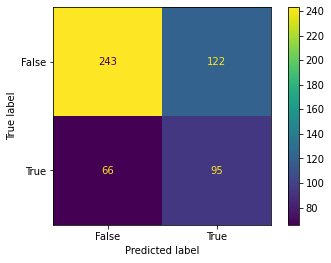

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6425855513307985

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.4377880184331797

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.5900621118012422

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.6657534246575343

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.5026455026455027

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6425855513307985, 'Precision': 0.4377880184331797, 'Sensitivity_recall': 0.5900621118012422, 'Specificity': 0.6657534246575343, 'F1_score': 0.5026455026455027}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge19_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1                           -1_heute_geht_immer_gibt
1       0                            0_uhr_danke_woche_heute
2       1            1_deutschland_deutsche_deutschen_berlin
3       2                    2_nazis_nazi_neonazis_holocaust
4       3                   3_tweet_twitter_twittern_stegner
5       4  4_politik_sozialistische_sozialistischen_demok...
6       5                             5_geld_bezahlt_job_gut
7       6                      6_wolf_binsenwombats_hund_rum
8       7      7_medien_journalisten_propaganda_journalismus
9       8                     8_islam_muslime_afd_islamismus
10      9                        9_kamera_blog_photo_kameras
11     10                 10_aktivist_innen_solidarität_demo
12     11         11_kartoffeln_essen_lebensmittel_kartoffel
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose
14     13                     13_niemand_niemanden_bunt_null
15     14        14_klimawandel_co²_klimaschutz_klimawandels
16     15          15_polizei_pfefferspray_massiv_repression
17     16                      16_rassisten_ffe_rassist_hust
18     17                17_grünen_grüne_entsorgung_ökostrom
19     18               18_geblockt_bauknecht_techniker_here
20     19                     19_schnee_winter_liegt_draußen
21     20                   20_lustig_sarkasmus_clown_satire
22     21              21_türkei_kurdischen_türken_türkische
23     22                     22_religion_kirche_leben_jesus
24     23  23_kommunistische_kommunisten_kommunismus_feuc...
25     24                      24_russland_russen_putin_nato
26     25                 25_autobahn_berge_radfahrer_fahren
27     26               26_migraene_apuleius_wahrheit_ratten
28     27            27_medikamente_krankheiten_kommen_markt
29     28                         28_handball_gamer_team_obm
30     29        29_frage_rhetorische_debattencamp_diskutier
31     30             30_israel_googlem_google_palästinenser
32     31                      31_ffd_fef_offensichtlich_ffe
33     32                32_wählen_wahlkreis_mitglieder_wahl
34     33               33_terminal_airport_bullen_flughafen
35     34         34_brasilien_venezuela_imperialisten_monat

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred    percent  Topic
-1     49  51.578947     -1
 0     16  16.842105      0
 1     11  11.578947      1
 17     4   4.210526     17
 6      4   4.210526      6
 24     2   2.105263     24
 5      2   2.105263      5
 11     2   2.105263     11
 12     2   2.105263     12
 2      1   1.052632      2
 4      1   1.052632      4
 8      1   1.052632      8

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1     55  45.081967     -1
 0     31  25.409836      0
 1     11   9.016393      1
 8      7   5.737705      8
 17     7   5.737705     17
 2      4   3.278689      2
 20     2   1.639344     20
 5      2   1.639344      5
 11     1   0.819672     11
 34     1   0.819672     34
 7      1   0.819672      7

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1    119  48.971193     -1
 0     51  20.987654      0
 1     26  10.699588      1
 17    15   6.172840     17
 2      8   3.292181      2
 5      4   1.646091      5
 21     3   1.234568     21
 11     3   1.234568     11
 8      3   1.234568      8
 6      1   0.411523      6
 22     1   0.411523     22
 12     1   0.411523     12
 18     1   0.411523     18
 13     1   0.411523     13
 10     1   0.411523     10
 16     1   0.411523     16
 4      1   0.411523      4
 14     1   0.411523     14
 3      1   0.411523      3
 25     1   0.411523     25

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1     38  57.575758     -1
 0      9  13.636364      0
 11     4   6.060606     11
 1      3   4.545455      1
 6      3   4.545455      6
 9      1   1.515152      9
 3      1   1.515152      3
 8      1   1.515152      8
 12     1   1.515152     12
 27     1   1.515152     27
 2      1   1.515152      2
 5      1   1.515152      5
 21     1   1.515152     21
 17     1   1.515152     17

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                               Name predH20TP  \
0      -1                           -1_heute_geht_immer_gibt      49.0   
1       0                            0_uhr_danke_woche_heute      16.0   
2       1            1_deutschland_deutsche_deutschen_berlin      11.0   
3       2                    2_nazis_nazi_neonazis_holocaust       1.0   
4       3                   3_tweet_twitter_twittern_stegner         0   
5       4  4_politik_sozialistische_sozialistischen_demok...       1.0   
6       5                             5_geld_bezahlt_job_gut       2.0   
7       6                      6_wolf_binsenwombats_hund_rum       4.0   
8       7      7_medien_journalisten_propaganda_journalismus         0   
9       8                     8_islam_muslime_afd_islamismus       1.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel       2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       2.0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust         0   
18     17                17_grünen_grüne_entsorgung_ökostrom       4.0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire         0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus         0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato       2.0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0    51.58      55.0   45.08     119.0   48.97      38.0   57.58  
1    16.84      31.0   25.41      51.0   20.99       9.0   13.64  
2    11.58      11.0    9.02      26.0   10.70       3.0    4.55  
3     1.05       4.0    3.28       8.0    3.29       1.0    1.52  
4     0.00         0    0.00       1.0    0.41       1.0    1.52  
5     1.05         0    0.00       1.0    0.41         0    0.00  
6     2.11       2.0    1.64       4.0    1.65       1.0    1.52  
7     4.21         0    0.00       1.0    0.41       3.0    4.55  
8     0.00       1.0    0.82         0    0.00         0    0.00  
9     1.05       7.0    5.74       3.0    1.23       1.0    1.52  
10    0.00         0    0.00         0    0.00       1.0    1.52  
11    0.00         0    0.00       1.0    0.41         0    0.00  
12    2.11       1.0    0.82       3.0    1.23       4.0    6.06  
13    2.11         0    0.00       1.0    0.41       1.0    1.52  
14    0.00         0    0.00       1.0    0.41         0    0.00  
15    0.00         0    0.00       1.0    0.41         0    0.00  
16    0.00         0    0.00         0    0.00         0    0.00  
17    0.00         0    0.00       1.0    0.41         0   

In [ ]:
df_merged

Topic                                               Name predH20TP  \
0      -1                           -1_heute_geht_immer_gibt      49.0   
1       0                            0_uhr_danke_woche_heute      16.0   
2       1            1_deutschland_deutsche_deutschen_berlin      11.0   
3       2                    2_nazis_nazi_neonazis_holocaust       1.0   
4       3                   3_tweet_twitter_twittern_stegner         0   
5       4  4_politik_sozialistische_sozialistischen_demok...       1.0   
6       5                             5_geld_bezahlt_job_gut       2.0   
7       6                      6_wolf_binsenwombats_hund_rum       4.0   
8       7      7_medien_journalisten_propaganda_journalismus         0   
9       8                     8_islam_muslime_afd_islamismus       1.0   
10      9                        9_kamera_blog_photo_kameras         0   
11     10                 10_aktivist_innen_solidarität_demo         0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel       2.0   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose       2.0   
14     13                     13_niemand_niemanden_bunt_null         0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels         0   
16     15          15_polizei_pfefferspray_massiv_repression         0   
17     16                      16_rassisten_ffe_rassist_hust         0   
18     17                17_grünen_grüne_entsorgung_ökostrom       4.0   
19     18               18_geblockt_bauknecht_techniker_here         0   
20     19                     19_schnee_winter_liegt_draußen         0   
21     20                   20_lustig_sarkasmus_clown_satire         0   
22     21              21_türkei_kurdischen_türken_türkische         0   
23     22                     22_religion_kirche_leben_jesus         0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...         0   
25     24                      24_russland_russen_putin_nato       2.0   
26     25                 25_autobahn_berge_radfahrer_fahren         0   
27     26               26_migraene_apuleius_wahrheit_ratten         0   
28     27            27_medikamente_krankheiten_kommen_markt         0   
29     28                         28_handball_gamer_team_obm         0   
30     29        29_frage_rhetorische_debattencamp_diskutier         0   
31     30             30_israel_googlem_google_palästinenser         0   
32     31                      31_ffd_fef_offensichtlich_ffe         0   
33     32                32_wählen_wahlkreis_mitglieder_wahl         0   
34     33               33_terminal_airport_bullen_flughafen         0   
35     34         34_brasilien_venezuela_imperialisten_monat         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0    51.58      55.0   45.08     119.0   48.97      38.0   57.58  
1    16.84      31.0   25.41      51.0   20.99       9.0   13.64  
2    11.58      11.0    9.02      26.0   10.70       3.0    4.55  
3     1.05       4.0    3.28       8.0    3.29       1.0    1.52  
4     0.00         0    0.00       1.0    0.41       1.0    1.52  
5     1.05         0    0.00       1.0    0.41         0    0.00  
6     2.11       2.0    1.64       4.0    1.65       1.0    1.52  
7     4.21         0    0.00       1.0    0.41       3.0    4.55  
8     0.00       1.0    0.82         0    0.00         0    0.00  
9     1.05       7.0    5.74       3.0    1.23       1.0    1.52  
10    0.00         0    0.00         0    0.00       1.0    1.52  
11    0.00         0    0.00       1.0    0.41         0    0.00  
12    2.11       1.0    0.82       3.0    1.23       4.0    6.06  
13    2.11         0    0.00       1.0    0.41       1.0    1.52  
14    0.00         0    0.00       1.0    0.41         0    0.00  
15    0.00         0    0.00       1.0    0.41         0    0.00  
16    0.00         0    0.00         0    0.00         0    0.00  
17    0.00         0    0.00       1.0    0.41         0   

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                               Name  predH20TP  \
0      -1                           -1_heute_geht_immer_gibt         49   
1       0                            0_uhr_danke_woche_heute         16   
2       1            1_deutschland_deutsche_deutschen_berlin         11   
3       2                    2_nazis_nazi_neonazis_holocaust          1   
4       3                   3_tweet_twitter_twittern_stegner          0   
5       4  4_politik_sozialistische_sozialistischen_demok...          1   
6       5                             5_geld_bezahlt_job_gut          2   
7       6                      6_wolf_binsenwombats_hund_rum          4   
8       7      7_medien_journalisten_propaganda_journalismus          0   
9       8                     8_islam_muslime_afd_islamismus          1   
10      9                        9_kamera_blog_photo_kameras          0   
11     10                 10_aktivist_innen_solidarität_demo          0   
12     11         11_kartoffeln_essen_lebensmittel_kartoffel          2   
13     12     12_flüchtlinge_geflüchtete_refugees_obdachlose          2   
14     13                     13_niemand_niemanden_bunt_null          0   
15     14        14_klimawandel_co²_klimaschutz_klimawandels          0   
16     15          15_polizei_pfefferspray_massiv_repression          0   
17     16                      16_rassisten_ffe_rassist_hust          0   
18     17                17_grünen_grüne_entsorgung_ökostrom          4   
19     18               18_geblockt_bauknecht_techniker_here          0   
20     19                     19_schnee_winter_liegt_draußen          0   
21     20                   20_lustig_sarkasmus_clown_satire          0   
22     21              21_türkei_kurdischen_türken_türkische          0   
23     22                     22_religion_kirche_leben_jesus          0   
24     23  23_kommunistische_kommunisten_kommunismus_feuc...          0   
25     24                      24_russland_russen_putin_nato          2   
26     25                 25_autobahn_berge_radfahrer_fahren          0   
27     26               26_migraene_apuleius_wahrheit_ratten          0   
28     27            27_medikamente_krankheiten_kommen_markt          0   
29     28                         28_handball_gamer_team_obm          0   
30     29        29_frage_rhetorische_debattencamp_diskutier          0   
31     30             30_israel_googlem_google_palästinenser          0   
32     31                      31_ffd_fef_offensichtlich_ffe          0   
33     32                32_wählen_wahlkreis_mitglieder_wahl          0   
34     33               33_terminal_airport_bullen_flughafen          0   
35     34         34_brasilien_venezuela_imperialisten_monat          0   

    %H20TP  predH20FP  %H20FP  predH20TN  %H20TN  predH20FN  %H20FN  
0    51.58         55   45.08        119   48.97         38   57.58  
1    16.84         31   25.41         51   20.99          9   13.64  
2    11.58         11    9.02         26   10.70          3    4.55  
3     1.05          4    3.28          8    3.29          1    1.52  
4     0.00          0    0.00          1    0.41          1    1.52  
5     1.05          0    0.00          1    0.41          0    0.00  
6     2.11          2    1.64          4    1.65          1    1.52  
7     4.21          0    0.00          1    0.41          3    4.55  
8     0.00          1    0.82          0    0.00          0    0.00  
9     1.05          7    5.74          3    1.23          1    1.52  
10    0.00          0    0.00          0    0.00          1    1.52  
11    0.00          0    0.00          1    0.41          0    0.00  
12    2.11          1    0.82          3    1.23          4    6.06  
13    2.11          0    0.00          1    0.41          1    1.52  
14    0.00          0    0.00          1    0.41          0    0.00  
15    0.00          0    0.00          1    0.41          0    0.00  
16    0.00          0    0.00         

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0      -1   51.58   48.97   45.08   57.58   
1       0   16.84   20.99   25.41   13.64   
2       1   11.58   10.70    9.02    4.55   
3       2    1.05    3.29    3.28    1.52   
4       3    0.00    0.41    0.00    1.52   
5       4    1.05    0.41    0.00    0.00   
6       5    2.11    1.65    1.64    1.52   
7       6    4.21    0.41    0.00    4.55   
8       7    0.00    0.00    0.82    0.00   
9       8    1.05    1.23    5.74    1.52   
10      9    0.00    0.00    0.00    1.52   
11     10    0.00    0.41    0.00    0.00   
12     11    2.11    1.23    0.82    6.06   
13     12    2.11    0.41    0.00    1.52   
14     13    0.00    0.41    0.00    0.00   
15     14    0.00    0.41    0.00    0.00   
16     15    0.00    0.00    0.00    0.00   
17     16    0.00    0.41    0.00    0.00   
18     17    4.21    6.17    5.74    1.52   
19     18    0.00    0.41    0.00    0.00   
20     19    0.00    0.00    0.00    0.00   
21     20    0.00    0.00    1.64    0.00   
22     21    0.00    1.23    0.00    1.52   
23     22    0.00    0.41    0.00    0.00   
24     23    0.00    0.00    0.00    0.00   
25     24    2.11    0.00    0.00    0.00   
26     25    0.00    0.41    0.00    0.00   
27     26    0.00    0.00    0.00    0.00   
28     27    0.00    0.00    0.00    1.52   
29     28    0.00    0.00    0.00    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.00    0.00    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.00    0.00    0.00   
34     33    0.00    0.00    0.00    0.00   
35     34    0.00    0.00    0.82    0.00   

                                                 Name  
0                            -1_heute_geht_immer_gibt  
1                             0_uhr_danke_woche_heute  
2             1_deutschland_deutsche_deutschen_berlin  
3                     2_nazis_nazi_neonazis_holocaust  
4                    3_tweet_twitter_twittern_stegner  
5   4_politik_sozialistische_sozialistischen_demok...  
6                              5_geld_bezahlt_job_gut  
7                       6_wolf_binsenwombats_hund_rum  
8       7_medien_journalisten_propaganda_journalismus  
9                      8_islam_muslime_afd_islamismus  
10                        9_kamera_blog_photo_kameras  
11                 10_aktivist_innen_solidarität_demo  
12         11_kartoffeln_essen_lebensmittel_kartoffel  
13     12_flüchtlinge_geflüchtete_refugees_obdachlose  
14                     13_niemand_niemanden_bunt_null  
15        14_klimawandel_co²_klimaschutz_klimawandels  
16          15_polizei_pfefferspray_massiv_repression  
17                      16_rassisten_ffe_rassist_hust  
18                17_grünen_grüne_entsorgung_ökostrom  
19               18_geblockt_bauknecht_techniker_here  
20                     19_schnee_winter_liegt_draußen  
21                   20_lustig_sarkasmus_clown_satire  
22              21_türkei_kurdischen_türken_türkische  
23                     22_religion_kirche_leben_jesus  
24  23_kommunistische_kommunisten_kommunismus_feuc...  
25                      24_russland_russen_putin_nato  
26                 25_autobahn_berge_radfahrer_fahren  
27               26_migraene_apuleius_wahrheit_ratten  
28            27_medikamente_krankheiten_kommen_markt  
29                         28_handball_gamer_team_obm  
30        29_frage_rhetorische_debattencamp_diskutier  
31             30_israel_googlem_google_palästinenser  
32                      31_ffd_fef_offensichtlich_ffe  
33                32_wählen_wahlkreis_mitglieder_wahl  
34               33_terminal_airport_bullen_flughafen  
35         34_brasilien_venezuela_imperialisten_monat

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

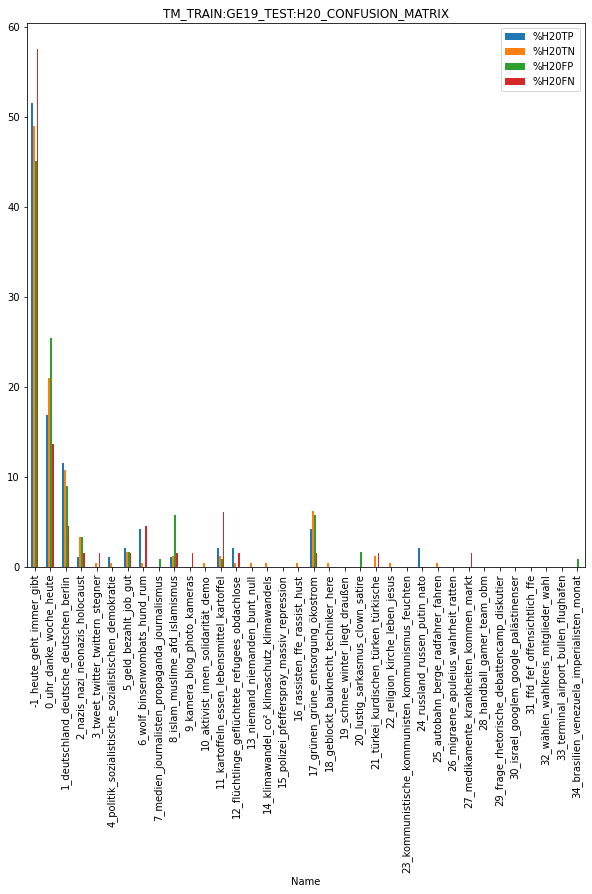

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

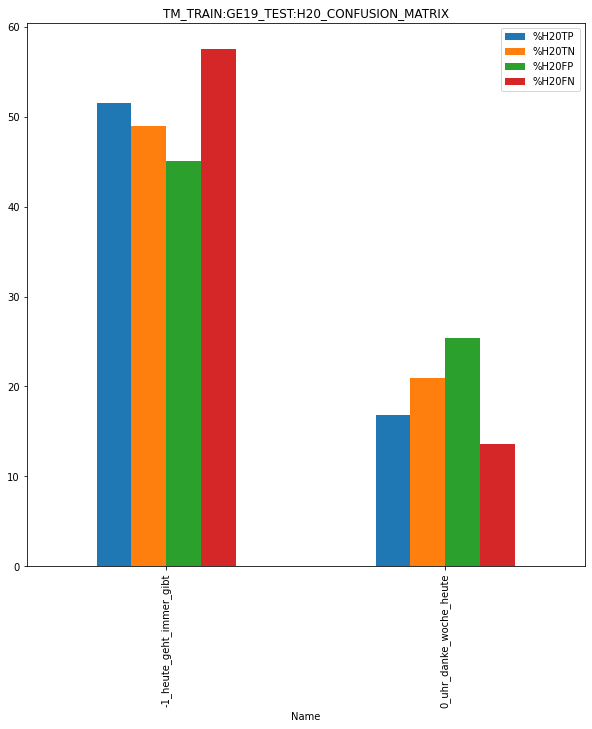

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

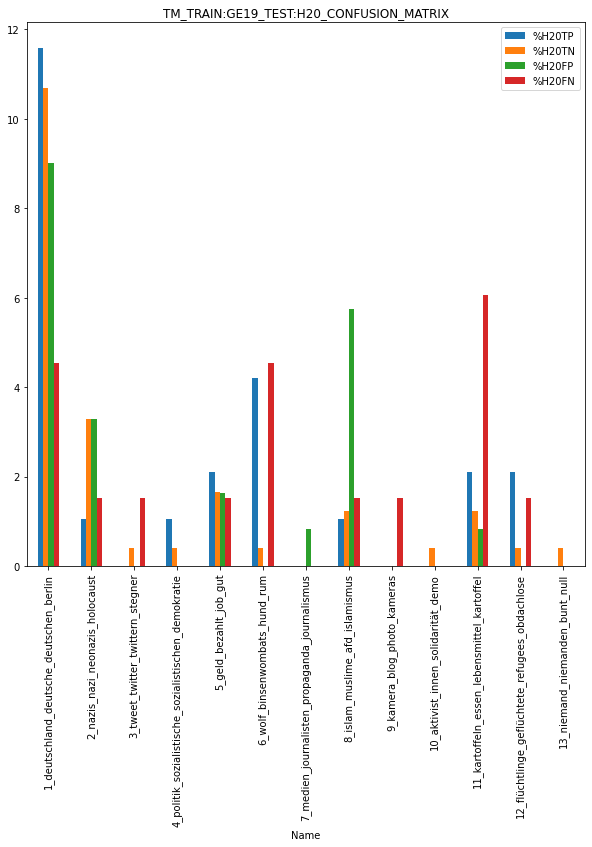

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")

In [ ]:
#test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE19_TEST:H20_CONFUSION_MATRIX")